In [1140]:
import os
import pandas as pd
import json
import numpy as np
import pickle
%load_ext autoreload
%autoreload 2
from analysis_utility import *
from plot_figures import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1141]:
df= pd.read_csv(os.path.join('../metadata','dialect_info_wgcode.csv'))
lang_data=df.fillna('-')
lang_data['variety name']=lang_data['variety name'].str.lower()
lang_data.columns=[x.lower() for x in lang_data.columns]

In [1142]:
lang_data

language group                         variety name  \
0                     albanian                             albanian   
1                     albanian                        gheg albanian   
2                       anglic  african american vernacular english   
3                       anglic                   australian english   
4                       anglic                              english   
..                         ...                                  ...   
276  tupi-guarani subgroup i.a              mbyá guaraní (a:brazil)   
277  tupi-guarani subgroup i.a            mbyá guaraní (a:paraguay)   
278  tupi-guarani subgroup i.a                          old guarani   
279            west low german                      west low german   
280                     yoruba           yoruba (a:central nigeria)   

                     new_name glottocode # of speakers mbert seen  \
0           albanian/albanian   alba1267       7500000       tick   
1               albanian/gheg   gheg1238       4100000          -   
2    english/american/african   afri1276      30000000          -   
3          english/australian   aust1314      21715910          -   
4            english/standard   stan1293    1350000000       tick   
..                        ...        ...           ...        ...   
276            guarani/brazil   mbya1239         51000          -   
277          guarani/paraguay   mbya1239       5250000          -   
278           guarani/guarani   oldp1258       6500000          -   
279         german/low german   west2357       5000000       tick   
280                   Central   yoru1245      44000000       tick   

                        udp                     pos  ner          sdqa  \
0           UD_Albanian-TSA         UD_Albanian-TSA    -             -   
1               UD_Gheg-GPS             UD_Gheg-GPS    -             -   
2                TwitterAAE                       -    -             -   
3                         -                       -    -  english--aus   
4            UD_English-EWT          UD_English-EWT   en             -   
..                      ...                     ...  ...           ...   
276  UD_Mbya_Guarani-Dooley  UD_Mbya_Guarani-Dooley    -             -   
277  UD_Mbya_Guarani-Thomas  UD_Mbya_Guarani-Thomas    -             -   
278     UD_Guarani-OldTuDeT     UD_Guarani-OldTuDeT    -             -   
279       UD_Low_Saxon-LSDC       UD_Low_Saxon-LSDC  nds             -   
280                       -                       -    -             -   

         rcmc       nli        tc sc          di       mt  
0           -         -         -  -           -        -  
1           -         -         -  -           -        -  
2           -         -         -  -           -        -  
3           -         -         -  -           -        -  
4    eng_Latn  eng_Latn  eng_Latn  -  english:EN        -  
..        ...       ...       ... ..         ...      ...  
276         -         -         -  -           -        -  
277         -         -         -  -           -        -  
278         -         -         -  -           -        -  
279         -         -         -  -           -        -  
280         -         -         -  -           -  Central  

[281 rows x 16 columns]

In [1143]:
all_results={}

### DEP

In [1144]:
models=['bert','xlmr'] ##mbert, xlmr

bert_udp_result_files=[
    '{}_predict_udp_UD_English-EWT.txt'.format(models[0]),
    '{}_predict_udp_all.txt'.format(models[0])
]

xlmr_udp_result_files=[
    '{}_predict_udp_UD_English-EWT.txt'.format(models[1]),
    '{}_predict_udp_all.txt'.format(models[1])
]

In [1145]:
root='../results'

##zeroshot
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[0])
                  ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[0])
                  ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
combined = bert_data[['target','lang-code','lang-group',]]
combined['bert_uas_zeroshot']=bert_data['uas']
combined['xlmr_uas_zeroshot']=xlmr_data['uas']

##finetuned
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[1])
                  ,names=['target','src','lang-code','lang-group','uas','las']).round(2)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[1])
                  ,names=['target','src','lang-code','lang-group','uas','las']).round(2)

##data having no train data scored as '-' for finetuned column
bert_data['uas']=bert_data.apply(lambda x: '-' if x['src']=='UD_English-EWT' and x['target']!='UD_English-EWT'
                                else x['uas'],axis=1)
xlmr_data['uas']=xlmr_data.apply(lambda x: '-' if x['src']=='UD_English-EWT' and x['target']!='UD_English-EWT'
                                else x['uas'],axis=1)

combined['bert_uas_finetuned']=bert_data['uas']
combined['xlmr_uas_finetuned']=xlmr_data['uas']

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2464153571.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_uas_zeroshot']=bert_data['uas']
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2464153571.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['xlmr_uas_zeroshot']=xlmr_data['uas']


In [1146]:
combined=combined.sort_values(by=['lang-group','bert_uas_zeroshot'],ascending=True)
combined = combined[['lang-group','target', 'lang-code', 'bert_uas_zeroshot',
       'xlmr_uas_zeroshot', 'bert_uas_finetuned', 'xlmr_uas_finetuned']]
# combined = combined.set_index(['lang-group','target'])

In [1147]:
dep_data=dict(zip(lang_data['udp'],lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['udp'],lang_data['language group']))

In [1148]:
combined=combined[combined['target'].isin(list(dep_data.keys()))]

In [1149]:
combined['variety']=combined.apply(lambda x: dep_data[x['target']],axis=1)

In [1150]:
combined=combined[['lang-group', 'variety','target', 'bert_uas_zeroshot',
       'xlmr_uas_zeroshot', 'bert_uas_finetuned', 'xlmr_uas_finetuned']]

In [1151]:
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['target']],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
# combined = combined.groupby(by=['lang-group']).filter(lambda g: len(g) > 1)
combined=combined.sort_values(by=['lang-group','bert_uas_zeroshot'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1152]:
combined

target  \
lang-group                   variety                                                                                          
albanian                     albanian                                                                       UD_Albanian-TSA   
                             gheg albanian                                                                      UD_Gheg-GPS   
anglic                       english                                                                         UD_English-EWT   
                             singlish                                                                              singlish   
                             african american vernacular english                                                 TwitterAAE   
arabic                       standard arabic                                                                 UD_Arabic-PADT   
                             south levantine arabic                                         UD_South_Levantine_Arabic-MADAR   
                             north african arabic                                         UD_Maghrebi_Arabic_French-Arabizi   
eastern-western armenian     western armenian                                                    UD_Western_Armenian-ArmTDP   
                             eastern armenian                                                            UD_Armenian-ArmTDP   
gallo-italian                ligurian                                                                       UD_Ligurian-GLT   
gallo-rhaetian               french                                                                        UD_French-ParTUT   
                             french (a:paris)                                                        UD_French-ParisStories   
                             old french (842-ca. 1400)                                                  UD_Old_French-SRCMF   
high german                  german                                                                           UD_German-LIT   
                             central alemannic (a:zh)                                                   UD_Swiss_German-UZH   
italian romance              italian                                                                         UD_Italian-PUD   
                             italian (r:formal, m:written, i:essay)                                       UD_Italian-MarkIT   
                             italian (r:casual, m:written, i:tweet)                                     UD_Italian-PoSTWITA   
                             continental southern italian                                                  UD_Neapolitan-RB   
komi                         komi-zyrian (m:spoken)                                                     UD_Komi_Zyrian-IKDP   
                             komi-permyak                                                                UD_Komi_Permyak-UH   
                             komi-zyrian (m:written)                                                 UD_Komi_Zyrian-Lattice   
norwegian                    norwegian bokmål (m:written)                                              UD_Norwegian-Bokmaal   
                             norwegian nynorsk (m:written)                                             UD_Norwegian-Nynorsk   
                             norwegian nynorsk (m:written, i:old)                                   UD_Norwegian-NynorskLIA   
saami                        north saami                                                               UD_North_Sami-Giella   
                             skolt saami                                                            UD_Skolt_Sami-Giellagas   
sabellic                     umbrian                                                                     UD_Umbrian-IKUVINA   
sinitic                      classical-middle-modern sinitic (a:hongkong, o:traditional)                      UD_Chinese-HK   
                             classical-middle-modern 

In [1153]:
all_results={'dep':combined}
save_all_results(all_results)

In [1154]:
text="""Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning."""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:dep_full'))

\begin{table}
\centering
\caption{Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning.}
\label{tab:dep_full}
\begin{tabular}{lllrrll}
\toprule
                &                 &                             target &  bert\_uas\_zeroshot &  xlmr\_uas\_zeroshot & bert\_uas\_finetuned & xlmr\_uas\_finetuned \\
lang-group & variety &                                    &                    &                    &                    &                    \\
\midrule
\multirow{2}{*}{albanian} & albanian &                    UD\_Albanian-TSA &              81.78 &              83.08 &                  - &                  - \\
                & gheg albanian &                        UD\_Gheg-GPS &              38.14 &              43.50 &        

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/84921001.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


### POS TAGGING

In [1155]:
models=['bert','xlmr'] ##mbert, xlmr

bert_udp_result_files=[
    '{}_predict_pos_UD_English-EWT.txt'.format(models[0]),
    '{}_predict_pos_all.txt'.format(models[0])
]

xlmr_udp_result_files=[
    '{}_predict_pos_UD_English-EWT.txt'.format(models[1]),
    '{}_predict_pos_all.txt'.format(models[1])
]


root='../results'
cols=['tgt-code','tgt','src','lang-group','support','dataset','acc','f1']

##finetuned
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[1])
                  ,names=cols)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[1])
                  ,names=cols)

combined = bert_data[['tgt-code','tgt','src','lang-group','dataset','support']]
combined['bert_f1_tune']=bert_data['f1']
combined['xlmr_f1_tune']=xlmr_data['f1']

##zeroshot
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[0])
                  ,names=cols)
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[0])
                  ,names=cols)
combined['bert_f1_zeroshot']=bert_data['f1']
combined['xlmr_f1_zeroshot']=xlmr_data['f1']

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/1153986980.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_f1_tune']=bert_data['f1']


In [1156]:
rname='bert_f1_tune'
combined[rname]=combined.apply(lambda x: -1 if x['src']=='UD_English-EWT' and x['lang-group']!='english'
                                else x[rname],axis=1)
rname='xlmr_f1_tune'
combined[rname]=combined.apply(lambda x: -1 if x['src']=='UD_English-EWT' and x['lang-group']!='english'
                                else x[rname],axis=1)

In [1157]:
combined=combined.sort_values(by=['lang-group','bert_f1_tune'],ascending=True)

In [1158]:
combined.loc[combined['tgt-code']=='UD_English-EWT','bert_f1_tune']=combined.loc[combined['tgt-code']=='UD_English-EWT',
                                                                                 'bert_f1_zeroshot']
combined.loc[combined['tgt-code']=='UD_English-EWT','xlmr_f1_tune']=combined.loc[combined['tgt-code']=='UD_English-EWT',
                                                                                 'xlmr_f1_zeroshot']

In [1159]:
combined['bert_f1_zeroshot']=combined['bert_f1_zeroshot']*100
combined['xlmr_f1_zeroshot']=combined['xlmr_f1_zeroshot']*100
combined['bert_f1_tune']=combined['bert_f1_tune']*100
combined['xlmr_f1_tune']=combined['xlmr_f1_tune']*100

In [1160]:
pos_data=dict(zip(lang_data['pos'],lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['pos'],lang_data['language group']))

In [1161]:
combined=combined[combined['tgt-code'].isin(list(pos_data.keys()))]

In [1162]:
combined['variety']=combined.apply(lambda x: pos_data[x['tgt-code']],axis=1)
combined=combined[['variety','tgt-code', 'dataset','bert_f1_zeroshot', 'xlmr_f1_zeroshot',
                   'bert_f1_tune', 'xlmr_f1_tune']].replace(-100,'-')
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['tgt-code']],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
combined=combined.sort_values(by=['lang-group','bert_f1_zeroshot'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1163]:
all_results['pos']=combined.copy()

In [1164]:
text="""Parts-of-speech evaluation report comprising zeroshot score and in-language finetuning. We report F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning."""
print(combined.round(2).to_latex(multicolumn=True,multirow=True, caption=text,escape=True, 
                                 float_format="{:.2f}".format,
                  label='tab:pos_full'))

\begin{table}
\centering
\caption{Parts-of-speech evaluation report comprising zeroshot score and in-language finetuning. We report F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning.}
\label{tab:pos_full}
\begin{tabular}{llllrrll}
\toprule
                &                 &                           tgt-code & dataset &  bert\_f1\_zeroshot &  xlmr\_f1\_zeroshot & bert\_f1\_tune & xlmr\_f1\_tune \\
lang-group & variety &                                    &         &                   &                   &              &              \\
\midrule
\multirow{2}{*}{albanian} & albanian &                    UD\_Albanian-TSA &      ud &             75.80 &             84.41 &            - &            - \\
                & gheg albanian &                        UD\_Gheg-GPS &      ud &             48.96 &             55.84 &            - &

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2531425419.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.round(2).to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


### ner

In [1165]:
models=['bert','xlmr'] ##mbert, xlmr

bert_udp_result_files=[
    '{}_predict_ner_all.txt'.format(models[0]),
    '{}_predict_ner_en.txt'.format(models[0])
]

xlmr_udp_result_files=[
    '{}_predict_ner_all.txt'.format(models[1]),
    '{}_predict_ner_en.txt'.format(models[1])
]

In [1166]:
root='../results'

##finetune
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[0])
                  ,names=['tgt-code','tgt','src','lang-group','support','dataset',
                          'acc','f1'])
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[0])
                  ,names=['tgt-code','tgt','src','lang-group','support','dataset','acc','f1'])
combined = bert_data[['tgt-code','tgt','src','lang-group','dataset','support']]
combined['bert_f1_tune']=bert_data['f1']*100
combined['xlmr_f1_tune']=xlmr_data['f1']*100

##zeroshot
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[1])
                  ,names=['tgt-code','tgt','src','lang-group','support','dataset',
                          'acc','f1'])
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[1])
                  ,names=['tgt-code','tgt','src','lang-group','support','dataset','acc','f1'])

combined['bert_f1_zeroshot']=bert_data['f1']*100
combined['xlmr_f1_zeroshot']=xlmr_data['f1']*100

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3760330593.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_f1_tune']=bert_data['f1']*100


In [1167]:
combined=combined.sort_values(by=['lang-group','bert_f1_zeroshot'],ascending=True)
combined['support']=combined[['support']].applymap(np.int64)

rname='bert_f1_tune'
combined[rname]=combined.apply(lambda x: -1 if x['src']=='en' and x['lang-group']!='english'
                                else x[rname],axis=1)
rname='xlmr_f1_tune'
combined[rname]=combined.apply(lambda x: -1 if x['src']=='en' and x['lang-group']!='english'
                                else x[rname],axis=1)

In [1168]:
combined = combined.replace(-1,'-')

In [1169]:
ner_data=dict(zip(lang_data['ner'],lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['ner'],lang_data['language group']))
combined=combined[combined['tgt-code'].isin(list(ner_data.keys()))]
combined['variety']=combined.apply(lambda x: ner_data[x['tgt-code']],axis=1)
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['tgt-code']],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
combined=combined.sort_values(by=['lang-group','bert_f1_zeroshot'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1170]:
combined=combined[['tgt-code', 'src', 'dataset', 'support', 'bert_f1_zeroshot', 'xlmr_f1_zeroshot',
                  'bert_f1_tune', 'xlmr_f1_tune']]

In [1171]:
all_results['ner']=combined

In [1172]:
combined

tgt-code src  dataset  \
lang-group                   variety                                            
anglic                       english (o:controlled)       simple  en  wikiann   
                             english                          en  en  wikiann   
                             old english (ca. 450-1100)      ang  en  wikiann   
                             jamaican creole english         jam  en  wikiann   
arabic                       egyptian arabic                 arz  ar  wikiann   
...                                                          ...  ..      ...   
southwestern shifted romance spanish                          es  es  wikiann   
                             occitan                          oc  it  wikiann   
                             mirandese                       mwl  es  wikiann   
                             extremaduran                    ext  es  wikiann   
west low german              west low german                 nds  de  wikiann   

                                                         support  \
lang-group                   variety                               
anglic                       english (o:controlled)         1000   
                             english                       10000   
                             old english (ca. 450-1100)      100   
                             jamaican creole english           0   
arabic                       egyptian arabic                 100   
...                                                          ...   
southwestern shifted romance spanish                       10000   
                             occitan                         100   
                             mirandese                       100   
                             extremaduran                    100   
west low german              west low german                 100   

                                                         bert_f1_zeroshot  \
lang-group                   variety                                        
anglic                       english (o:controlled)             89.065319   
                             english                            84.145129   
                             old english (ca. 450-1100)         54.406130   
                             jamaican creole english             0.000000   
arabic                       egyptian arabic                    43.824701   
...                                                                   ...   
southwestern shifted romance spanish                            72.802198   
                             occitan                            72.000000   
                             mirandese                          46.202532   
                             extremaduran                       44.827586   
west low german              west low german                    80.291971   

                                                         xlmr_f1_zeroshot  \
lang-group                   variety                                        
anglic                       english (o:controlled)             86.034732   
                             english                            82.106012   
                             old english (ca. 450-1100)         55.938697   
                             jamaican creole english             0.000000   
arabic                       egyptian arabic                    50.583658   
...                                                                   ...   
southwestern shifted romance spanish                            70.726703   
                             occitan                            67.579909   
                             mirandese                          44.067797   
                             extremaduran                       38.327526   
west low german              west low german                    66.438356   

                                                        bert_f1_tune  \
lang-group                   variety     

In [1173]:
text="""Named entity recognition (NER) evaluation report comprising zeroshot score and in-group finetuning. We report F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning."""
print(combined.round(2).to_latex(longtable=True,multicolumn=True,multirow=True, caption=text,escape=True, 
                                 float_format="{:.2f}".format,
                  label='tab:ner_full'))

\begin{longtable}{lllllrrrll}
\caption{Named entity recognition (NER) evaluation report comprising zeroshot score and in-group finetuning. We report F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning.}
\label{tab:ner_full}\\
\toprule
                &                 &      tgt-code &       src &        dataset &  support &  bert\_f1\_zeroshot &  xlmr\_f1\_zeroshot & bert\_f1\_tune & xlmr\_f1\_tune \\
lang-group & variety &               &           &                &          &                   &                   &              &              \\
\midrule
\endfirsthead
\caption[]{Named entity recognition (NER) evaluation report comprising zeroshot score and in-group finetuning. We report F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 


/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/43428002.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.round(2).to_latex(longtable=True,multicolumn=True,multirow=True, caption=text,escape=True,


### NLI

In [1174]:
f = open('../metadata/nli_metadata.json')
metadata = json.load(f)
# Closing file
f.close()

models=['bert','xlmr'] ##mbert, xlmr

bert_udp_result_files=[
    '{}_predict_nli_eng_Latn.txt'.format(models[0])
]

xlmr_udp_result_files=[
    '{}_predict_nli_eng_Latn.txt'.format(models[1])
]

root='../results'

##finetune
bert_data= pd.read_csv(os.path.join(root,bert_udp_result_files[0])
                  ,names=['tgt','src','acc','f1'])
xlmr_data= pd.read_csv(os.path.join(root,xlmr_udp_result_files[0])
                  ,names=['tgt','src','acc','f1'])
combined = bert_data[['tgt','src']]
combined['lang-group']=combined.apply(lambda x: metadata[x['tgt']]['langgroup'],axis=1)
combined['language']=combined.apply(lambda x: metadata[x['tgt']]['lang'],axis=1)
combined['bert_acc']=bert_data['acc']*100
combined['xlmr_acc']=xlmr_data['acc']*100
combined['bert_f1']=bert_data['f1']*100
combined['xlmr_f1']=xlmr_data['f1']*100

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/1324443449.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['lang-group']=combined.apply(lambda x: metadata[x['tgt']]['langgroup'],axis=1)


In [1175]:
ner_data=dict(zip(lang_data['nli'],lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['nli'],lang_data['language group']))
combined=combined[combined['tgt'].isin(list(ner_data.keys()))]
combined['variety']=combined.apply(lambda x: ner_data[x['tgt']],axis=1)
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['tgt']],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
# combined['lang-group']=combined['lang-group'].str.replace('portuguese','spanish')
# combined['variety']=combined['variety'].str.replace('european','portuguese/european')
combined=combined.sort_values(by=['lang-group','bert_f1'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1176]:
all_results['nli']=combined

In [1177]:
combined

tgt  \
lang-group                   variety                                                     
anglic                       english                                          eng_Latn   
arabic                       standard arabic                                  arb_Arab   
                             najdi arabic                                     ars_Arab   
                             ta'izzi-adeni arabic                             acq_Arab   
                             moroccan arabic                                  ary_Arab   
                             egyptian arabic                                  arz_Arab   
                             south levantine arabic                           ajp_Arab   
                             north mesopotamian arabic                        acm_Arab   
                             levantine arabic (a:north)                       apc_Arab   
                             tunisian arabic                                  aeb_Arab   
common turkic                north azerbaijani                                azj_Latn   
                             central oghuz (m:spoken)                         tur_Latn   
                             south azerbaijani                                azb_Arab   
gallo-italian                venetian                                         vec_Latn   
                             lombard                                          lmo_Latn   
                             ligurian                                         lij_Latn   
gallo-rhaetian               friulian                                         fur_Latn   
high german                  luxemburgish                                     ltz_Latn   
                             limburgan                                        lim_Latn   
italian romance              italian                                          ita_Latn   
                             sicilian                                         scn_Latn   
kurdish                      central kurdish                                  ckb_Arab   
                             northern kurdish                                 kmr_Latn   
latvian                      latvian                                          lvs_Latn   
                             east latvian                                     ltg_Latn   
modern dutch                 dutch                                            nld_Latn   
norwegian                    norwegian bokmål (m:written)                     nob_Latn   
                             norwegian nynorsk (m:written)                    nno_Latn   
sardo-corsican               sardinian                                        srd_Latn   
sinitic                      classical-middle-modern sinitic (o:simplified)   zho_Hans   
                             classical-middle-modern sinitic (o:traditional)  zho_Hant   
                             cantonese                                        yue_Hant   
sotho-tswana (s.30)          northern sotho                                   nso_Latn   
                             southern sotho                                   sot_Latn   
southwestern shifted romance spanish                                          spa_Latn   
                             portuguese (a:european)                          por_Latn   
                             galician                                         glg_Latn   
                             occitan                                          oci_Latn   

                                                                                   src  \
lang-group                   variety                                                     
anglic                       english                                          eng_Latn   
arabic                       standard arabic                                  eng_Latn   
                             najdi arabic                                     eng_Latn   
                             ta'

In [1178]:
combined.columns

Index(['tgt', 'src', 'language', 'bert_acc', 'xlmr_acc', 'bert_f1', 'xlmr_f1'], dtype='object')

In [1179]:
text="""Natural language inference (NLI) evaluation report using zeroshot cross-lingual transfer from Standard English. We report F1 as evaluation score. 
NLI uses F1 as evaluation matric. We prepare a translate-train dataset to perform this evaluation."""
print(combined[['tgt', 'src',  'bert_acc', 'xlmr_acc', 'bert_f1', 'xlmr_f1']].to_latex(multirow=True, multicolumn=True,float_format="{:.2f}".format,caption=text,label='tab:nli'))

\begin{table}
\centering
\caption{Natural language inference (NLI) evaluation report using zeroshot cross-lingual transfer from Standard English. We report F1 as evaluation score. 
NLI uses F1 as evaluation matric. We prepare a translate-train dataset to perform this evaluation.}
\label{tab:nli}
\begin{tabular}{llllrrrr}
\toprule
                             &         &       tgt &       src &  bert\_acc &  xlmr\_acc &  bert\_f1 &  xlmr\_f1 \\
lang-group & variety &           &           &           &           &          &          \\
\midrule
anglic & english &  eng\_Latn &  eng\_Latn &     81.90 &     83.35 &    81.95 &    83.43 \\
\multirow{9}{*}{arabic} & standard arabic &  arb\_Arab &  eng\_Latn &     65.57 &     73.83 &    65.57 &    73.85 \\
                             & najdi arabic &  ars\_Arab &  eng\_Latn &     59.42 &     69.02 &    59.14 &    68.94 \\
                             & ta'izzi-adeni arabic &  acq\_Arab &  eng\_Latn &     58.84 &     68.72 &    58.64 &    68.

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2386537980.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined[['tgt', 'src',  'bert_acc', 'xlmr_acc', 'bert_f1', 'xlmr_f1']].to_latex(multirow=True, multicolumn=True,float_format="{:.2f}".format,caption=text,label='tab:nli'))


## Topic classification

In [1180]:
from collections import defaultdict
models=['bert','xlmr'] ##mbert, xlmr

source= {"eng_Latn": "English", 
         "ita_Latn": "italian", 
         "azj_Latn":"azarbaijani",
         "ckb_Arab":"kurdish",
         "nob_Latn":"norwegian",
         "nld_Latn":"dutch",
         "lvs_Latn":"latvian", 
         "arb_Arab":"arabic" ,
         "lij_Latn":"Franco-Provencal",
         "zho_Hans":"chinese", 
         "spa_Latn":"Spanish", 
         "nso_Latn":"sotho"}
inv_src = {v: k for k, v in source.items()}

f = open('../metadata/topic_metadata.json')
metadata = json.load(f)
# Closing file
f.close()

for i in metadata:
    metadata[i]['src']=inv_src[metadata[i]['langgroup']]
    
langgroup=defaultdict(list)
for i in inv_src:
    for j in metadata:
        if metadata[j]['langgroup']==i:
            langgroup[i].append(j)

In [1181]:
bert_result_files=[]
xlmr_result_files=[]

root='../results'
names=['target','src','acc','f1']
result_dict={'bert':{},
            'xlmr':{}}

all_bert=pd.DataFrame()
all_xlmr=pd.DataFrame()
for i in inv_src:
    lang=inv_src[i]
    bert_result_file='{}_predict_topic_classification_lm_{}_sib.txt'.format(models[0],lang)
    xlmr_result_file='{}_predict_topic_classification_lm_{}_sib.txt'.format(models[1],lang)

    #finetune
    bert_tune= pd.read_csv(os.path.join(root,bert_result_file),names=names)
    xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_file),names=names)
    
    all_bert = pd.concat([all_bert,bert_tune[bert_tune['target'].isin(langgroup[i])]])
    all_xlmr = pd.concat([all_xlmr,xlmr_tune[xlmr_tune['target'].isin(langgroup[i])]])

In [1182]:
combined=all_bert[['target','src']]
combined['bert_f1']=all_bert['f1']*100
combined['xlmr_f1']=all_xlmr['f1']*100

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3716256468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_f1']=all_bert['f1']*100


In [1183]:
lang='eng_Latn'
bert_result_file='{}_predict_topic_classification_lm_{}_sib.txt'.format(models[0],lang)
xlmr_result_file='{}_predict_topic_classification_lm_{}_sib.txt'.format(models[1],lang)
bert_zero = pd.read_csv(os.path.join(root,bert_result_file),names=names)
xlmr_zero = pd.read_csv(os.path.join(root,xlmr_result_file),names=names)

bdict=dict(zip(zip(bert_zero['target'],bert_zero['src']),bert_zero['f1']))
xdict=dict(zip(zip(xlmr_zero['target'],xlmr_zero['src']),xlmr_zero['f1']))

combined['bert_zero']=combined.apply(lambda x: bdict[x['target'],'eng_Latn_sib']*100,axis=1)
combined['xlmr_zero']=combined.apply(lambda x: xdict[x['target'],'eng_Latn_sib']*100,axis=1)

combined['src']=combined['src'].str.replace("_sib","")

combined['lang-group']=combined.apply(lambda x: metadata[x['src']]['langgroup'].lower(), axis=1)
combined['language']=combined.apply(lambda x: metadata[x['target']]['lang'].lower(), axis=1)

combined=combined[['lang-group','target', 'src',  'bert_zero', 'xlmr_zero','bert_f1', 'xlmr_f1'
       ]]

In [1184]:
ner_data=dict(zip(lang_data['tc'],lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['tc'],lang_data['language group']))
combined=combined[combined['target'].isin(list(ner_data.keys()))]
combined['variety']=combined.apply(lambda x: ner_data[x['target']],axis=1)
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['target']],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
# combined['lang-group']=combined['lang-group'].str.replace('portuguese','spanish')
# combined['variety']=combined['variety'].str.replace('european','portuguese/european')
combined=combined.sort_values(by=['lang-group','bert_zero'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1185]:
combined

target  \
lang-group                   variety                                                     
anglic                       english                                          eng_Latn   
arabic                       standard arabic                                  arb_Arab   
                             ta'izzi-adeni arabic                             acq_Arab   
                             najdi arabic                                     ars_Arab   
                             north mesopotamian arabic                        acm_Arab   
                             south levantine arabic                           ajp_Arab   
                             levantine arabic (a:north)                       apc_Arab   
                             egyptian arabic                                  arz_Arab   
                             tunisian arabic                                  aeb_Arab   
                             moroccan arabic                                  ary_Arab   
common turkic                north azerbaijani                                azj_Latn   
                             central oghuz (m:spoken)                         tur_Latn   
                             south azerbaijani                                azb_Arab   
gallo-italian                venetian                                         vec_Latn   
                             lombard                                          lmo_Latn   
                             ligurian                                         lij_Latn   
gallo-rhaetian               friulian                                         fur_Latn   
high german                  luxemburgish                                     ltz_Latn   
                             limburgan                                        lim_Latn   
italian romance              italian                                          ita_Latn   
                             sicilian                                         scn_Latn   
kurdish                      northern kurdish                                 kmr_Latn   
                             central kurdish                                  ckb_Arab   
latvian                      latvian                                          lvs_Latn   
                             east latvian                                     ltg_Latn   
modern dutch                 dutch                                            nld_Latn   
norwegian                    norwegian nynorsk (m:written)                    nno_Latn   
                             norwegian bokmål (m:written)                     nob_Latn   
sardo-corsican               sardinian                                        srd_Latn   
sinitic                      classical-middle-modern sinitic (o:traditional)  zho_Hant   
                             cantonese                                        yue_Hant   
                             classical-middle-modern sinitic (o:simplified)   zho_Hans   
sotho-tswana (s.30)          northern sotho                                   nso_Latn   
                             southern sotho                                   sot_Latn   
southwestern shifted romance portuguese (a:european)                          por_Latn   
                             galician                                         glg_Latn   
                             spanish                                          spa_Latn   
                             occitan                                          oci_Latn   

                                                                                   src  \
lang-group                   variety                                                     
anglic                       english                                          eng_Latn   
arabic                       standard arabic                                  arb_Arab   
                             ta'izzi-adeni arabic                             arb_Arab   
                             

In [1186]:
all_results['topic']=combined

In [1187]:
text="""Topic classification evaluation using SIB-200 language data with dialectal presence. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use in-group training for supervised finetuning"""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                   float_format="{:.2f}".format,label='tab:topic'))

\begin{table}
\centering
\caption{Topic classification evaluation using SIB-200 language data with dialectal presence. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use in-group training for supervised finetuning}
\label{tab:topic}
\begin{tabular}{llllrrrr}
\toprule
                             &         &    target &       src &  bert\_zero &  xlmr\_zero &  bert\_f1 &  xlmr\_f1 \\
lang-group & variety &           &           &            &            &          &          \\
\midrule
anglic & english &  eng\_Latn &  eng\_Latn &      89.74 &      89.21 &    89.74 &    89.21 \\
\multirow{9}{*}{arabic} & standard arabic &  arb\_Arab &  arb\_Arab &      85.25 &      83.96 &    86.71 &    82.27 \\
                             & ta'izzi-adeni arabic &  acq\_Arab &  arb\_Arab &      84.96 &      82.05 &    86.44 &    81.98 \\
                             & najdi arabic &  ars\_Arab &  arb\_Arab &      84.80 &      

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/914827546.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


### mrc

In [1188]:
models=['bert','xlmr'] ##mbert, xlmr

bert_result_files=[
    '{}_predict_reading_comprehension_Belebele.txt'.format(models[0]),
]

xlmr_result_files=[
    '{}_predict_reading_comprehension_Belebele.txt'.format(models[1]),
]

names=['dialect','train','accuracy','f1']

f = open('../metadata/rcmc_metadata.json')
metadata = json.load(f)
# Closing file
f.close()

In [1189]:
root='../results'

#finetune
bert_tune= pd.read_csv(os.path.join(root,bert_result_files[0]),names=names)
xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_files[0]),names=names)

combined=pd.DataFrame()
combined = bert_tune[['dialect']]
combined['lang-group']=combined.apply(lambda x: metadata[x['dialect']]['langgroup'],axis=1)
combined['language']=combined.apply(lambda x: metadata[x['dialect']]['lang'].lower(), axis=1)

for x in ['accuracy','f1']:
    combined['bert-'+x]=bert_tune[x]*100
    combined['xlmr-'+x]=xlmr_tune[x]*100

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2041275836.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['lang-group']=combined.apply(lambda x: metadata[x['dialect']]['langgroup'],axis=1)
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2041275836.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['language']=combined.apply(lambda x: metadata[x['dialect']]['lang'].lower(), axis=1)


In [1190]:
combined=combined[[ 'lang-group','dialect', 'bert-accuracy', 'xlmr-accuracy',
       'bert-f1', 'xlmr-f1']]

In [1191]:
ner_data=dict(zip(lang_data['rcmc'],lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['tc'],lang_data['language group']))
combined=combined[combined['dialect'].isin(list(ner_data.keys()))]
combined['variety']=combined.apply(lambda x: ner_data[x['dialect']],axis=1)
# combined['lang-group']=combined.apply(lambda x: x['variety'].split('/')[0],axis=1)
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['dialect']],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
combined=combined.sort_values(by=['lang-group','bert-f1'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1192]:
all_results['rcmc']=combined

In [1193]:
text="""Multiple-choice machine reading comprehension evaluation using Belebele dataset languages with dialectal presence. We report span F1 as evaluation score. 
We use combined finetuning using the aggregated training data provided with Belebele evaluationd data."""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                   float_format="{:.2f}".format,label='tab:mrc'))

\begin{table}
\centering
\caption{Multiple-choice machine reading comprehension evaluation using Belebele dataset languages with dialectal presence. We report span F1 as evaluation score. 
We use combined finetuning using the aggregated training data provided with Belebele evaluationd data.}
\label{tab:mrc}
\begin{tabular}{lllrrrr}
\toprule
                    &                &   dialect &  bert-accuracy &  xlmr-accuracy &  bert-f1 &  xlmr-f1 \\
lang-group & variety &           &                &                &          &          \\
\midrule
anglic & english &  eng\_Latn &          52.22 &          53.56 &    51.97 &    53.44 \\
\multirow{6}{*}{arabic} & standard arabic &  arb\_Arab &          39.00 &          43.78 &    39.01 &    43.78 \\
                    & levantine arabic (a:north) &  apc\_Arab &          38.89 &          40.78 &    38.64 &    40.71 \\
                    & north mesopotamian arabic &  acm\_Arab &          38.11 &          41.33 &    37.99 &    41.35 \\
    

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3135580234.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


### sdqa

In [1194]:
models=['bert','xlmr'] ##mbert, xlmr

bert_result_files=[
    '{}_predict_sdqa_all_dev.txt'.format(models[0]),
    '{}_predict_sdqa_english_dev.txt'.format(models[0]),
    '{}_predict_sdqa_all_test.txt'.format(models[0]),
     '{}_predict_sdqa_english_test.txt'.format(models[0])
]

xlmr_result_files=[
    '{}_predict_sdqa_all_dev.txt'.format(models[1]),
    '{}_predict_sdqa_english_dev.txt'.format(models[1]),
    '{}_predict_sdqa_all_test.txt'.format(models[1]),
     '{}_predict_sdqa_english_test.txt'.format(models[1])
]

names=['src','target','exact','f1','count']

#### DEV

In [1195]:
root='../results'

#finetune
bert_tune= pd.read_csv(os.path.join(root,bert_result_files[0]),names=names).round(2)
xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_files[0]),names=names).round(2)
#zero-shot
bert_zero= pd.read_csv(os.path.join(root,bert_result_files[1]),names=names).round(2)
xlmr_zero= pd.read_csv(os.path.join(root,xlmr_result_files[1]),names=names).round(2)

combined=pd.DataFrame()
combined = bert_tune[['target','count']]
combined['bert_tune_f1']=bert_tune['f1']
combined['xlmr_tune_f1']=xlmr_tune['f1']
combined['bert_zero_f1']=bert_zero['f1']
combined['xlmr_zero_f1']=xlmr_zero['f1']

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3530405086.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_tune_f1']=bert_tune['f1']
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3530405086.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['xlmr_tune_f1']=xlmr_tune['f1']


In [1196]:
ner_data=dict(zip(lang_data['sdqa'],lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['sdqa'],lang_data['language group']))
combined=combined[combined['target'].isin(list(ner_data.keys()))]
combined['variety']=combined.apply(lambda x: ner_data[x['target']],axis=1)

# combined['lang-group']=combined.apply(lambda x: x['variety'].split('/')[0],axis=1)
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['target']],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
combined=combined.sort_values(by=['lang-group','bert_zero_f1'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1197]:
all_results['sdqa-dev']=combined

In [1198]:
text="""Extractive dialectal question answering evaluation on SD-QA development set. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use combined training set for supervised finetuning"""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:sdqa_dev'))

\begin{table}
\centering
\caption{Extractive dialectal question answering evaluation on SD-QA development set. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use combined training set for supervised finetuning}
\label{tab:sdqa_dev}
\begin{tabular}{lllrrrrr}
\toprule
        &                      &             target &  count &  bert\_tune\_f1 &  xlmr\_tune\_f1 &  bert\_zero\_f1 &  xlmr\_zero\_f1 \\
lang-group & variety &                    &        &               &               &               &               \\
\midrule
\multirow{11}{*}{anglic} & irish english &       english--irl &    494 &         73.00 &         67.98 &         68.62 &         62.45 \\
        & southeast american english &       english--usa &    494 &         73.51 &         67.95 &         68.56 &         62.97 \\
        & new zealand english &       english--nzl &    494 &         73.62 &         68.50 &         68.21 &         63.

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/1980138003.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


### test

In [1199]:
#finetune
bert_tune= pd.read_csv(os.path.join(root,bert_result_files[2]),names=names).round(2)
xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_files[2]),names=names).round(2)
#zero-shot
bert_zero= pd.read_csv(os.path.join(root,bert_result_files[3]),names=names).round(2)
xlmr_zero= pd.read_csv(os.path.join(root,xlmr_result_files[3]),names=names).round(2)

combined=pd.DataFrame()
combined = bert_tune[['target','count']]
combined['bert_tune_f1']=bert_tune['f1']
combined['xlmr_tune_f1']=xlmr_tune['f1']
combined['bert_zero_f1']=bert_zero['f1']
combined['xlmr_zero_f1']=xlmr_zero['f1']

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3957602400.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['bert_tune_f1']=bert_tune['f1']
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3957602400.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['xlmr_tune_f1']=xlmr_tune['f1']


In [1200]:
ner_data=dict(zip(lang_data['sdqa'],lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['sdqa'],lang_data['language group']))
combined=combined[combined['target'].isin(list(ner_data.keys()))]
combined['variety']=combined.apply(lambda x: ner_data[x['target']],axis=1)
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['target']],axis=1)
# combined['lang-group']=combined.apply(lambda x: x['variety'].split('/')[0],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
combined=combined.sort_values(by=['lang-group','bert_zero_f1'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1201]:
in_context=pd.read_csv(os.path.join('../results',
                                    'SDQAResults - Sheet1.csv')).fillna(0)
in_context['tgt']=in_context['tgt'].str.replace('__','--').str.lower()
in_context['tgt']=in_context['tgt'].str.replace('\\','')
in_context_dict=dict(zip(in_context['tgt'],in_context['ICL (Mistral)']))
combined['mistral7b']=combined.apply(lambda x: in_context_dict[x['target']],axis=1)

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3005142440.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  in_context['tgt']=in_context['tgt'].str.replace('\\','')


In [1202]:
all_results['sdqa-test']=combined

In [1203]:
text="""Extractive dialectal question answering evaluation on SD-QA test set. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use combined training set for supervised finetuning"""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:sdqa_test'))

\begin{table}
\centering
\caption{Extractive dialectal question answering evaluation on SD-QA test set. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use combined training set for supervised finetuning}
\label{tab:sdqa_test}
\begin{tabular}{lllrrrrrr}
\toprule
        &                   &             target &  count &  bert\_tune\_f1 &  xlmr\_tune\_f1 &  bert\_zero\_f1 &  xlmr\_zero\_f1 &  mistral7b \\
lang-group & variety &                    &        &               &               &               &               &            \\
\midrule
\multirow{11}{*}{anglic} & english (a:scotland) &       english--gbr &    440 &         76.38 &         70.34 &         71.82 &         63.15 &      70.18 \\
        & southern african english &       english--zaf &    440 &         76.66 &         71.18 &         71.49 &         63.87 &      71.14 \\
        & new zealand english &       english--nzl &    440 &         76

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2668185946.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


### sentiment analysis

In [1204]:
in_context=pd.read_csv(os.path.join('../results',
                                    'ArabicSentimentAnalysisResults_-_Sheet1_csv.csv')).fillna(0)
in_context['tgt']=in_context['tgt'].str.replace('-','_').str.lower()
in_context_dict=dict(zip(in_context['tgt'],in_context['Mistral-7B']))

In [1205]:
combined= pd.read_csv(os.path.join('../results','sentiment_analysis_arabic.csv'))
combined['dialect']=combined['dialect'].str.lower()

In [1206]:
ner_data=dict(zip(lang_data['sc'].str.lower().replace('ar-lb','ar_lb'),lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['sc'].str.lower().replace('ar-lb','ar_lb'),lang_data['language group']))
combined=combined[combined['dialect'].isin(list(ner_data.keys()))]
combined['variety']=combined.apply(lambda x: ner_data[x['dialect']],axis=1)
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['dialect']],axis=1)
# combined['lang-group']=combined.apply(lambda x: x['variety'].split('/')[0],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
combined['mistral7b']=combined.apply(lambda x: in_context_dict[x['dialect']],axis=1)
combined=combined.sort_values(by=['lang-group','MBERT_Acc'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])

In [1207]:
all_results['sc']=combined

In [1208]:
combined

dialect  MBERT_Acc  MBERT_F1  \
lang-group variety                                                     
arabic     tunisian arabic             aeb_arab      94.55     94.56   
           algerian arabic             arq_arab      84.98     85.00   
           arabic (a:jordan)           jor_arab      82.96     82.90   
           arabic (a:saudi-arabia)     sau_arab      81.38     65.97   
           tunisian arabic (r:casual)  aeb_latn      80.95     65.65   
           standard arabic             arb_arab      80.63     70.01   
           moroccan arabic             ary_arab      78.08     61.50   
           egyptian arabic             arz_arab      67.03     40.00   
           south levantine arabic         ar_lb      58.38     34.63   

                                       XLMR_Acc  XLMR_F1  mistral7b  
lang-group variety                                                   
arabic     tunisian arabic                94.61    94.62       73.3  
           algerian arabic                84.70    84.69       76.0  
           arabic (a:jordan)              89.07    89.00       82.2  
           arabic (a:saudi-arabia)        83.40    67.66       79.8  
           tunisian arabic (r:casual)     79.80    63.70       62.3  
           standard arabic                83.96    72.91       65.7  
           moroccan arabic                77.41    55.55       58.4  
           egyptian arabic                69.03    47.89       50.0  
           south levantine arabic         58.90    32.72        0.0

In [1209]:
text="""Sentiment Analysis results. In addition to, using mBERT and XLM-R as the base models, 
we also perform in-context learning to evaluate the performance of large language models (Mistral-7B)"""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:sc'))

\begin{table}
\centering
\caption{Sentiment Analysis results. In addition to, using mBERT and XLM-R as the base models, 
we also perform in-context learning to evaluate the performance of large language models (Mistral-7B)}
\label{tab:sc}
\begin{tabular}{lllrrrrr}
\toprule
       &                        &   dialect &  MBERT\_Acc &  MBERT\_F1 &  XLMR\_Acc &  XLMR\_F1 &  mistral7b \\
lang-group & variety &           &            &           &           &          &            \\
\midrule
\multirow{9}{*}{arabic} & tunisian arabic &  aeb\_arab &      94.55 &     94.56 &     94.61 &    94.62 &       73.3 \\
       & algerian arabic &  arq\_arab &      84.98 &     85.00 &     84.70 &    84.69 &       76.0 \\
       & arabic (a:jordan) &  jor\_arab &      82.96 &     82.90 &     89.07 &    89.00 &       82.2 \\
       & arabic (a:saudi-arabia) &  sau\_arab &      81.38 &     65.97 &     83.40 &    67.66 &       79.8 \\
       & tunisian arabic (r:casual) &  aeb\_latn &      80.95 &     65.65

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/408737072.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


### mt

In [1210]:
mt_data_1=pd.read_csv(os.path.join('../results','mt_dialects_without_italian_nd_swissG.csv'))
mt_data_2=pd.read_csv(os.path.join('../results','regional_mt_dialects_only_italian_nd_swissG.csv'))

In [1211]:
mt_lang_variety=dict(zip(lang_data['mt'],lang_data['variety name']))
mt_lang_language_group=dict(zip(lang_data['variety name'],lang_data['language group']))

In [1212]:
mt_data_1

language_group       dialect  NLLB_600m-bleu  NLLB_1_3bn-bleu
0          french       Occitan       20.725373        25.735985
1       norwegian      Setesdal        2.241443         4.225786
2       norwegian       Eastern       23.995663        27.485578
3       norwegian  Southwestern       21.880674        15.813517
4         turkish            az       18.824885        22.652729
..            ...           ...             ...              ...
68        bengali       Kushtia       17.359814        19.121118
69        bengali        Khulna       18.962096        19.733690
70        bengali       Jessore       20.714448        21.440912
71        kurdish       Mehabad       35.744711        34.879683
72        kurdish          Sine       22.562281        22.595377

[73 rows x 4 columns]

In [1213]:
mt_data_1['variety']=mt_data_1.apply(lambda x: mt_lang_variety[x['dialect']],axis=1)
mt_data_1['lang-group']=mt_data_1.apply(lambda x: mt_lang_language_group[x['variety']],axis=1)

mt_data_2['variety']=mt_data_2.apply(lambda x: mt_lang_variety[x['region']],axis=1)
mt_data_2['lang-group']=mt_data_2.apply(lambda x: mt_lang_language_group[x['variety']],axis=1)

In [1214]:
# mt_data_1['variety']=mt_data_1['dialect'].str.lower()
# mt_data_2['variety']=mt_data_2['region'].str.lower()
# mt_data_1['lang-group']=mt_data_1['language_group'].str.lower()
# mt_data_2['lang-group']=mt_data_2['language_group'].str.lower()

In [1215]:
combined=mt_data_1.copy()
combined=combined.sort_values(by=['lang-group','NLLB_1_3bn-bleu'],ascending=[True,False])
# combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])
all_results['mt-dialect']=combined

In [1216]:
combined=mt_data_2.copy()
combined=combined.sort_values(by=['lang-group','NLLB_1_3bn-bleu'],ascending=[True,False])
combined=drop_single_cluster(combined)
combined = combined.set_index(['lang-group','variety'])
all_results['mt-region']=combined

In [1217]:
st_mt_dialect=all_results['mt-dialect'].sort_values(['language_group', 
                                       'NLLB_1_3bn-bleu'],ascending=False
                                     ).groupby(['language_group']).first().reset_index()
st_mt_region=all_results['mt-region'].sort_values(['language_group', 
                                       'NLLB_1_3bn-bleu'],ascending=False
                                     ).groupby(['language_group']).first().reset_index()

In [1218]:
mt_dilaect_metadata=dict(zip(st_mt_dialect['language_group'],st_mt_dialect['dialect']))
mt_region_metadata=dict(zip(st_mt_region['language_group'],st_mt_region['region']))

In [1219]:
len(all_results['mt-region'])

41

In [1220]:
text="""Zero-shot results for Machine Translation. We evaluate NLLB\_600m and NLLB\_1\_3bn by translating each dialectal variety to English. For all languages without reference translations in English, we evaluate dialectal translations using the standard language's translation as the reference. For varieties with parallel data like Yoruba, Turkish, Farsi, Tigrinya and Bengali we use the English reference provided in the dataset."""
print(all_results['mt-region'][[ 'NLLB_600m-bleu', 'NLLB_1_3bn-bleu']].to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                   float_format="{:.2f}".format,label='tab:sdqa_dev'))

\begin{table}
\centering
\caption{Zero-shot results for Machine Translation. We evaluate NLLB\_600m and NLLB\_1\_3bn by translating each dialectal variety to English. For all languages without reference translations in English, we evaluate dialectal translations using the standard language's translation as the reference. For varieties with parallel data like Yoruba, Turkish, Farsi, Tigrinya and Bengali we use the English reference provided in the dataset.}
\label{tab:sdqa_dev}
\begin{tabular}{llrr}
\toprule
                &                     &  NLLB\_600m-bleu &  NLLB\_1\_3bn-bleu \\
lang-group & variety &                 &                  \\
\midrule
\multirow{21}{*}{high german} & central alemannic (a:zh) &           43.71 &            44.06 \\
                & central alemannic (a:gl) &           43.90 &            43.96 \\
                & central alemannic (a:tg) &           43.94 &            43.62 \\
                & central alemannic (a:bs) &           42.94 &           

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3692862941.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_results['mt-region'][[ 'NLLB_600m-bleu', 'NLLB_1_3bn-bleu']].to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


## Dialect Identification

In [1221]:

def dilaect_result(bert_file,xlmr_file):
    models=['bert','xlmr'] ##mbert, xlmr
    bert_result_files=[
        bert_file
    ]

    xlmr_result_files=[
        xlmr_file
    ]



    names=['dataset','dialect','precision','recall','F1','support']

    root='../results'

    #finetune
    bert_tune= pd.read_csv(os.path.join(root,bert_result_files[0]),names=names)
    xlmr_tune= pd.read_csv(os.path.join(root,xlmr_result_files[0]),names=names)

    combined=pd.DataFrame()
    combined = bert_tune[['dialect','support']]

    for x in ['precision','recall','F1']:
        combined[x+' (mBERT)']=bert_tune[x]*100
        combined[x+' (XLM-R)']=xlmr_tune[x]*100
    return combined.iloc[:-3],combined.iloc[-3:]

In [1222]:
bert_files=[
    'bert_predict_did_lm_arabic_madar.txt',
    'bert_predict_did_lm_english_di.txt',
    'bert_predict_did_lm_greek_di.txt',
    'bert_predict_did_lm_mandarin_simplified_di.txt',
    'bert_predict_did_lm_mandarin_traditional_di.txt',
    'bert_predict_did_lm_portuguese_di.txt',
    'bert_predict_did_lm_spanish_di.txt',
    'bert_predict_did_lm_swiss-dialects_di.txt'
    
]

xlmr_files=[
    'xlmr_predict_did_lm_arabic_madar.txt',
    'xlmr_predict_did_lm_english_di.txt',
    'xlmr_predict_did_lm_greek_di.txt',
    'xlmr_predict_did_lm_mandarin_simplified_di.txt',
    'xlmr_predict_did_lm_mandarin_traditional_di.txt',
    'xlmr_predict_did_lm_portuguese_di.txt',
    'xlmr_predict_did_lm_spanish_di.txt',
    'xlmr_predict_did_lm_swiss-dialects_di.txt'
]

all_di=pd.DataFrame()
all_di_sum=pd.DataFrame()

langs=['arabic','english','greek','mandarin_simplified',
       'mandarin_traditional','portuguese','spanish','swiss-dialects']
for i in range(0,8,1):
    df,df_sum=dilaect_result(bert_files[i],xlmr_files[i])
    df['lang-group']=langs[i]
    df_sum['lang-group']=langs[i]
    all_di = pd.concat([all_di,df])
    all_di_sum = pd.concat([all_di_sum,df_sum])

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3049984213.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined[x+' (mBERT)']=bert_tune[x]*100
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3049984213.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined[x+' (XLM-R)']=xlmr_tune[x]*100
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/3049984213.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [1223]:
all_di['dialect']=all_di['lang-group']+':'+all_di['dialect']

In [1224]:
all_di['dialect']=all_di['dialect'].str.lower()

In [1225]:
ner_data=dict(zip(lang_data['di'].str.lower(),lang_data['variety name']))
lang_group_dict =dict(zip(lang_data['di'].str.lower(),lang_data['language group']))

In [1226]:
combined=all_di.copy()
combined = combined[combined['support']>10]
ner_data=dict(zip(lang_data['di'].str.lower(),lang_data['variety name']))
# for i in list(ner_data.keys()):
#     if i.startswith('greek'):
#         new_i=i.split(',')
#         for j in new_i:
#             ner_data[j]=ner_data[i]
# ner_data['mandarin_simplified:m']='chinese/{simplified,mandarin/mainland}'
# ner_data['mandarin_simplified:t']='chinese/{simplified,mandarin/taiwanese}'
# ner_data['mandarin_traditional:m']='chinese/{traditional,mandarin/mainland}'
# ner_data['mandarin_traditional:t']='chinese/{traditional,mandarin/taiwanese}'
         
combined=combined[combined['dialect'].isin(list(ner_data.keys()))]
combined['variety']=combined.apply(lambda x: ner_data[x['dialect']],axis=1)
combined['lang-group']=combined.apply(lambda x: lang_group_dict[x['dialect']],axis=1)
# combined['lang-group']=combined.apply(lambda x: x['variety'].split('/')[0],axis=1)
# combined['variety']=combined.apply(lambda x: '/'.join(x['variety'].split('/')[1:]),axis=1)
combined=combined.sort_values(by=['lang-group','F1 (mBERT)'],ascending=[True,False])
combined=combined.groupby(['lang-group','variety']).agg({'dialect': 'first','support':'sum',
                                               'precision (mBERT)':'mean',
                                               'precision (XLM-R)':'mean',
       'recall (mBERT)':'mean', 'recall (XLM-R)':'mean', 'F1 (mBERT)':'mean', 'F1 (XLM-R)':'mean'})
# combined = combined.set_index(['lang-group','variety'])

In [1227]:
all_results['di']=combined

In [1228]:
all_di_sum =all_di_sum.set_index(['lang-group','dialect'])

all_di_sum['support']=all_di_sum['support'].astype(int)
all_results['di-all']=all_di_sum

In [1229]:
save_all_results(all_results)

In [1230]:
all_di=all_results['di']
all_di['support']=all_di['support'].astype(int)
text="""Dialect Identification evaluation using language cluster specific datasets. We finetune a classificaiton model using either mBERT or XLM-R and then evaluate on the test data."""
print(all_di.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:id_all', float_format="{:.2f}".format))

\begin{table}
\centering
\caption{Dialect Identification evaluation using language cluster specific datasets. We finetune a classificaiton model using either mBERT or XLM-R and then evaluate on the test data.}
\label{tab:id_all}
\begin{tabular}{lllrrrrrrr}
\toprule
                             &                    &                 dialect &  support &  precision (mBERT) &  precision (XLM-R) &  recall (mBERT) &  recall (XLM-R) &  F1 (mBERT) &  F1 (XLM-R) \\
lang-group & variety &                         &          &                    &                    &                 &                 &             &             \\
\midrule
\multirow{2}{*}{anglic} & english (a:uk) &           english:en-gb &      249 &              98.10 &              89.57 &           83.13 &           71.59 &       90.00 &       79.58 \\
                             & north american english &           english:en-us &      349 &              93.27 &              88.14 &           83.38 &           82.09 &     

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/1579232379.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_di.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


In [1075]:
# all_di_sum['support']=all_di_sum['support'].astype(int).replace(0,'---')
# text="""Dialect Identification evaluation (Aggregated Results)."""
# print(all_di_sum.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
#                   label='tab:id_all', float_format="{:.2f}".format))

In [1076]:
all_results['di']

dialect  \
lang-group                   variety                                                                  
anglic                       english (a:uk)                                           english:en-gb   
                             north american english                                   english:en-us   
arabic                       aleppo                                                      arabic:ale   
                             algerian arabic                                             arabic:alg   
                             arabian peninsula arabic (a:yemen)                          arabic:san   
                             egyptian arabic (a:alx)                                     arabic:alx   
                             egyptian arabic (a:asw)                                     arabic:asw   
                             egyptian arabic (a:cai)                                     arabic:cai   
                             egyptian arabic (a:kha)                                     arabic:kha   
                             fez. meknes                                                 arabic:fes   
                             gilit mesopotamian arabic                                   arabic:bag   
                             gulf arabic (a:doh)                                         arabic:doh   
                             gulf arabic (a:jed)                                         arabic:jed   
                             gulf arabic (a:mus)                                         arabic:mus   
                             gulf arabic (a:riy)                                         arabic:riy   
                             levantine arabic (a:north-dam)                              arabic:dam   
                             libyan arabic (a:ben)                                       arabic:ben   
                             north mesopotamian arabic (a:bas)                           arabic:bas   
                             north mesopotamian arabic (a:mos)                           arabic:mos   
                             rabat-casablanca arabic                                     arabic:rab   
                             sfax                                                        arabic:sfx   
                             south levantine arabic (a:south-amm)                        arabic:amm   
                             south levantine arabic (a:south-jer)                        arabic:jer   
                             south levantine arabic (a:south-sal)                        arabic:sal   
                             standard arabic                                             arabic:msa   
                             sunni beiruti arabic                                        arabic:bei   
                             tripolitanian arabic                                        arabic:tri   
                             tunisian arabic (a:tun)                                     arabic:tun   
greek                        cypriot greek (r:casual, m:written, i:other)            greek:cg_other   
                             cypriot greek (r:casual, m:written, i:twitter)        greek:cg_twitter   
                             modern greek (r:casual, m:written, i:twitter)        greek:smg_twitter   
high german                  central alemannic (a:be)                             swiss-dialects:be   
                             central alemannic (a:bs)                             swiss-dialects:bs   
                             central alemannic (a:lu)                             swiss-dialects:lu   
                             central alemannic (a:zh)                             swiss-dialects:zh   
sinitic                      mandarin chinese (a:mainland, o:simplified)      mandarin_simplified:m   
                             mandarin chinese (a:mainland, o:traditional)    mandarin_traditional:m   
                             mandarin chinese (a:taiwan, o:simplified)     

### set standard variety

In [861]:
all_st={}
for k in list(all_results.keys()):
#     print(k)
    df=all_results[k].copy()
    df=df.reset_index()
    lgs=df['lang-group'].unique()
    all_st[k]={}
    for lg in lgs:
        all_st[k][lg]=""
#     print()

# All detailed results

In [862]:
group_langs={
    'dep':{
        'arabic':'UD_Arabic-PADT',
        'albanian':'UD_Albanian-TSA',
        'eastern-western armenian':'UD_Western_Armenian-ArmTDP',
        'sinitic':'UD_Chinese-GSDSimp',
#         'dutch':'UD_Dutch-Alpino',
        'anglic':'UD_English-EWT',
        'gallo-rhaetian':'UD_French-ParTUT',
        'high german':'UD_German-LIT',
        'italian romance':'UD_Italian-MarkIT',
        'norwegian':'UD_Norwegian-Bokmaal',
        'southwestern shifted romance':'UD_Portuguese-Bosque',
        'saami':'UD_North_Sami-Giella',
        'komi':'UD_Komi_Zyrian-IKDP',
        'tupi-guarani subgroup i.a':'UD_Guarani-OldTuDeT'
    },
    'pos':{
         'albanian':'UD_Albanian-TSA',
         'arabic':'UD_Arabic-PADT',
         'armenian':'UD_Armenian-ArmTDP',
         'chinese':'UD_Chinese-GSDSimp',
         'dutch':'UD_Dutch-Alpino',
         'finnish':'UD_Finnish-TDT',
         'french':'UD_French-ParTUT',
        'english':'UD_English-EWT',
         'german':'UD_German-LIT',
         'guarani':'UD_Guarani-OldTuDeT',
         'italian':'UD_Italian-MarkIT',
         'komi':'UD_Komi_Zyrian-IKDP',
         'norwegian':'UD_Norwegian-Bokmaal',
         'portuguese':'UD_Portuguese-Bosque',
         'sami':'UD_North_Sami-Giella',
        'catalan':'UD_Catalan-AnCora'
    },
    'ner':{'circassian': 'ady',
         'arabic': 'ar',
         'azerbaijani': 'az',
         'bengali': 'bn',
         'chinese': 'zh',
         'croatian': 'hr',
         'dutch': 'nl',
         'mari': 'mhr',
         'english': 'en',
         'french': 'fr',
         'german': 'de',
         'greek': 'el',
         'hindi': 'hi',
         'italian': 'it',
           'frisian':'fy',
         'komi': 'kv',
         'kurdish': 'ku',
         'latvian': 'lv',
         'sotho': 'nso',
         'punjabi': 'pa',
         'romanian': 'ro',
         'spanish': 'es',
         'turkish': 'tr',
           'inuit': 'ik',
         'sorbian': 'hsb'},
    'topic':{'english': 'eng_Latn',
         'italian': 'ita_Latn',
         'azerbaijani': 'azj_Latn',
         'kurdish': 'ckb_Arab',
         'norwegian': 'nob_Latn',
         'dutch': 'nld_Latn',
         'latvian': 'lvs_Latn',
         'arabic': 'arb_Arab',
         'french': 'lij_Latn',
         'chinese': 'zho_Hant',
         'spanish': 'spa_Latn',
         'sotho': 'nso_Latn'},

    'nli':{'bengali':'ben_Beng',
            'english':'eng_Latn',
            'french':'lij_Latn',
            'spanish':'spa_Latn',
            'arabic':'arb_Arab',
             'azerbaijani':'azb_Arab',
            'chinese':'zho_Hant',
            'dutch':'nld_Latn',
            'italian':'ita_Latn',
            'kurdish':'ckb_Arab',
            'latvian':'lvs_Latn',
            'norwegian':'nob_Latn',
            'sotho':'nso_Latn'},
    'rcmc':{
            'english':'eng_Latn',
            'arabic':'arb_Arab',
            'chinese':'zho_Hant',
            'sotho':'nso_Latn'},
    'sdqa-test':{
            'arabic':'arabic--sau',
            'bengali':'bengali--dhaka',
            'english':'english--usa',
            'korean':'korean--korn',
            'swahili':'swahili--kenya'},
    'mt-dialect':{'arabic': 'Riyadh',
         'basque': 'Azkaine',
         'bengali': 'Jessore',
         'german': 'Danube_Bavarian',
         'kurdish': 'Mehabad',
         'norwegian': 'Eastern',
         'tigrinya': 'Ethiopian',
         'turkish': 'uz'},
    'mt-region':{'italian': 'Umbria', 'swiss_german': 'ZH'}

}

In [1079]:
f = open('../metadata/standard_variety.json')
group_langs = json.load(f)

In [1080]:
# group_langs

In [1081]:
all_results=load_all_results()

In [1082]:
all_results['dep']

target  \
lang-group                   variety                                                                                          
albanian                     albanian                                                                       UD_Albanian-TSA   
                             gheg albanian                                                                      UD_Gheg-GPS   
anglic                       english                                                                         UD_English-EWT   
                             singlish                                                                              singlish   
                             african american vernacular english                                                 TwitterAAE   
arabic                       standard arabic                                                                 UD_Arabic-PADT   
                             south levantine arabic                                         UD_South_Levantine_Arabic-MADAR   
                             north african arabic                                         UD_Maghrebi_Arabic_French-Arabizi   
eastern-western armenian     western armenian                                                    UD_Western_Armenian-ArmTDP   
                             eastern armenian                                                            UD_Armenian-ArmTDP   
gallo-italian                ligurian                                                                       UD_Ligurian-GLT   
gallo-rhaetian               french                                                                        UD_French-ParTUT   
                             french (a:paris)                                                        UD_French-ParisStories   
                             old french (842-ca. 1400)                                                  UD_Old_French-SRCMF   
high german                  german                                                                           UD_German-LIT   
                             central alemannic (a:zh)                                                   UD_Swiss_German-UZH   
italian romance              italian                                                                         UD_Italian-PUD   
                             italian (r:formal, m:written, i:essay)                                       UD_Italian-MarkIT   
                             italian (r:casual, m:written, i:tweet)                                     UD_Italian-PoSTWITA   
                             continental southern italian                                                  UD_Neapolitan-RB   
komi                         komi-zyrian (m:spoken)                                                     UD_Komi_Zyrian-IKDP   
                             komi-permyak                                                                UD_Komi_Permyak-UH   
                             komi-zyrian (m:written)                                                 UD_Komi_Zyrian-Lattice   
norwegian                    norwegian bokmål (m:written)                                              UD_Norwegian-Bokmaal   
                             norwegian nynorsk (m:written)                                             UD_Norwegian-Nynorsk   
                             norwegian nynorsk (m:written, i:old)                                   UD_Norwegian-NynorskLIA   
saami                        north saami                                                               UD_North_Sami-Giella   
                             skolt saami                                                            UD_Skolt_Sami-Giellagas   
sabellic                     umbrian                                                                     UD_Umbrian-IKUVINA   
sinitic                      classical-middle-modern sinitic (a:hongkong, o:traditional)                      UD_Chinese-HK   
                             classical-middle-modern 

#### dep

In [1085]:
#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='dep'
df=all_results[task].copy()
df=df.reset_index()
df=drop_single_cluster(df)
df=df.rename(columns={'level_0':'lang-group','level_1':'variety'})

score_column_zero='bert_uas_zeroshot'
score_column_tune='bert_uas_finetuned'
target_lang_column='target'
metadata=group_langs[task]


df=df[df[score_column_tune]!='-']


##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)


####based on zero-shot column
df=all_results[task].copy()
df=df.reset_index()
df=drop_single_cluster(df)
df=df.rename(columns={'level_0':'lang-group','level_1':'variety'})

base_code='UD_English-EWT'
score_column='bert_uas_zeroshot'
target_lang_column='target'
metadata=group_langs[task]

df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)

df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0)

/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_abs']=df.apply(lambda x: (score_dict[metadata[x['lang-group']]] -x[column_tune])
/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_per']=df.apply(lambda x:
/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [925]:
df3['db-code']=df3['variety']

In [926]:
all_dt_results={}
all_dt_results[task]=df3

#### pos

In [1086]:
#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='pos'
df=all_results[task].copy()
df=df[df['dataset']=='ud']
df.reset_index( inplace=True)
df=drop_single_cluster(df)
df=df.rename(columns={'level_0':'lang-group','level_1':'variety'})

score_column_zero='bert_f1_zeroshot'
score_column_tune='bert_f1_tune'
target_lang_column='tgt-code'
metadata=group_langs[task]



# df.loc[df['tgt']=='English',score_column_tune]=df.loc[df['tgt']=='English',score_column_zero].values[0]

df=df[df[score_column_tune]!='-']

##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)



####based on zero-shot column
df=all_results[task].copy()
df=df[df['dataset']=='ud']
df.reset_index( inplace=True)
df=drop_single_cluster(df)
df=df.rename(columns={'level_0':'lang-group','level_1':'variety'})
# df['tgt-code'] = list(df.index)

base_code='UD_English-EWT'
score_column='bert_f1_zeroshot'
target_lang_column='tgt-code'
metadata=group_langs[task]


df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)


df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0).replace(-100,0)

/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_abs']=df.apply(lambda x: (score_dict[metadata[x['lang-group']]] -x[column_tune])
/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_per']=df.apply(lambda x:
/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [1087]:
df3['db-code']=df3['variety']
all_dt_results[task]=df3

#### ner

In [1088]:
#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='ner'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=drop_single_cluster(df)
df=df[df['dataset']=='wikiann']

score_column_zero='bert_f1_zeroshot'
score_column_tune='bert_f1_tune'
target_lang_column='tgt-code'
metadata=group_langs[task]


df=df[df[score_column_tune]!='-']


##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)



####based on zero-shot column
task='ner'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=drop_single_cluster(df)
df=df[df['dataset']=='wikiann']

# ner_group_lang={}
# for i in zip(df['lang-group'],df['tgt'],df['tgt-code']):
#     if i[0]==i[1]:
#         ner_group_lang[i[0]]=i[2]

base_code='en'
score_column='bert_f1_zeroshot'
target_lang_column='tgt-code'
metadata=group_langs[task]

df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)

df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0)

In [1089]:
df3['db-code']=df3['variety']
all_dt_results[task]=df3

In [1090]:
# all_results['sdqa-test']

#### sd-qa

In [1091]:
###sdqa meta
# di_meta={
#             'arabic':'arabic--sau',
#             'bengali':'bengali--dhaka',
#             'english':'english--usa',
#             'korean':'korean--korn',
#             'swahili':'swahili--kenya'}


#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='sdqa-test'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=drop_single_cluster(df)

score_column_zero='bert_zero_f1'
score_column_tune='bert_tune_f1'
target_lang_column='target'
metadata=group_langs[task]


##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)



####based on zero-shot column
task='sdqa-test'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=drop_single_cluster(df)


base_code='english--usa'
score_column='bert_zero_f1'
target_lang_column='target'
metadata=group_langs[task]


df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)


df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0)

In [1092]:
df3['db-code']=df3['variety']
all_dt_results[task]=df3

#### topic

In [1093]:
#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='topic'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=drop_single_cluster(df)

score_column_zero='bert_zero'
score_column_tune='bert_f1'
target_lang_column='target'
metadata=group_langs[task]


df=df.replace('portuguese','spanish')
df=df.replace('european','portuguese/european')

##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)



####based on zero-shot column
task='topic'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=drop_single_cluster(df)

df=df.replace('portuguese','spanish')
df=df.replace('european','portuguese/european')
# df['lang-group']=df['src'].str.split('_',expand=True)[0]

# # group_lang_info={}
# # for i in zip(df['lang-group'],df['target']):
# #     if i[0]==i[1].split('_')[0]:
# #         group_lang_info[i[0]]=i[1]

base_code='eng_Latn'
score_column='bert_zero'
target_lang_column='target'
metadata=group_langs[task]

df[score_column]=df[score_column]
df['bert_f1']=df['bert_f1']
df['xlmr_f1']=df['xlmr_f1']
df['xlmr_zero']=df['xlmr_zero']

df2=zero_gap(df,score_column,target_lang_column,base_code,metadata)


df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0)

/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_abs']=df.apply(lambda x: (score_dict[metadata[x['lang-group']]] -x[column_tune])
/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_per']=df.apply(lambda x:
/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [1094]:
df3['db-code']=df3['variety']
all_dt_results[task]=df3

### di

In [1095]:
task='di'
df=all_results[task].copy()
df.reset_index(inplace=True)

In [1096]:
di_meta={
            'arabic':'arabic:msa',
            'chinese':'mandarin_traditional:m',
            'english':'english:en-us',
            'german':'swiss-dialects:zh',
            'greek':'greek:smg_twitter',
            'portuguese':'portuguese:pt-br',
            'spanish':'spanish:es-es'}
di_meta={
        "anglic": "english (a:uk)",
        "arabic": "standard arabic",
        "greek": "modern greek (r:casual, m:written, i:twitter)",
        "high german": "central alemannic (a:zh)",
        "sinitic": "mandarin chinese (a:mainland, o:simplified)",
        "southwestern shifted romance": "brazilian portuguese"
    }

#### compute improve(zero-shot to finetune), gap between group-lang & dialect
task='di'
df=all_results[task].copy()
df.reset_index(inplace=True)


score_column_tune='F1 (mBERT)'
target_lang_column='dialect'
metadata=group_langs[task]


##gap between group-lang & dialect
df1=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)
df3 = pd.merge(df1, df, how='left', on=target_lang_column).fillna(0)

In [1097]:
df3['db-code']=df3['lang-group']+'/ '+df3['variety']
all_dt_results[task]=df3

#### nli

In [1099]:
task='nli'
df=all_results[task].copy()
df.reset_index(inplace=True)
df=drop_single_cluster(df)
# df['tgt-code'] = list(df.index)

# group_lang_info={}
# for i in zip(df['lang-group'],df['tgt'],df['tgt-code']):
#     if i[0]==i[1]:
#         group_lang_info[i[0]]=i[2]

base_code='eng_Latn'
score_column='bert_f1'
target_lang_column='tgt'
metadata=group_langs[task]

# df=df.replace('portuguese','spanish')
# df=df.replace('european','portuguese/european')

df3=zero_gap(df,score_column,target_lang_column,base_code,metadata)

In [1100]:
df3['db-code']=df3['lang-group']+'/ '+df3['variety']
all_dt_results[task]=df3

#### rcmc

In [1101]:
task='rcmc'
df=all_results[task].copy()
df=df.reset_index()
base_code='eng_Latn'
score_column='bert-f1'
target_lang_column='dialect'
metadata=group_langs[task]

# df['bert-f1']=df['bert-f1']*100
# df['xlmr-f1']=df['xlmr-f1']*100

df3=zero_gap(df,score_column,target_lang_column,base_code,metadata)

In [1102]:
df3['db-code']=df3['variety']
all_dt_results[task]=df3

#### mt

In [1103]:
metadata

{'anglic': 'english',
 'arabic': 'standard arabic',
 'sinitic': 'classical-middle-modern sinitic (o:simplified)',
 'sotho-tswana (s.30)': 'northern sotho'}

In [1107]:
task='mt-dialect'
df=all_results[task].copy()
df=df.reset_index()


score_column_zero='NLLB_1_3bn-bleu'
score_column_tune='NLLB_1_3bn-bleu'
target_lang_column='variety'
metadata=group_langs[task]

# df['bert-f1']=df['bert-f1']*100
# df['xlmr-f1']=df['xlmr-f1']*100
df2=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)
df3 = pd.merge(df, df2, how='left', on=target_lang_column).fillna(0)

df3['db-code']=df3['variety']
all_dt_results[task]=df3

/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_abs']=df.apply(lambda x: (score_dict[metadata[x['lang-group']]] -x[column_tune])
/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tune_gap_per']=df.apply(lambda x:
/Users/faisal/Projects/DialectBench/scripts/analysis_utility.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

In [1109]:
task='mt-region'
df=all_results[task].copy()
df=df.reset_index()

score_column_zero='NLLB_1_3bn-bleu'
score_column_tune='NLLB_1_3bn-bleu'
target_lang_column='variety'
metadata=group_langs[task]

# df['bert-f1']=df['bert-f1']*100
# df['xlmr-f1']=df['xlmr-f1']*100
df2=tune_gap(df,score_column_zero,score_column_tune, target_lang_column,metadata)
df3 = pd.merge(df, df2, how='left', on=target_lang_column).fillna(0)

df3['db-code']=df3['variety']
all_dt_results[task]=df3

In [1110]:
# mt_data_1=pd.read_csv(os.path.join('../results','mt_dialects_without_italian_nd_swissG.csv'))
# mt_data_2=pd.read_csv(os.path.join('../results','regional_mt_dialects_only_italian_nd_swissG.csv'))

In [1111]:
# task='mt'
# mt_data=pd.read_csv(os.path.join('../results','mt_dialects.csv'))
# mt_data.rename(columns={'language_group': 'lang-group'}, inplace=True)
# df=mt_data.copy()

# score_column='NLLB_1_3bn-bleu'

# grouped_id = df.groupby('lang-group')[score_column].idxmax()
# grouped = df.loc[grouped_id]

# metadata=dict(zip(grouped['lang-group'],grouped['dialect']))

In [1112]:
# score_column='NLLB_1_3bn-bleu'

# grouped = df.groupby('lang-group').apply(lambda x: x.sort_values(score_column))

# # Take first 5 and last 5 rows per group
# top = grouped.groupby(level=0).head(3)
# bottom = grouped.groupby(level=0).tail(3)

# # Concat into new DataFrame
# new_df = pd.concat([top, bottom])
# new_df=new_df.reset_index(drop=True)

In [1113]:
# score_column_tune='NLLB_1_3bn-bleu'
# score_column_zero='NLLB_1_3bn-bleu'
# target_lang_column='dialect'
# metadata=metadata

# df=new_df.copy()

# ##gap between group-lang & dialect
# df1=tune_gap_mt(df,score_column_zero,score_column_tune, target_lang_column,metadata)

# score_column='NLLB_1_3bn-bleu'
# target_lang_column='dialect'
# metadata=metadata


# df=new_df.copy()

# ##gap between group-lang & dialect
# df2=zero_gap_mt(df,score_column,target_lang_column,metadata)

# df3 = pd.merge(df2, df1, how='left', on=target_lang_column).fillna(0)

# df3.drop_duplicates(inplace=True)

In [1114]:
# df3['db-code']=df3['dialect'].str.lower()
# all_dt_results[task]=df3

In [1115]:
# save_all_results(all_dt_results,'all_detailed_results.pickle')

# Plot figures

In [645]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='dep'
# draw_config=plot_data['dep/zeroshot']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}_{eng}(eng,\mathcal{C})$'
# draw_config['delta_z_text']='$\mathcal{G}_{eng}(\overline{v},\mathcal{C})$'
# draw_zero_shot(all_dt_results[task].copy(),draw_config)

In [646]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='dep'
# draw_config=plot_data['dep/finetune']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}_{in-variety}(\overline{v},\mathcal{C})$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_tune(all_dt_results[task].copy(),draw_config)

In [647]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='pos'
# draw_config=plot_data['pos/zeroshot']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{eng}_{0-shot}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_zero_shot(all_dt_results[task].copy(),draw_config)

In [648]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='pos'
# draw_config=plot_data['pos/finetune']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{std}_{finetuned}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_tune(all_dt_results[task].copy(),draw_config)

In [649]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='ner'
# draw_config=plot_data['ner/zeroshot']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{eng}_{0-shot}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_zero_shot(all_dt_results[task].copy(),draw_config)

In [650]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='ner'
# draw_config=plot_data['ner/finetune']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{std}_{finetuned}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_tune(all_dt_results[task].copy(),draw_config)

In [651]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='topic'
# draw_config=plot_data['topic/zeroshot']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{eng}_{0-shot}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_zero_shot(all_dt_results[task].copy(),draw_config)

In [652]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='topic'
# draw_config=plot_data['topic/finetune']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{std}_{finetuned}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_tune(all_dt_results[task].copy(),draw_config)

In [653]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='nli'
# draw_config=plot_data['nli/zeroshot']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{eng}_{0-shot}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_zero_shot(all_dt_results[task].copy(),draw_config)

In [654]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='rcmc'
# draw_config=plot_data['mrc/finetune']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{std}_{finetuned}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{eng}_{finetuned}(\%)$'
# draw_zero_shot(all_dt_results[task].copy(),draw_config)

In [655]:
# f = open('../metadata/plot_attributes.json')
# plot_data = json.load(f)
# # Closing file
# f.close()

# task='mt'
# draw_config=plot_data['mt/zeroshot']
# draw_config['label_column']='db-code'
# draw_config['delta_in_text']='$\mathcal{G}^{eng}_{0-shot}(\%)$'
# draw_config['delta_z_text']='$\mathcal{G}^{std}_{0-shot}(\%)$'
# draw_zero_shot(all_dt_results[task].copy(),draw_config)

### highest-lowest

In [656]:
task_score_zero_column={
    'dep':'bert_uas_zeroshot',
    'sdqa-test':'bert_zero_f1',
    'topic':'bert_zero',
    'rcmc':'bert-f1',
    'ner':'bert_f1_zeroshot',
    'nli':'bert_f1',
    'pos':'bert_f1_zeroshot'
}
task_target_column={
    'dep':'target',
    'pos':'tgt-code',
    'ner':'tgt-code',
    'sdqa-test':'target',
    'topic':'target',
    'rcmc':'dialect',
    'nli':'tgt'
}

task_forms={
    'dep':'DEP parsing (UD)',
    'sdqa-test':'EQA (SD-QA-test)',
    'topic':'TC (SIB-200)',
    'rcmc':'MRC (Belebele)',
    'ner':'NER (Wikiann)',
    'nli':'NLI (XNLI-translate-test)',
    'pos':'POS tagging (UD)'
}

In [657]:
all_results.keys()

dict_keys(['dep', 'pos', 'ner', 'nli', 'topic', 'rcmc', 'sdqa-dev', 'sdqa-test', 'sc', 'mt-dialect', 'mt-region', 'di', 'di-all'])

In [658]:
x=['a']*5

In [716]:
# f = open('../metadata/standard_variety.json')
# group_langs = json.load(f)

# all_standerd=[]
# for gl in group_langs:
#     for k,v in group_langs[gl].items():
#         all_standerd.append(k+'/'+v)

all_standard=['anglic/english',
 'albanian/albanian',
 'gallo-rhaetian/french',
 'norwegian/norwegian bokmål (m:written)',
 'italian romance/italian',
 'italian romance/italian (r:formal, m:written, i:essay)',
 'southwestern shifted romance/portuguese (i:mix)',
 'southwestern shifted romance/brazilian portuguese',
 'tupi-guarani subgroup i.a/old guarani',
 'komi/komi-zyrian (m:written)',
 'tupi-guarani subgroup i.a/mbyá guaraní (a:brazil)',
 'saami/north saami',
 'anglic/southeast american english',
 'swahili/swahili (a:kenya)',
 'bengali/vanga (a:west bengal)',
 'bengali/vanga (a:dhaka)',
 'korean/seoul (m:spoken)',
 'korean/korean (a:south-eastern, m:spoken)',
 'arabic/egyptian arabic',
 'swahili/swahili (a:tanzania)',
 'sinitic/classical-middle-modern sinitic (o:traditional)',
 'anglic/english',
 'sinitic/cantonese',
 'sinitic/classical-middle-modern sinitic (o:simplified)',
              'bengali/vanga (a:west bengal)',
 'italian romance/italian',
 'southwestern shifted romance/galician',
 'southwestern shifted romance/spanish',
 'norwegian/norwegian nynorsk (m:written)',
 'arabic/standard arabic',
 'latvian/east latvian',
 'sotho-tswana (s.30)/northern sotho',
 'anglic/english',
 'sinitic/classical-middle-modern sinitic (o:simplified)',
 'sinitic/classical-middle-modern sinitic (o:traditional)',
 'arabic/standard arabic',
 'sotho-tswana (s.30)/northern sotho',
 'sotho-tswana (s.30)/southern sotho',
 'arabic/standard arabic',
 'anglic/english (o:controlled)',
 'norwegian/norwegian bokmål (m:written)',
 'anglic/english',
 'modern dutch/dutch',
 'italian romance/italian',
 'frisian/western frisian',
 'sinitic/hakka chinese',
 'sotho-tswana (s.30)/northern sotho',
 'greater panjabic/eastern panjabi',
 'kurdish/kurdish',
 'southwestern shifted romance/spanish',
 'italian romance/italian',
 'southwestern shifted romance/galician',
 'norwegian/norwegian bokmål (m:written)',
 'arabic/standard arabic',
 'sotho-tswana (s.30)/northern sotho',
 'latvian/east latvian',
 'anglic/english',
 'norwegian/norwegian bokmål (m:written)',
 'high german/german',
 'gallo-rhaetian/french',
 'neva/finnish',
 'italian romance/italian',
 'neva/estonian',
 'komi/komi-zyrian (m:written)',
 'saami/skolt saami',
 'tupi-guarani subgroup i.a/old guarani',
 'tupi-guarani subgroup i.a/mbyá guaraní (a:brazil)']

f=open('../metadata/standard_wsystem.json')
scripts= json.load(f)

In [717]:
# glot_all=pd.read_csv('../metadata/languages.csv')
# glot_all

In [718]:


lang_list=[]
all_max=pd.DataFrame()
all_sel=[]
for task in task_score_zero_column:        
    score_column=task_score_zero_column[task]
    df=all_results[task].copy()
#     if task=='nli' or task=='pos':
    df.reset_index(inplace=True)
    df=df.sort_values(by=score_column,ascending=False)
    target_col=task_target_column[task]
    print(task, target_col)
    df_head_1=df.iloc[:5]
    df_head_2=df.iloc[5:10]
    df_tail_1=df.iloc[-5:]
    df_tail_2=df.iloc[-10:-5]
    head=pd.DataFrame()
    head['task']=[task]*5
    head['h1']=list(df_head_1['lang-group']+'/'+df_head_1['variety'])
    head['h2']=list(df_head_2['lang-group']+'/'+df_head_2['variety'])
    head['t1']=list(df_tail_1['lang-group']+'/'+df_tail_1['variety'])
    head['t2']=list(df_tail_2['lang-group']+'/'+df_tail_2['variety'])
    for cc in ['h1','h2','t1','t2']:
        all_sel.extend(head[cc])
        head[cc]=head.apply(lambda x: f"{x[cc]}*" if x[cc] in all_standard
                           else x[cc],axis=1)
        head[cc]=head.apply(lambda x: x[cc] if x[cc].replace('*','') in scripts 
                            and scripts[x[cc].replace('*','')]=='latin' 
                           else f"{x[cc]}$\dagger$",axis=1)
    all_max=pd.concat([all_max,head])

all_max['task']=all_max.apply(lambda x: task_forms[x['task']],axis=1)
all_max=all_max.set_index(['task','h1'])

dep target
sdqa-test target
topic target
rcmc dialect
ner tgt-code
nli tgt
pos tgt-code


In [719]:
# all_sel_g={}
# for sel in all_sel:
#     all_sel_g[sel]='latin'
# all_sel_g
# all_sel

In [720]:
'bengali/vanga (a:west bengal)' in all_standard

True

In [721]:
all_max

h2  \
task                      h1                                                                                                                                    
DEP parsing (UD)          anglic/english*                                                             italian romance/italian (r:formal, m:written, i:essay)*   
                          albanian/albanian*                                                             southwestern shifted romance/portuguese (a:european)   
                          gallo-rhaetian/french*                                                                     norwegian/norwegian nynorsk (m:written)*   
                          norwegian/norwegian bokmål (m:written)*                                            southwestern shifted romance/portuguese (i:mix)*   
                          italian romance/italian*                                                         southwestern shifted romance/brazilian portuguese*   
EQA (SD-QA-test)          anglic/english (a:scotland)                                                                                    anglic/irish english   
                          anglic/southern african english                                                                           anglic/philippine english   
                          anglic/new zealand english                                                                                  anglic/nigerian english   
                          anglic/australian english                                                                           anglic/indian english (a:north)   
                          anglic/southeast american english*                                                                            anglic/kenyan english   
TC (SIB-200)              sinitic/classical-middle-modern sinitic (o:traditional)*$\dagger$                                          italian romance/italian*   
                          anglic/english*                                                                              southwestern shifted romance/galician*   
                          sinitic/cantonese*$\dagger$                                                                   southwestern shifted romance/spanish*   
                          sinitic/classical-middle-modern sinitic (o:simplified)*$\dagger$                           norwegian/norwegian nynorsk (m:written)*   
                          southwestern shifted romance/portuguese (a:european)                                               arabic/standard arabic*$\dagger$   
MRC (Belebele)            anglic/english*                                                                           arabic/north mesopotamian arabic$\dagger$   
                          sinitic/classical-middle-modern sinitic (o:simplified)*$\dagger$                                    arabic/moroccan arabic$\dagger$   
                          sinitic/classical-middle-modern sinitic (o:traditional)*$\dagger$                                  arabic/egyptian arabic*$\dagger$   
                          arabic/standard arabic*$\dagger$                                                                       arabic/najdi arabic$\dagger$   
                          arabic/levantine arabic (a:north)$\dagger$                                                      sotho-tswana (s.30)/northern sotho*   
NER (Wikiann)             anglic/english (o:controlled)*                                                                                  modern dutch/dutch*   
                          norwegian/norwegian nynorsk (m:written)*                                                     southwestern shifted romance/galician*   
                          norwegian/norwegian (m:written, i:samnorsk)                                                                italian romance/italian*   
                          norwegian/norwegian bokmål (m:written)*                                                              hin

In [722]:
# all_max.reset_index(inplace=True)
# {x:'latin' for x in set(list(all_max['h1'])+list(all_max['h2'])+list(all_max['t1'])+list(all_max['t2']))}

In [723]:
pd.set_option('display.max_colwidth', None)
print(all_max.to_latex(multicolumn=True,multirow=True,escape=False))

\begin{tabular}{lllll}
\toprule
                 &                        &                                                                h2 &                                                   t1 &                                                                 t2 \\
task & h1 &                                                                   &                                                      &                                                                    \\
\midrule
\multirow{5}{*}{DEP parsing (UD)} & anglic/english* &           italian romance/italian (r:formal, m:written, i:essay)* &               tupi-guarani subgroup i.a/old guarani* &                                        arabic/north african arabic \\
                 & albanian/albanian* &              southwestern shifted romance/portuguese (a:european) &                        komi/komi-zyrian (m:written)* &                       italian romance/continental southern italian \\
                 & gallo-rhaetian/fre

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/377257447.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_max.to_latex(multicolumn=True,multirow=True,escape=False))


In [724]:
lang_list=[]
all_max=pd.DataFrame()
for task in task_score_zero_column:        
    score_column=task_score_zero_column[task]
    df=all_results[task].copy()
#     if task=='nli' or task=='pos':
    df.reset_index(inplace=True)
    df=df.sort_values(by=score_column,ascending=False)
    target_col=task_target_column[task]
    print(task, target_col)
    df_head_1=df.iloc[:5]
    df_head_2=df.iloc[5:10]
    df_tail_1=df.iloc[-5:]
    df_tail_2=df.iloc[-10:-5]
    head=pd.DataFrame()
    head['task']=[task]*5
    head['h1']=list(df_head_1['lang-group']+'/'+df_head_1['variety'])
    head['h2']=list(df_head_2['lang-group']+'/'+df_head_2['variety'])
    head['t1']=list(df_tail_1['lang-group']+'/'+df_tail_1['variety'])
    head['t2']=list(df_tail_2['lang-group']+'/'+df_tail_2['variety'])
    for cc in ['h1','h2','t1','t2']:
        head[cc]=head.apply(lambda x: f"{x[cc]}*" if x[cc] in all_standard
                           else x[cc],axis=1)
        head[cc]=head.apply(lambda x: f"{x[cc]}$\dagger$" if x[cc].replace('*','') in scripts 
                            and scripts[x[cc].replace('*','')]=='latin' 
                           else x[cc],axis=1)
    all_max=pd.concat([all_max,head])
all_max=all_max.set_index(['task','h1'])

all_max.reset_index(inplace=True)
total=0
all_latin=0
all_stand=0
alls=0
for i in list(all_max['h1'])+list(all_max['h2']):
    if '*' in i:
        all_stand+=1
    if '$\dagger$' in i:
        all_latin+=1
    alls+=1
print('latin:{}, standard:{}'.format(all_latin/alls,all_stand/alls))


total=0
all_latin=0
all_stand=0
alls=0
for i in list(all_max['t1'])+list(all_max['t2']):
    if '*' in i:
        all_stand+=1
    if '$\dagger$' in i:
        all_latin+=1
    alls+=1
print('latin:{}, standard:{}'.format(all_latin/alls,all_stand/alls))

dep target
sdqa-test target
topic target
rcmc dialect
ner tgt-code
nli tgt
pos tgt-code
latin:0.7714285714285715, standard:0.7
latin:0.44285714285714284, standard:0.45714285714285713


## group level average

In [468]:
tasks=list(all_dt_results.keys())

In [469]:
tasks=['dep', 'pos', 'ner', 'sdqa-test', 'topic', 'nli', 'rcmc']

In [477]:
df_all=all_dt_results['ner'].copy()
df_all[df_all['lang-group']=='sorbian']

lang-group        variety tgt-code  src  dataset  support  \
75    sorbian  lower sorbian      dsb  hsb  wikiann      862   
76    sorbian  upper sorbian      hsb  hsb  wikiann      100   

    bert_f1_zeroshot  xlmr_f1_zeroshot bert_f1_tune xlmr_f1_tune  ...  \
75         71.040000         68.795473     3.025478          0.0  ...   
76         65.441176         65.480427    38.202247          0.0  ...   

    group_zero_gap_per  base_zero_group  group_zero_group  avg_zero_group_per  \
75            0.000000        18.901321          7.881227           13.391274   
76            7.881227        18.901321          7.881227           13.391274   

    rank  qct  tune_gap_abs  tune_gap_per  group_tune_group        db-code  
75  76.0    4      0.000000      0.000000      -1162.684802  lower sorbian  
76  76.0    4    -35.176769  -1162.684802      -1162.684802  upper sorbian  

[2 rows x 24 columns]

In [470]:
comp_stat=pd.DataFrame()
for task in tasks:
    df_all=all_dt_results[task].copy()
    if 'group_tune_group' in df_all.columns and task!='mt':
        print(task)
        df=aggregate_avg(df_all)
        df=df.loc[(df!=0).all(axis=1)]
        avg=dict(df.mean())
        indexes=list(avg.keys())[:-1]
        avg_col=list(avg.values())[:-1]
        max_col_lang=[]
        max_col_val=[]
        min_col_lang=[]
        min_col_val=[]
        for col in indexes:
            max_col_lang.append(df[df[col]==df[col].max()]['lang-group'].values[0])
            max_col_val.append(df[df[col]==df[col].max()][col].values[0])
            min_col_lang.append(df[df[col]==df[col].min()]['lang-group'].values[0])
            min_col_val.append(df[df[col]==df[col].min()][col].values[0])
        task_val=[task]*len(indexes)
        sdf=pd.DataFrame.from_records([task_val,indexes,avg_col,max_col_lang,
                                       max_col_val,min_col_lang,min_col_val]).T
        comp_stat=pd.concat([comp_stat,sdf])
all_row=['task','gap','avg. val','max lang','max val','min lang','min val']

comp_stat=comp_stat.replace('base_zero_group','$\gapiii{\text{eng}}{\text{eng}}{C}$')
comp_stat=comp_stat.replace('group_zero_group','$\gapiii{\text{eng}}{\std{v}}{C}$')
comp_stat=comp_stat.replace('group_tune_group','$\gapiii{t}{\std{v}}{C}$')

comp_stat.columns=all_row
for col in comp_stat.columns:
    if 'val' in col:
        print(col)
        comp_stat[col]=comp_stat[col].astype(float).round(1)
comp_stat=comp_stat.set_index(['task','gap'])
comp_stat['max gap']=comp_stat['max lang']+', '+comp_stat['max val'].astype(str)
comp_stat['min gap']=comp_stat['min lang']+', '+comp_stat['min val'].astype(str)
comp_stat=comp_stat[['avg. val', 'max gap', 'min gap']]

dep
pos
ner
sdqa-test
topic
avg. val
max val
min val


/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/863087969.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg=dict(df.mean())
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/863087969.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg=dict(df.mean())
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/863087969.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  avg=dict(df.mean())
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/

In [471]:
comp_stat.columns

Index(['avg. val', 'max gap', 'min gap'], dtype='object')

In [472]:
print(comp_stat.to_latex(multicolumn=True,
                         multirow=True,
                         escape=False,
                         column_format='llr|c|c',
                        label='tab_compare_gap',
                        caption='Gap comparison'))

\begin{table}
\centering
\caption{Gap comparison}
\label{tab_compare_gap}
\begin{tabular}{llr|c|c}
\toprule
      &                          &  avg. val &        max gap &                             min gap \\
task & gap &           &                &                                     \\
\midrule
\multirow{3}{*}{dep} & $\gapiii{\text{eng}}{\text{eng}}{C}$ &      34.0 &   arabic, 50.8 &  southwestern shifted romance, 19.4 \\
      & $\gapiii{\text{eng}}{\std{v}}{C}$ &      15.7 &   anglic, 34.2 &  southwestern shifted romance, -0.9 \\
      & $\gapiii{t}{\std{v}}{C}$ &      26.4 &   arabic, 93.8 &                italian romance, 0.6 \\
\cline{1-5}
\multirow{3}{*}{pos} & $\gapiii{\text{eng}}{\text{eng}}{C}$ &      27.4 &   arabic, 58.5 &                     norwegian, 14.7 \\
      & $\gapiii{\text{eng}}{\std{v}}{C}$ &       6.7 &   anglic, 20.9 &      eastern-western armenian, -2.1 \\
      & $\gapiii{t}{\std{v}}{C}$ &       6.2 &   arabic, 29.1 &                          neva, -0.5 

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/1826128216.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_stat.to_latex(multicolumn=True,


### population weighted average

In [126]:
# from analysis_utility import *

In [731]:
lang_data

language group                 variety name                new_name  \
0           albanian                     albanian       albanian/albanian   
1           albanian                gheg albanian           albanian/gheg   
2             arabic              standard arabic  arabic/modern standard   
3             arabic              algerian arabic         arabic/algerian   
4             arabic           arabic (a:bahrain)         arabic/bahraini   
..               ...                          ...                     ...   
203  italian romance  italian romance (i:aldenol)         italian/aldenol   
204           korean             seoul (m:spoken)            korean/seoul   
205         tigrinya         tigrinya (a:eritrea)       tigrinya/eritrean   
206         tigrinya        tigrinya (a:ethiopia)      tigrinya/ethiopian   
207           yoruba   yoruba (a:central nigeria)   yoruba/central yoruba   

    glottocode iso 639-3 # of speakers mbert seen              udp  \
0     alba1267       sqi       7500000       tick  UD_Albanian-TSA   
1     gheg1238       aln       4100000          -      UD_Gheg-GPS   
2     stan1318       arb     425000000       tick   UD_Arabic-PADT   
3     alge1239       arq      41700000          -                -   
4            -         -         70000          -                -   
..         ...       ...           ...        ...              ...   
203          -         -             -          -                -   
204   seou1239         -       9776000          -                -   
205   tigr1271         -       3500000          -                -   
206   tigr1271         -       5000000          -                -   
207   yoru1245         -      44000000          -                -   

                 pos ner          sdqa      rcmc       nli        tc  \
0    UD_Albanian-TSA   -             -         -         -         -   
1        UD_Gheg-GPS   -             -         -         -         -   
2     UD_Arabic-PADT  ar             -  arb_Arab  arb_Arab  arb_Arab   
3                  -   -   arabic--dza         -         -         -   
4                  -   -   arabic--bhr         -         -         -   
..               ...  ..           ...       ...       ...       ...   
203                -   -             -         -         -         -   
204                -   -  korean--korn         -         -         -   
205                -   -             -         -         -         -   
206                -   -             -         -         -         -   
207                -   -             -         -         -         -   

           sc          di    mt  
0           -           -     -  
1           -           -     -  
2    arb_arab  arabic:msa  tick  
3    arq_arab  arabic:alg     -  
4           -           -     -  
..        ...         ...   ...  
203         -           -  tick  
204         -           -     -  
205         -           -  tick  
206         -           -  tick  
207         -           -  tick  

[208 rows x 17 columns]

In [738]:
task_score_zero_column={
    'dep':'bert_uas_zeroshot',
    'sdqa-test':'bert_zero_f1',
    'topic':'bert_zero',
    'rcmc':'bert-f1',
    'ner':'bert_f1_zeroshot',
    'nli':'bert_f1',
    'pos':'bert_f1_zeroshot'
}

# population_dict=dict(zip(lang_data['language group']+'/'+lang_data['variety name'],lang_data['# of speakers']))
# max_gaps=[]
# min_gaps=[]
# all_summary={}
# all_delta={}

# tasks=['dep', 'pos', 'ner', 'sdqa-test', 'topic', 'nli', 'rcmc', 'mt']
# for task in tasks[:1]:
#     if task!='mt':
# #         print(task)
#         score_col=task_score_zero_column[task]
#         df=all_dt_results[task].copy()

#         df['db-code']=df['lang-group']+'/'+df['variety']
#         df['pop']=df.apply(lambda x:population_dict[x['db-code']] if x['db-code'] in 
#                                 population_dict else '-',axis=1)
#         df['pop']=df.apply(lambda x: int(x['pop']) if x['pop'].isdigit() else 0,axis=1)

#         pop_avg=df.groupby('lang-group').apply(population_weighted,score_col=score_col)
#         score_avg=df.groupby('lang-group').apply(get_score_avg,score_col=score_col)
#         disparity_max=df.groupby('lang-group').apply(get_max)
#         disparity_min=df.groupby('lang-group').apply(get_min)

#         concat_df = pd.concat([score_avg, pop_avg,disparity_max,disparity_min],axis=1).reset_index()
#         concat_df.columns=['lang-group','score-raw','score-pop avg','max gap','min gap']

#         concat_df=concat_df[concat_df['min gap']!=concat_df['max gap']]
#         # concat_df=concat_df.sort_values(by=['score-raw','score-pop avg','max gap','min gap'])
#         concat_df=concat_df.assign(delta=concat_df["score-pop avg"] - 
#                                    concat_df["score-raw"]).sort_values(by="delta",ascending=False)
#         concat_df['max gap']=concat_df.apply(lambda x: None if x['max gap'][1]==0
#                                             else x['max gap'],axis=1)
#         # concat_df = concat_df.fillna(0)
#         # concat_df['max lang']=concat_df['max gap'].str[0]
#         # concat_df['min lang']=concat_df['min gap'].str[0]
#         # concat_df['max gap']=concat_df['max gap'].str[1]
#         # concat_df['min gap']=concat_df['min gap'].str[1]
#         all_summary[task]=concat_df.fillna('-')
#         print(all_summary[task].to_latex(index=False,multicolumn=True,
#                          multirow=True,
#                          escape=True,
#                         label='tab:summery-{}'.format(task),
#                         caption='summery-{}'.format(task)))
        
#         max_gaps.extend(concat_df['lang-group']+'/'+concat_df['max gap'].str[0])
#         min_gaps.extend(concat_df['lang-group']+'/'+concat_df['min gap'].str[0])
        
#         all_delta[task]=dict(zip(concat_df['lang-group'],concat_df.copy()['delta'].fillna(0).astype(float)))
#         print('\n\n')

In [128]:
all_lang_delta={}
for task in all_delta:
    for lang in all_delta[task]:
        if lang not in all_lang_delta:
            all_lang_delta[lang]=[all_delta[task][lang]]
        else:
            all_lang_delta[lang].append(all_delta[task][lang])

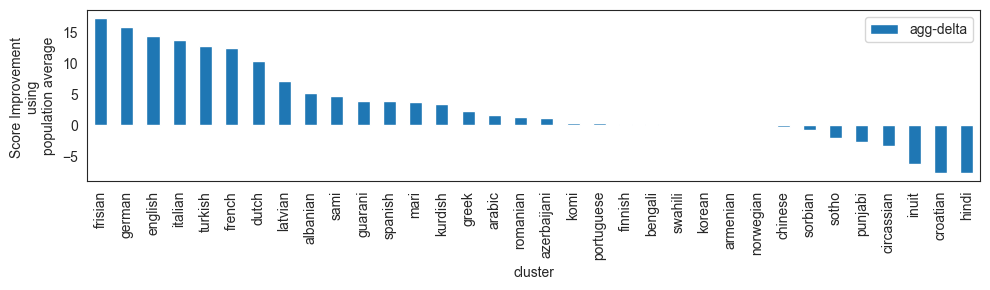

In [129]:
all_lang_delta_list=[]
for lang in all_lang_delta:
    all_lang_delta_list.append([lang, sum(all_lang_delta[lang])/len(all_lang_delta[lang])])
all_lang_delta_df=pd.DataFrame.from_records(all_lang_delta_list,columns=['cluster','agg-delta'])
all_lang_delta_df=all_lang_delta_df.sort_values(by=['agg-delta'],ascending=False)
all_lang_delta_df.reset_index
all_lang_delta_df=all_lang_delta_df.round(1)


fig, ax = plt.subplots(1,1, figsize = (10,3))
all_lang_delta_df.plot.bar(x='cluster',ax=ax)
ax.set_ylabel('Score Improvement \nusing \npopulation average')
plt.tight_layout()
plt.savefig('../figures/pop_avg.pdf')
plt.show()

##### print as list

In [130]:
all_lang_delta_df=all_lang_delta_df.reset_index()
all_lang_delta_df
delta_concat=pd.DataFrame()
delta_concat['ind1']=all_lang_delta_df.iloc[:17].index.to_list()
delta_concat['ind1']+=1
delta_concat['c1']=all_lang_delta_df.iloc[:17]['cluster'].to_list()
delta_concat['d1']=all_lang_delta_df.iloc[:17]['agg-delta'].to_list()
delta_concat['ind2']=all_lang_delta_df.iloc[17:].index.to_list()
delta_concat['ind2']+=1
delta_concat['c2']=all_lang_delta_df.iloc[17:]['cluster'].to_list()
delta_concat['d2']=all_lang_delta_df.iloc[17:]['agg-delta'].to_list()

In [131]:
caption_text="""Language \cluster{} score improvement (avg. +$\Delta$) over 
raw evaluation score through using population-weighted average. The general 
trend is favouring \clusters{} with latin-script \dialects{}.
"""
print(delta_concat.fillna('-').to_latex(index=False,multicolumn=True,
                         multirow=True,
                         escape=False,
                                        column_format='rlr|rlr',
                                        header=['rank','\cluster{}','+$\Delta$','rank',
                                                 '\cluster{}','+$\Delta$'],
                                        
                        label='tab:pop_avga',
                        caption=caption_text))

\begin{table}
\centering
\caption{Language \cluster{} score improvement (avg. +$\Delta$) over 
raw evaluation score through using population-weighted average. The general 
trend is favouring \clusters{} with latin-script \dialects{}.
}
\label{tab:pop_avga}
\begin{tabular}{rlr|rlr}
\toprule
rank & \cluster{} & +$\Delta$ & rank &  \cluster{} & +$\Delta$ \\
\midrule
   1 &    frisian &      17.3 &   18 & azerbaijani &       1.2 \\
   2 &     german &      15.8 &   19 &        komi &       0.4 \\
   3 &    english &      14.3 &   20 &  portuguese &       0.4 \\
   4 &    italian &      13.8 &   21 &     finnish &       0.3 \\
   5 &    turkish &      12.7 &   22 &     bengali &       0.2 \\
   6 &     french &      12.5 &   23 &     swahili &       0.1 \\
   7 &      dutch &      10.4 &   24 &      korean &       0.1 \\
   8 &    latvian &       7.2 &   25 &    armenian &       0.0 \\
   9 &   albanian &       5.2 &   26 &   norwegian &       0.0 \\
  10 &       sami &       4.8 &   27 &  

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/1562450845.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(delta_concat.fillna('-').to_latex(index=False,multicolumn=True,


In [132]:
min_set=list(set(min_gaps))
max_set=list(set(max_gaps))

import numpy as np
if np.nan in max_set:
    max_set.remove(np.nan)
if '-' in max_set:
    max_set.remove('-')
if np.nan in min_set:
    min_set.remove('-')
if '-' in min_set:
    min_set.remove('-')

count_st_min=0
count_st_max=0
all_set=[]
for i in range(0,max(len(min_set),len(max_set))):
    if i<len(min_set): 
        if min_set[i] in all_standerd:
            min_set[i]=min_set[i]+'*'
            count_st_min+=1
        mi=min_set[i]
    else:
        mi='-'
    if i<len(max_set):
        if max_set[i] in all_standerd:
            max_set[i]=max_set[i]+'*'
            count_st_max+=1
        ma=max_set[i]
    else:
        ma='-'
    all_set.append([ma,mi])
# all_set.append([round(count_st_max*100/len(max_set),1),round(count_st_min*100/len(min_set),1)])

In [133]:
lang_disparity=pd.DataFrame.from_records(all_set,columns=['max disparity','min disparity'])

common=set(lang_disparity['max disparity']) & set(lang_disparity['min disparity'])
only_max=set(lang_disparity['max disparity']).difference(set(lang_disparity['min disparity']))
only_min=set(lang_disparity['min disparity']).difference(set(lang_disparity['max disparity']))

only_max=list(only_max)
only_max.remove('-')

lang_dis_sep=pd.DataFrame([only_max,list(only_min),
                           list(common)], ['Only Max', 'Only Min', 'Common']).T

vmax='{}/{}'.format(len(lang_dis_sep[lang_dis_sep['Only Max'].str.endswith('*')==True]),
          len(lang_dis_sep[lang_dis_sep['Only Max']!=None]))
vmin='{}/{}'.format(len(lang_dis_sep[lang_dis_sep['Only Min'].str.endswith('*')==True]),
          len(lang_dis_sep[lang_dis_sep['Only Min']!=None]))
vcom='{}/{}'.format(len(lang_dis_sep[lang_dis_sep['Common'].str.endswith('*')==True]),
          len(lang_dis_sep[lang_dis_sep['Common']!=None]))

lang_dis_sep.index += 1
lang_dis_sep.loc['(count std)']=[vmax,vmin,vcom]


In [134]:
lang_dis_sep

Only Max                      Only Min  \
1                  spanish/extremaduran         komi/zyrian/dialectal   
2                 turkish/crimean tatar             german/low german   
3                     romanian/moldovan                    hindi/fiji   
4                        french/walloon             circassian/adyghe   
5                     azerbaijani/south           chinese/simplified*   
6                         sorbian/upper                  mari/eastern   
7                     chinese/cantonese              finnish/finnish*   
8                    italian/neapolitan             norwegian/bokmaal   
9                       korean/southern                    chinese/wu   
10                     english/singlish               latvian/latvian   
11                    latvian/latgalian              guarani/guarani*   
12                      arabic/egyptian                     komi/komi   
13                      dutch/colognian             english/standard*   
14                 circassian/kabardian                korean/korean*   
15                     italian/friulian           bengali/west bengal   
16                     frisian/northern       arabic/modern standard*   
17                     dutch/limburgish              italian/italian*   
18                      arabic/maghrebi             croatian/croatian   
19               german/swiss german/zh                  dutch/dutch*   
20           italian/emiliano-romagnolo              kurdish/northern   
21                 komi/zyrian/written*  chinese/traditional/hongkong   
22                  german/pennsylvania                 inuit/inupiaq   
23                         arabic/najdi              spanish/spanish*   
24                           sami/skolt              kurdish/kurdish*   
25                 english/indian/south             swahili/tanzanian   
26             english/american/african              english/scottish   
27                         komi/permyak                german/german*   
28                   portuguese/written              guarani/paraguay   
29              english/jamaican patois        arabic/levantine/south   
30                      italian/umbrian             azerbaijani/north   
31                norwegian/nynorsk/old          portuguese/european*   
32                         greek/pontic               punjabi/western   
33                       guarani/brazil            albanian/albanian*   
34                        albanian/gheg               arabic/bahraini   
35                           french/old                  greek/modern   
36                        chinese/hakka               turkish/turkish   
37                    inuit/kalaallisut                french/french*   
38                     finnish/estonian   spanish/portuguese/european   
39              croatian/serbo-croatian                 sorbian/lower   
40                    chinese/classical                english/simple   
41                     italian/ligurian                   sami/north*   
42                                 None               frisian/western   
43                                 None             romanian/romanian   
(count std)                        1/43                         15/43   

                           Common  
1                 kurdish/central  
2                armenian/western  
3              norwegian/nynorsk*  
4              armenian/armenian*  
5            chinese/traditional*  
6                   arabic/kabyle  
7                spanish/galician  
8                 sotho/northern*  
9                  sotho/southern  
10                           None  
11                           None  
12                           None  
13                           None  
14                           None  
15                           None  
16                           None  
17                           None  
18                           None  
19                           None  
20                       

In [135]:
print(lang_dis_sep.fillna('-').to_latex(index=False,multicolumn=True,
                         multirow=True,
                         escape=False,
                        label='tab:lang disparity list',
                        caption='lang list disparity'))

\begin{table}
\centering
\caption{lang list disparity}
\label{tab:lang disparity list}
\begin{tabular}{lll}
\toprule
                  Only Max &                     Only Min &               Common \\
\midrule
      spanish/extremaduran &        komi/zyrian/dialectal &      kurdish/central \\
     turkish/crimean tatar &            german/low german &     armenian/western \\
         romanian/moldovan &                   hindi/fiji &   norwegian/nynorsk* \\
            french/walloon &            circassian/adyghe &   armenian/armenian* \\
         azerbaijani/south &          chinese/simplified* & chinese/traditional* \\
             sorbian/upper &                 mari/eastern &        arabic/kabyle \\
         chinese/cantonese &             finnish/finnish* &     spanish/galician \\
        italian/neapolitan &            norwegian/bokmaal &      sotho/northern* \\
           korean/southern &                   chinese/wu &       sotho/southern \\
          english/singlish &      

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/4144363341.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(lang_dis_sep.fillna('-').to_latex(index=False,multicolumn=True,


In [136]:
lang_disparity=pd.DataFrame.from_records(all_set,columns=['max disparity','min disparity'])
list_max=list(lang_disparity['max disparity'])
list_min=list(lang_disparity['min disparity'])
lang_disparity['max disparity']=lang_disparity.apply(lambda x: '\\fbox{{{}}}'.format(x['max disparity']) if 
                                                     x['max disparity'] in 
                                                     list_min
                                                     else x['max disparity'],axis=1)
lang_disparity['min disparity']=lang_disparity.apply(lambda x: '\\fbox{{{}}}'.format(x['min disparity']) if 
                                                     x['min disparity'] in 
                                                     list_max
                                                     else x['min disparity'],axis=1)

lang_disparity.index += 1

print(lang_disparity.to_latex(index=False,multicolumn=True,
                         multirow=True,
                         escape=False,
                        label='tab:lang disparity list',
                        caption='lang list disparity'))

\begin{table}
\centering
\caption{lang list disparity}
\label{tab:lang disparity list}
\begin{tabular}{ll}
\toprule
              max disparity &                min disparity \\
\midrule
       spanish/extremaduran &        komi/zyrian/dialectal \\
      turkish/crimean tatar &       \fbox{kurdish/central} \\
     \fbox{kurdish/central} &            german/low german \\
          romanian/moldovan &                   hindi/fiji \\
             french/walloon &            circassian/adyghe \\
          azerbaijani/south &               german/german* \\
    \fbox{spanish/galician} &                 mari/eastern \\
              sorbian/upper &      \fbox{spanish/galician} \\
         italian/neapolitan &            norwegian/bokmaal \\
            korean/southern &              latvian/latvian \\
      \fbox{sotho/southern} &                   chinese/wu \\
           english/singlish &        \fbox{sotho/southern} \\
          chinese/cantonese &      arabic/modern standard* \\
       

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/649506716.py:15: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(lang_disparity.to_latex(index=False,multicolumn=True,


In [137]:
all_summary.keys()

dict_keys(['dep', 'pos', 'ner', 'sdqa-test', 'topic', 'nli', 'rcmc'])

#### only zero-shot

In [1128]:
all_dt_results['sdqa-test']

lang-group                             variety             target  count  \
0      korean  korean (a:south-eastern, m:spoken)       korean--kors    276   
1      korean                    seoul (m:spoken)       korean--korn    276   
2     bengali                     vanga (a:dhaka)     bengali--dhaka    113   
3     bengali               vanga (a:west bengal)       bengali--ind    113   
4     swahili                   swahili (a:kenya)     swahili--kenya    472   
5     swahili                swahili (a:tanzania)  swahili--tanzania    472   
6      arabic             arabic (a:saudi-arabia)        arabic--sau    921   
7      arabic                     egyptian arabic        arabic--egy    921   
8      arabic                     moroccan arabic        arabic--mar    921   
9      arabic                     tunisian arabic        arabic--tun    921   
10     arabic                     algerian arabic        arabic--dza    921   
11     arabic                   arabic (a:jordan)        arabic--jor    921   
12     arabic                  arabic (a:bahrain)        arabic--bhr    921   
13     anglic            southern african english       english--zaf    440   
14     anglic            indian english (a:south)     english--ind_s    440   
15     anglic                      kenyan english     english--kenya    440   
16     anglic            indian english (a:north)     english--ind_n    440   
17     anglic                    nigerian english       english--nga    440   
18     anglic                  philippine english       english--phl    440   
19     anglic                       irish english       english--irl    440   
20     anglic          southeast american english       english--usa    440   
21     anglic                  australian english       english--aus    440   
22     anglic                 new zealand english       english--nzl    440   
23     anglic                english (a:scotland)       english--gbr    440   

    bert_tune_f1  xlmr_tune_f1  bert_zero_f1  xlmr_zero_f1  mistral7b  \
0           9.92         31.01          7.22         20.08      64.63   
1          10.15         31.91          7.26         19.62      65.79   
2          67.37         74.24         31.79         35.52      51.73   
3          68.62         73.27         32.30         36.39      50.06   
4          72.25         70.53         37.97         41.59      58.71   
5          63.54         62.30         38.24         39.38      55.70   
6          77.88         72.11         52.72         53.24      55.66   
7          76.53         70.75         51.80         51.99      54.66   
8          76.73         71.57         51.86         52.17      53.92   
9          76.72         71.64         52.28         52.94      55.03   
10         77.85         72.34         52.56         53.52      55.18   
11         77.35         71.29         52.72         53.72      54.93   
12         77.52         72.11         53.25         53.28      55.33   
13         76.66         71.18         71.49         63.87      71.14   
14         71.93         66.88         66.49         60.36      65.13   
15         72.59         66.68         68.72         58.64      64.91   
16         74.62         68.03         68.84         61.25      68.99   
17         73.61         68.33         69.10         61.27      68.10   
18         76.37         70.64         70.47         62.22      70.11   
19         75.52         70.73         70.92         62.15      70.64   
20         77.26         71.50         71.17         63.71      71.76   
21         75.66         70.89         71.20         62.28      69.23   
22         76.71         71.39         71.22         63.69      70.95   
23         76.38         70.34         71.82         63.15      70.18   

    base_score  ...  group_zero_gap_per  base_zero_group  group_zero_group  \
0        71.17  ...            0.550964        89.827174          0.550964   
1        71.17  ...            0.000000      

In [138]:
task_score_zero_column={
    'dep':'bert_uas_zeroshot',
    'sdqa-test':'bert_zero_f1',
    'topic':'bert_zero',
    'rcmc':'bert-f1',
    'ner':'bert_f1_zeroshot',
    'nli':'bert_f1',
    'pos':'bert_f1_zeroshot',
    'mt':'NLLB_1_3bn-bleu',
    'sdqa-test':'bert_zero_f1',
    'di':'F1 (mBERT)'
}
task_target_column={
    'dep':'target',
    'pos':'tgt-code',
    'ner':'tgt-code',
    'sdqa-test':'target',
    'topic':'target',
    'rcmc':'dialect',
    'nli':'tgt',
    'sdqa-test':'target'
}

task_type={
    'dep':'Structured prediction',
    'pos':'Structured prediction',
    'ner':'Structured prediction',
    'sdqa-test':'Qusetion Answering',
    'topic':'Sequence classification',
    'rcmc':'Qusetion Answering',
    'nli':'Sequence classification',
    'mt':'Generation',
    'di':'Sequence classification'
}
tasks=['dep', 'pos', 'ner', 'topic', 'nli', 'sdqa-test']
comp_stat=[]
for task in tasks:
    sc_col=task_score_zero_column[task]
    df_all=all_dt_results[task].copy()
    variety_col='variety'
    if task=='mt':
        variety_col='dialect'
    clusters=len(df_all.groupby('lang-group'))
    varieties=len(df_all)
    
#     cv='({}, {})'.format(clusters, varieties)
    avg=df_all[sc_col].mean().round(1)
    lang_v=df_all[df_all[sc_col]==
                          df_all[sc_col].max()].iloc[0]
    best_perf=lang_v['lang-group']+'/'+lang_v[variety_col]
    best_perf_score=df_all[sc_col].max().round(1)

    lang_v=df_all[df_all[sc_col]==
                          df_all[sc_col].min()].iloc[0]
    lowest_perf=lang_v['lang-group']+'/'+lang_v[variety_col]
    lowest_perf_score=df_all[sc_col].min().round(1)

    max_gap=df_all[df_all['base_zero_group']==
                          df_all['base_zero_group'].max()].iloc[0]
    max_gap_l=max_gap['lang-group']
    max_gap_v=max_gap['base_zero_group'].round(1)
    max_gap='({},{})'.format(max_gap['lang-group'],max_gap['base_zero_group'].round(1))
    df_all=df_all[df_all['lang-group'].str.lower()!='english']
    min_gap=df_all[(df_all['base_zero_group']==
                          df_all['base_zero_group'].min())
                                 & (df_all['base_zero_group']!=0)].iloc[0]
    min_gap_l=min_gap['lang-group']
    min_gap_v=min_gap['base_zero_group'].round(1)
    min_gap='({},{})'.format(min_gap['lang-group'],min_gap['base_zero_group'].round(1))
    
    print(task_type[task],task,avg,best_perf,lowest_perf,min_gap,max_gap)
    comp_stat.append([task_type[task],task,clusters,varieties,avg,best_perf,best_perf_score,
                      lowest_perf,lowest_perf_score,min_gap_l,min_gap_v,max_gap_l,max_gap_v])

comp_stat_df=pd.DataFrame.from_records(comp_stat,columns=['Category','Task','C', 'V','Score(Avg.)',
                                                          'Max (V)','Max V score',
                                                         'Min (V)','Min V score',
                                                         'Gap-Min (C)','Gap-Min s',
                                                         'Gap-Max (C)','Gap-Max s'])
comp_stat_df=comp_stat_df.set_index(['Category','Task'])    

print('\n\n\n')
print(comp_stat_df.to_latex(multicolumn=True,
                         multirow=True,
                         escape=True,
                        label='tab:comp_stat_main',
                        caption='Zero-Shot Task Result Comparison'))

Structured prediction dep 52.0 english/standard guarani/brazil (portuguese,19.4) (guarani,83.6)
Structured prediction pos 58.9 english/standard guarani/brazil (norwegian,14.7) (guarani,86.6)
Structured prediction ner 58.5 english/simple english/jamaican patois (hindi,12.6) (kurdish,77.1)
Sequence classification topic 73.0 chinese/traditional kurdish/central (chinese,0.4) (kurdish,74.2)
Sequence classification nli 57.7 english/standard arabic/kabyle (spanish,9.6) (sotho,57.5)
Qusetion Answering sdqa-test 53.9 english/scottish korean/southern (arabic,26.3) (korean,89.8)




\begin{table}
\centering
\caption{Zero-Shot Task Result Comparison}
\label{tab:comp_stat_main}
\begin{tabular}{llrrrlrlrlrlr}
\toprule
                   &           &   C &   V &  Score(Avg.) &              Max (V) &  Max V score &                  Min (V) &  Min V score & Gap-Min (C) &  Gap-Min s & Gap-Max (C) &  Gap-Max s \\
Category & Task &     &     &              &                      &              &         

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/1581411930.py:83: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_stat_df.to_latex(multicolumn=True,


In [139]:
task_score_tune_column={
    'dep':'bert_uas_finetuned',
    'sdqa-test':'bert_tune_f1',
    'topic':'bert_f1',
    'rcmc':'bert-f1',
    'ner':'bert_f1_tune',
    'nli':'bert_f1',
    'pos':'bert_f1_tune',
    'mt':'NLLB_1_3bn-bleu',
    'di':'F1 (mBERT)'
}

comp_stat=[]
tasks=['ner','topic','di','sdqa-test','rcmc']
for task in tasks:
    if task=='rcmc':
        group_gap_col='base_zero_group'
    else:
        group_gap_col='group_tune_group'
    sc_col=task_score_tune_column[task]
    df_all=all_dt_results[task].copy()
    df_all=df_all[df_all[task_score_tune_column[task]]!='-']
    variety_col='variety'
    if task=='mt':
        variety_col='dialect'
    clusters=len(df_all.groupby('lang-group'))
    varieties=len(df_all)
    
#     cv='({}, {})'.format(clusters, varieties)
    avg=df_all[sc_col].mean().round(1)
    lang_v=df_all[df_all[sc_col]==
                          df_all[sc_col].max()].iloc[0]
    best_perf=lang_v['lang-group']+'/'+lang_v[variety_col]
    best_perf_score=round(df_all[sc_col].max(),1)

    lang_v=df_all[df_all[sc_col]==
                          df_all[sc_col].min()].iloc[0]
    lowest_perf=lang_v['lang-group']+'/'+lang_v[variety_col]
    lowest_perf_score=round(df_all[sc_col].min(),1)

    max_gap=df_all[df_all[group_gap_col]==
                          df_all[group_gap_col].max()].iloc[0]
    max_gap_l=max_gap['lang-group']
    max_gap_v=round(max_gap[group_gap_col],1)
#     max_gap='({},{})'.format(max_gap['lang-group'],max_gap[group_gap_col].round(1))
    df_all=df_all[df_all['lang-group'].str.lower()!='english']
    min_gap=df_all[(df_all[group_gap_col]==
                          df_all[group_gap_col].min())
                                 & (df_all[group_gap_col]!=0)].iloc[0]
    min_gap_l=min_gap['lang-group']
    min_gap_v=round(min_gap[group_gap_col],1)
#     min_gap='({},{})'.format(min_gap['lang-group'],min_gap[group_gap_col].round(1))
    
    print(task_type[task],task,avg,best_perf,lowest_perf)
    comp_stat.append([task_type[task],task,clusters,varieties,avg,best_perf,best_perf_score,
                      lowest_perf,lowest_perf_score,min_gap_l,min_gap_v,max_gap_l,max_gap_v])

comp_stat_df=pd.DataFrame.from_records(comp_stat,columns=['Category','Task','C', 'V','Score(Avg.)',
                                                          'Max (V)','Max V score',
                                                         'Min (V)','Min V score',
                                                         'Gap-Min (C)','Gap-Min s',
                                                         'Gap-Max (C)','Gap-Max s'])
comp_stat_df=comp_stat_df.set_index(['Category','Task'])    

print('\n\n\n')
caption_text="""Result summary for in-\cluster{} and combined finetuning using mBERT as base model."""
print(comp_stat_df.to_latex(multicolumn=True,
                         multirow=True,
                         escape=True,
                        label='tab:comp_stat_main',
                        caption=caption_text))

Structured prediction ner 65.0 romanian/romanian english/jamaican patois
Sequence classification topic 73.8 english/standard kurdish/northern
Sequence classification di 65.8 chinese/{simplified,mandarin/taiwanese} portuguese/written
Qusetion Answering sdqa-test 69.2 arabic/saudi arabian korean/southern
Qusetion Answering rcmc 39.4 english/standard sotho/southern




\begin{table}
\centering
\caption{Result summary for in-\cluster{} and combined finetuning using mBERT as base model.}
\label{tab:comp_stat_main}
\begin{tabular}{llrrrlrlrlrlr}
\toprule
                   &      &   C &   V &  Score(Avg.) &                                  Max (V) &  Max V score &                  Min (V) &  Min V score & Gap-Min (C) &  Gap-Min s & Gap-Max (C) &  Gap-Max s \\
Category & Task &     &     &              &                                          &              &                          &              &             &            &             &            \\
\midrule
Structured prediction & ne

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/1122607229.py:67: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_stat_df.to_latex(multicolumn=True,


In [140]:
# task_score_tune_column={
#     'dep':'bert_uas_finetuned',
#     'sdqa-test':'bert_tune_f1',
#     'topic':'bert_f1',
#     'rcmc':'bert-f1',
#     'ner':'bert_f1_tune',
#     'nli':'bert_f1',
#     'pos':'bert_f1_tune',
#     'mt':'NLLB_1_3bn-bleu',
#     'di':'F1 (mBERT)'
# }

# comp_stat=[]
# tasks=['dep','pos']
# for task in tasks:
#     if task=='rcmc':
#         group_gap_col='base_zero_group'
#     else:
#         group_gap_col='group_tune_group'
#     sc_col=task_score_tune_column[task]
#     df_all=all_dt_results[task].copy()
#     df_all=df_all[df_all[task_score_tune_column[task]]!='-']
#     variety_col='variety'
#     if task=='mt':
#         variety_col='dialect'
#     clusters=len(df_all.groupby('lang-group'))
#     varieties=len(df_all)
    
# #     cv='({}, {})'.format(clusters, varieties)
#     avg=df_all[sc_col].mean().round(1)
#     lang_v=df_all[df_all[sc_col]==
#                           df_all[sc_col].max()].iloc[0]
#     best_perf=lang_v['lang-group']+'/'+lang_v[variety_col]
#     best_perf_score=round(df_all[sc_col].max(),1)

#     lang_v=df_all[df_all[sc_col]==
#                           df_all[sc_col].min()].iloc[0]
#     lowest_perf=lang_v['lang-group']+'/'+lang_v[variety_col]
#     lowest_perf_score=round(df_all[sc_col].min(),1)

#     max_gap=df_all[df_all[group_gap_col]==
#                           df_all[group_gap_col].max()].iloc[0]
#     max_gap_l=max_gap['lang-group']
#     max_gap_v=round(max_gap[group_gap_col],1)
# #     max_gap='({},{})'.format(max_gap['lang-group'],max_gap[group_gap_col].round(1))
#     df_all=df_all[df_all['lang-group'].str.lower()!='english']
#     min_gap=df_all[(df_all[group_gap_col]==
#                           df_all[group_gap_col].min())
#                                  & (df_all[group_gap_col]!=0)].iloc[0]
#     min_gap_l=min_gap['lang-group']
#     min_gap_v=round(min_gap[group_gap_col],1)
# #     min_gap='({},{})'.format(min_gap['lang-group'],min_gap[group_gap_col].round(1))
    
#     print(task_type[task],task,avg,best_perf,lowest_perf)
#     comp_stat.append([task_type[task],task,clusters,varieties,avg,best_perf,best_perf_score,
#                       lowest_perf,lowest_perf_score,min_gap_l,min_gap_v,max_gap_l,max_gap_v])

# comp_stat_df=pd.DataFrame.from_records(comp_stat,columns=['Category','Task','C', 'V','Score(Avg.)',
#                                                           'Max (V)','Max V score',
#                                                          'Min (V)','Min V score',
#                                                          'Gap-Min (C)','Gap-Min s',
#                                                          'Gap-Max (C)','Gap-Max s'])
# comp_stat_df=comp_stat_df.set_index(['Category','Task'])    

# print('\n\n\n')
# caption_text="""Result summary for in-\dialect{} finetuning using mBERT as base model."""
# print(comp_stat_df.to_latex(multicolumn=True,
#                          multirow=True,
#                          escape=True,
#                         label='tab:comp_stat_main',
#                         caption=caption_text))

In [141]:
# task='dep'
# df_all=all_dt_results[task].copy()
# df_all=df_all[df_all[task_score_tune_column[task]]!='-']

### ALL RESULTS PLOT

In [1118]:
tasks=['dep', 'pos', 'ner', 'nli', 'topic', 'rcmc',
        'sdqa-test', 'sc', 'mt-dialect', 'mt-region', 'di']
task_title={
    'dep': 'Dependency Parsing\n\n\n',
    'pos':'Parts-of-Speech Tagging\n\n\n',
    'ner':'Named Entity Recognition\n\n\n\n',
    'nli':'Natural Language Inference\n\n\n\n',
    'topic':'Topic Classification\n\n\n',
    'rcmc':'Machine Reading Comprehension\n\n\n',
    'sdqa-test':'Extractive QA\n\n\n',
    'sc':'Sentiment Analysis\n\n\n',
    'mt-dialect':'Machine Translation (Dialect-level)\n\n\n\n\n',
    'mt-region':'Machine Translation (Region-level)\n\n\n\n\n',
    'di':'Dialect Identification\n\n\n'
}
result_cols={
    'dep':['bert_uas_zeroshot', 'xlmr_uas_zeroshot',
       'bert_uas_finetuned', 'xlmr_uas_finetuned'],
    'pos':['bert_f1_zeroshot', 'xlmr_f1_zeroshot',
       'bert_f1_tune', 'xlmr_f1_tune'],
    'ner':['bert_f1_zeroshot',
       'xlmr_f1_zeroshot', 'bert_f1_tune', 'xlmr_f1_tune'],
    'nli':['bert_f1', 'xlmr_f1'],
    'topic':['bert_zero', 'xlmr_zero', 'bert_f1', 'xlmr_f1'],
    'rcmc':['bert-f1', 'xlmr-f1'],
    'sdqa-dev':['bert_tune_f1', 'xlmr_tune_f1', 'bert_zero_f1',
       'xlmr_zero_f1'],
    'sdqa-test':['bert_tune_f1', 'xlmr_tune_f1', 'bert_zero_f1',
       'xlmr_zero_f1', 'mistral7b'],
    'sc':['MBERT_Acc',  'XLMR_Acc',  'mistral7b'],
    'mt-dialect':['NLLB_600m-bleu', 'NLLB_1_3bn-bleu'],
    'mt-region':['NLLB_600m-bleu', 'NLLB_1_3bn-bleu'],
    'di':['F1 (mBERT)', 'F1 (XLM-R)'],
    'di-all':['F1 (mBERT)', 'F1 (XLM-R)']
}
not_mbert=[]
for g,grp in lang_data.groupby('language group'):
    if 'tick' not in list(grp['mbert seen']):
        not_mbert.append(g)

In [1119]:
# import json

# config_template={
#     "ylabel":"Linguistic\nUtility",
#     "xlabel":"Variety",
#     "ylabel_font":15,
#     "xlabel_font":15,
#     "ylim_val":100,
#     "cluster_font":15,
#     "xtick_fontsize":20,
#     "ytick_fontsize":20,
#     "gap_bar":2,
#     "filename":"../figures/[taskname].pdf",
#     "score_column":"max_score",
#     "not_mbert":not_mbert,
    
#     "fig_x":20,
#     "fig_y":7,
#     "title":""
# }

# all_plot_meta={}
# for task in tasks:
#     config=config_template.copy()
#     config['title']=task_title[task]
#     config['filename']=config['filename'].replace('[taskname]',task)
#     all_plot_meta[task]=config

# with open('../metadata/plot_attributes_max.json', 'w',encoding='utf-8') as fp:
#     json.dump(all_plot_meta, fp,ensure_ascii=False,sort_keys=True,
#     indent=4)

#### standard_variety

In [1120]:
# standard_variety={}
# score_column='max_score'
# for task in tasks:
#     df=all_results[task].copy()
#     df.reset_index(inplace=True)
#     df=df.replace('-','0')
#     score_cols=result_cols[task]
#     df[score_cols]=df[score_cols].astype(float)
#     df['max_score']=df[score_cols].max(axis=1)
#     df=df.sort_values(by=['max_score'],ascending=True)
#     standard_variety[task]={}
#     groups=list(df.groupby('lang-group').max().sort_values(by=[score_column],ascending=True).index)
#     for g in groups:
#         grp=df[df['lang-group']==g]
#         grp=grp.sort_values(by=[score_column],ascending=True)
#         grp.reset_index(inplace=True)
#         standard_variety[task][g]=grp.iloc[-1]['variety']
# with open('../metadata/standard_variety.json', 'w',encoding='utf-8') as fp:
#     json.dump(standard_variety, fp,ensure_ascii=False,sort_keys=True,
#     indent=4)

### plot max

dep
pos
ner
nli
topic
di
sc
rcmc
sdqa-test
mt-dialect
mt-region


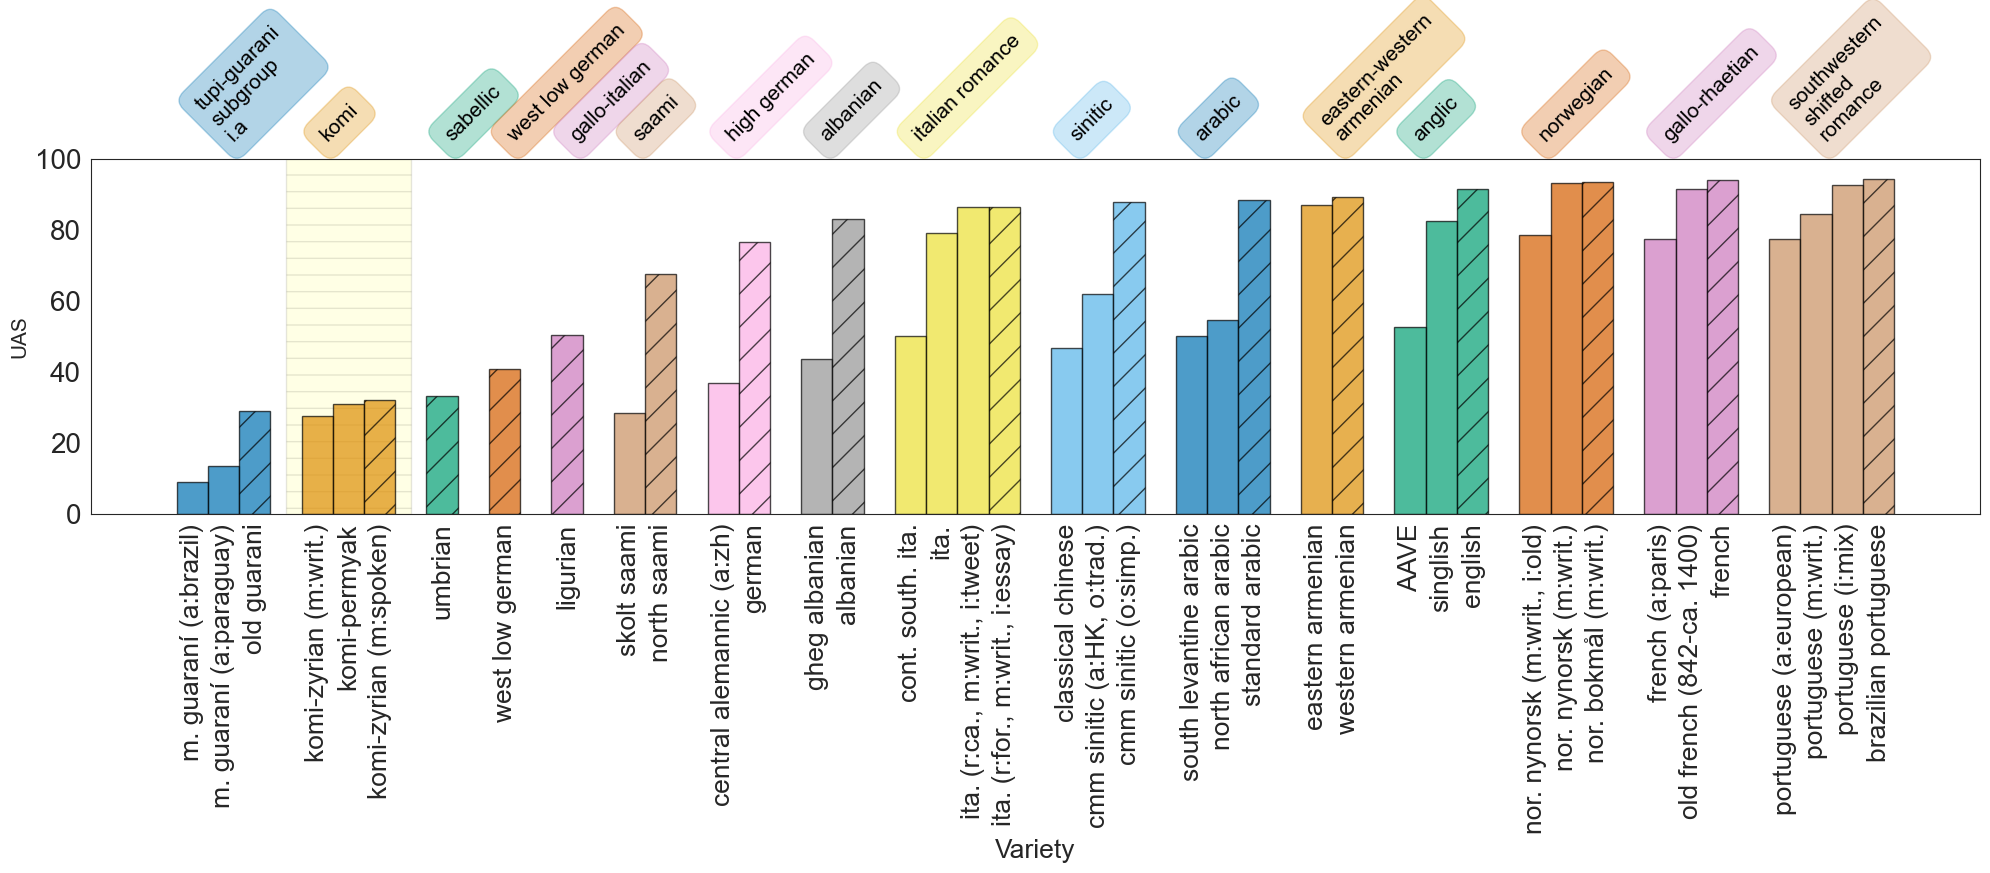

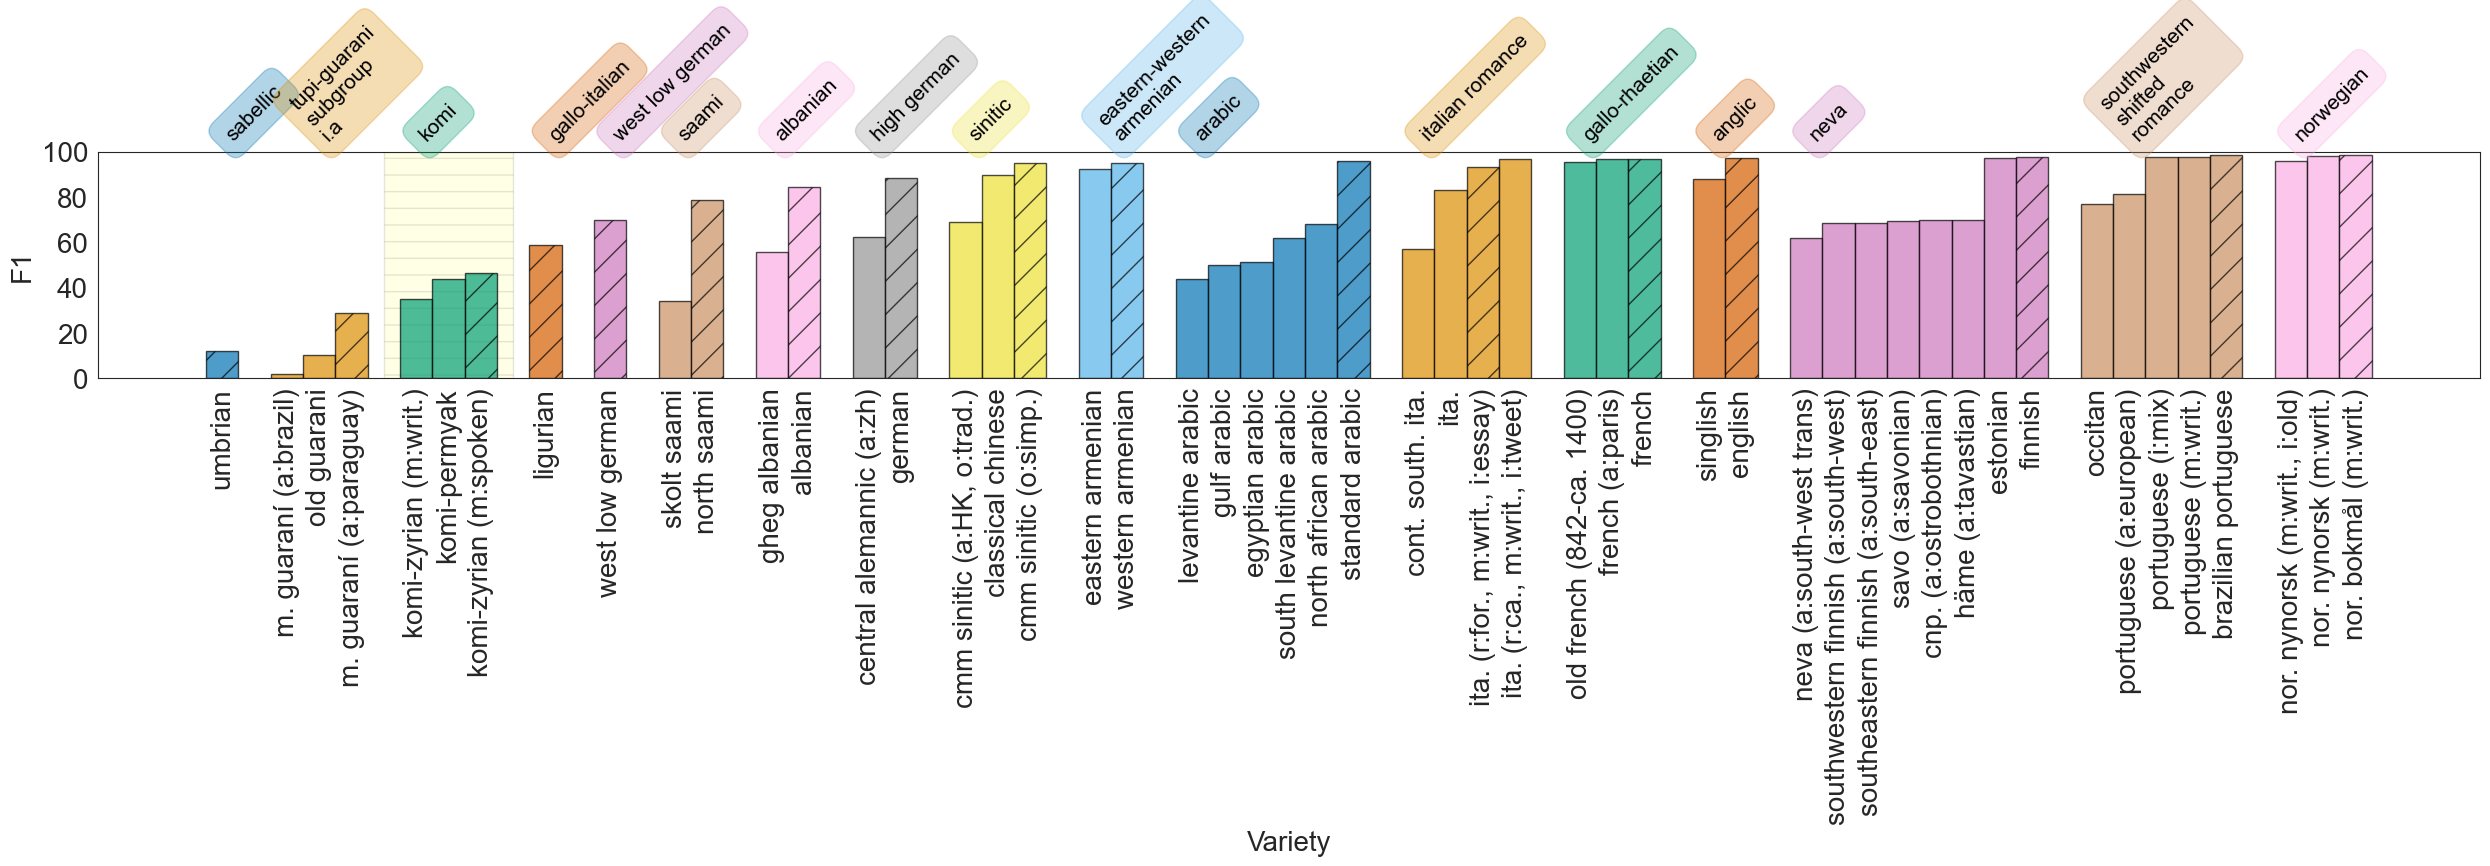

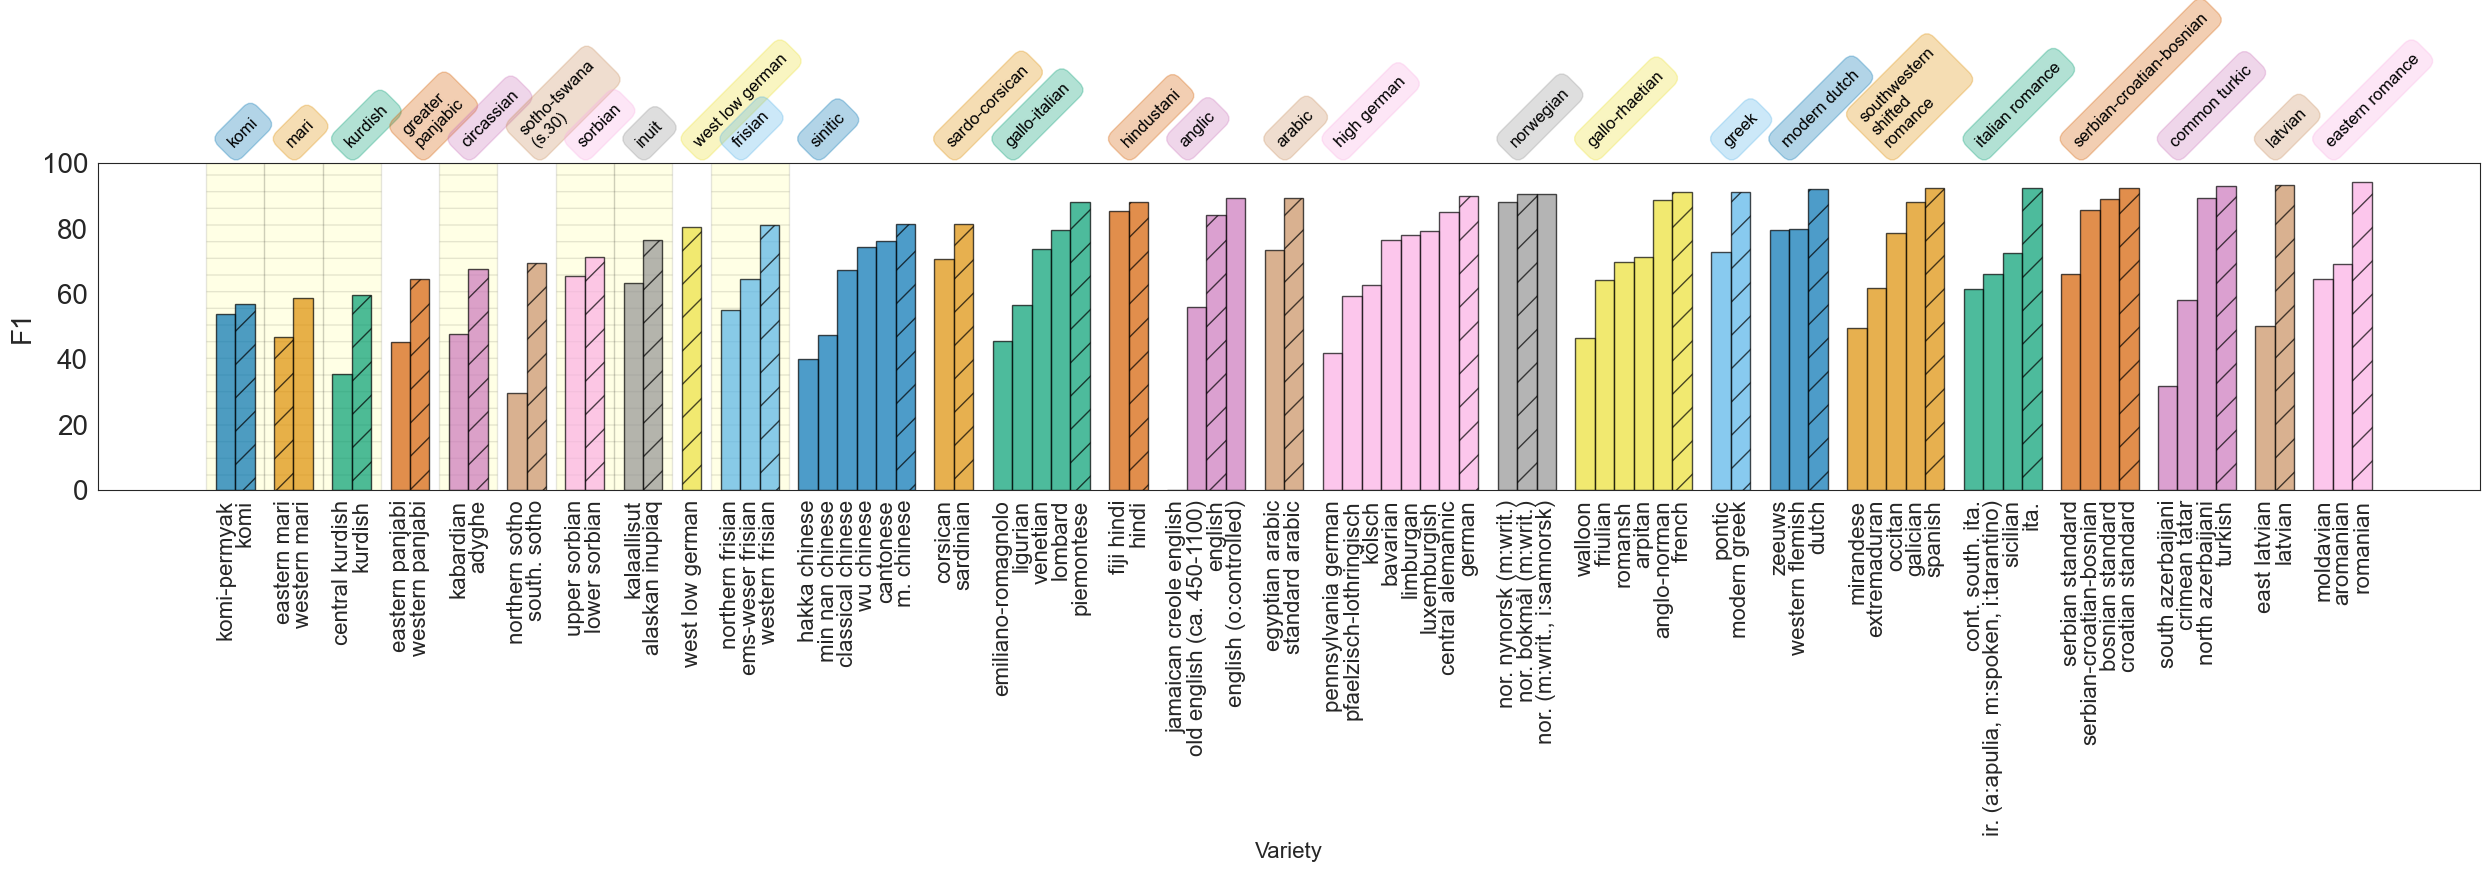

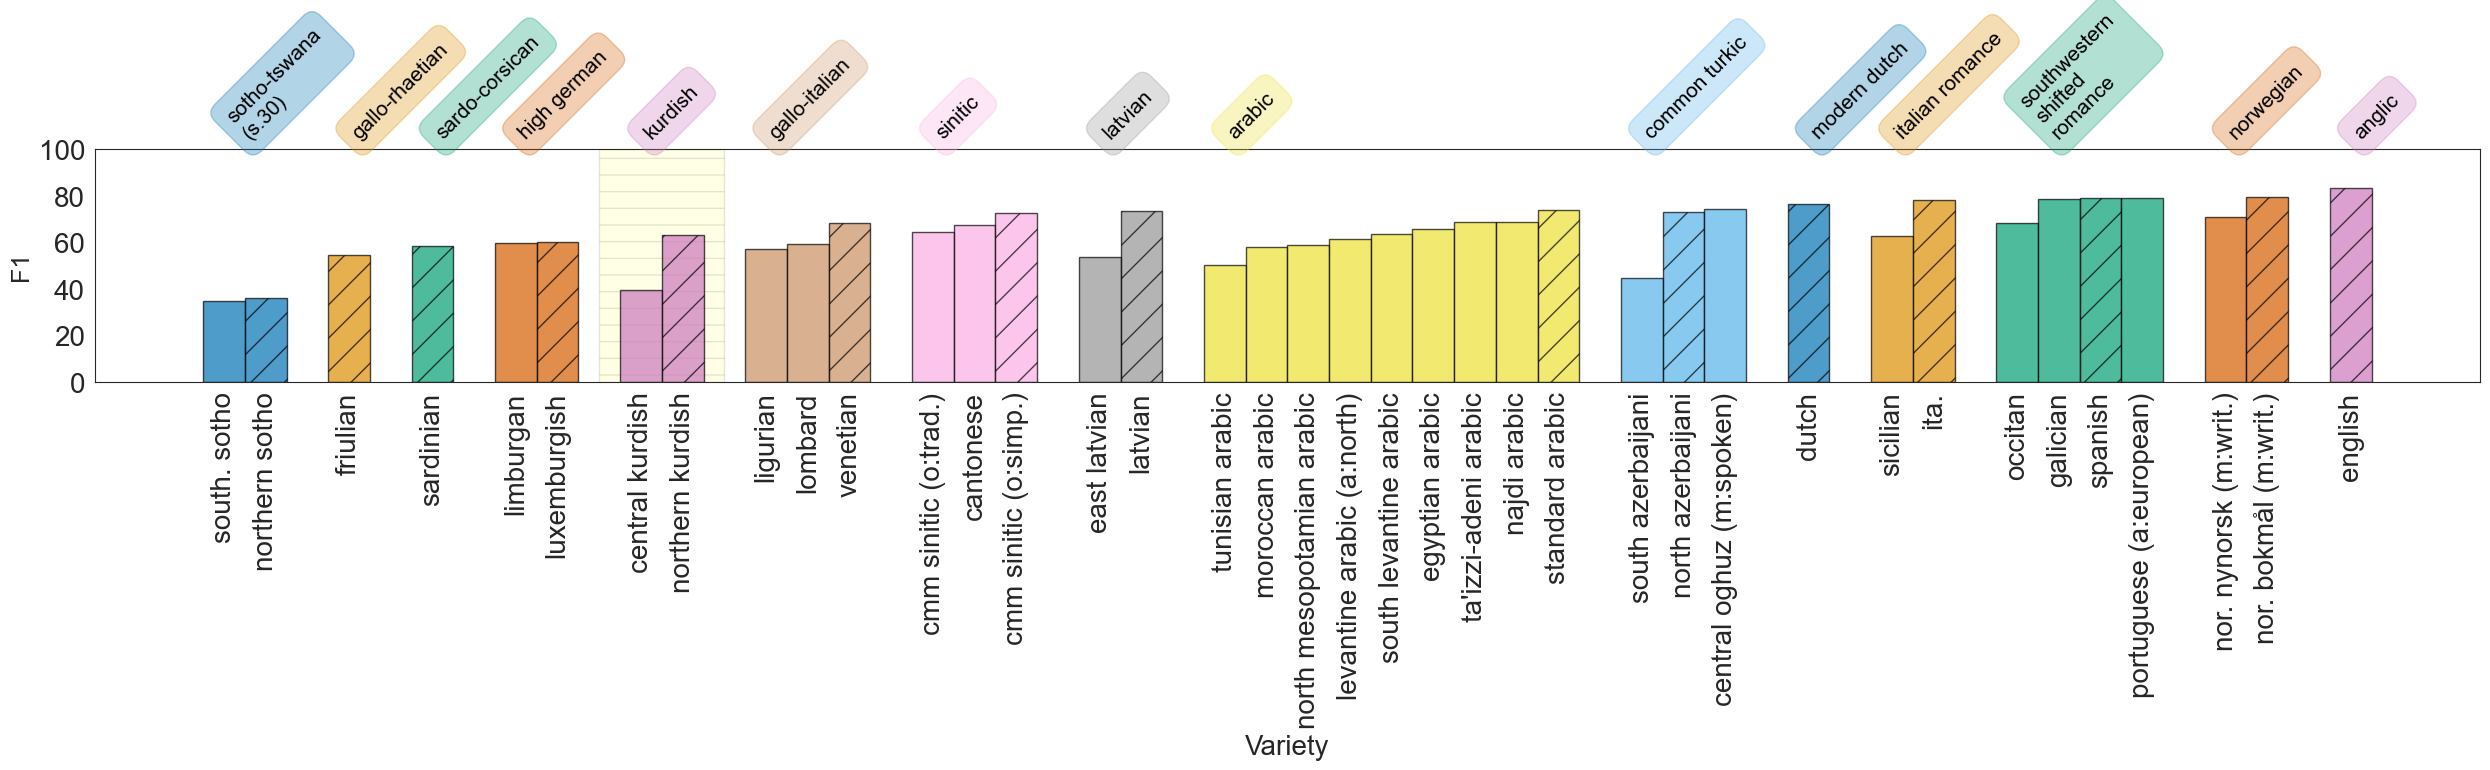

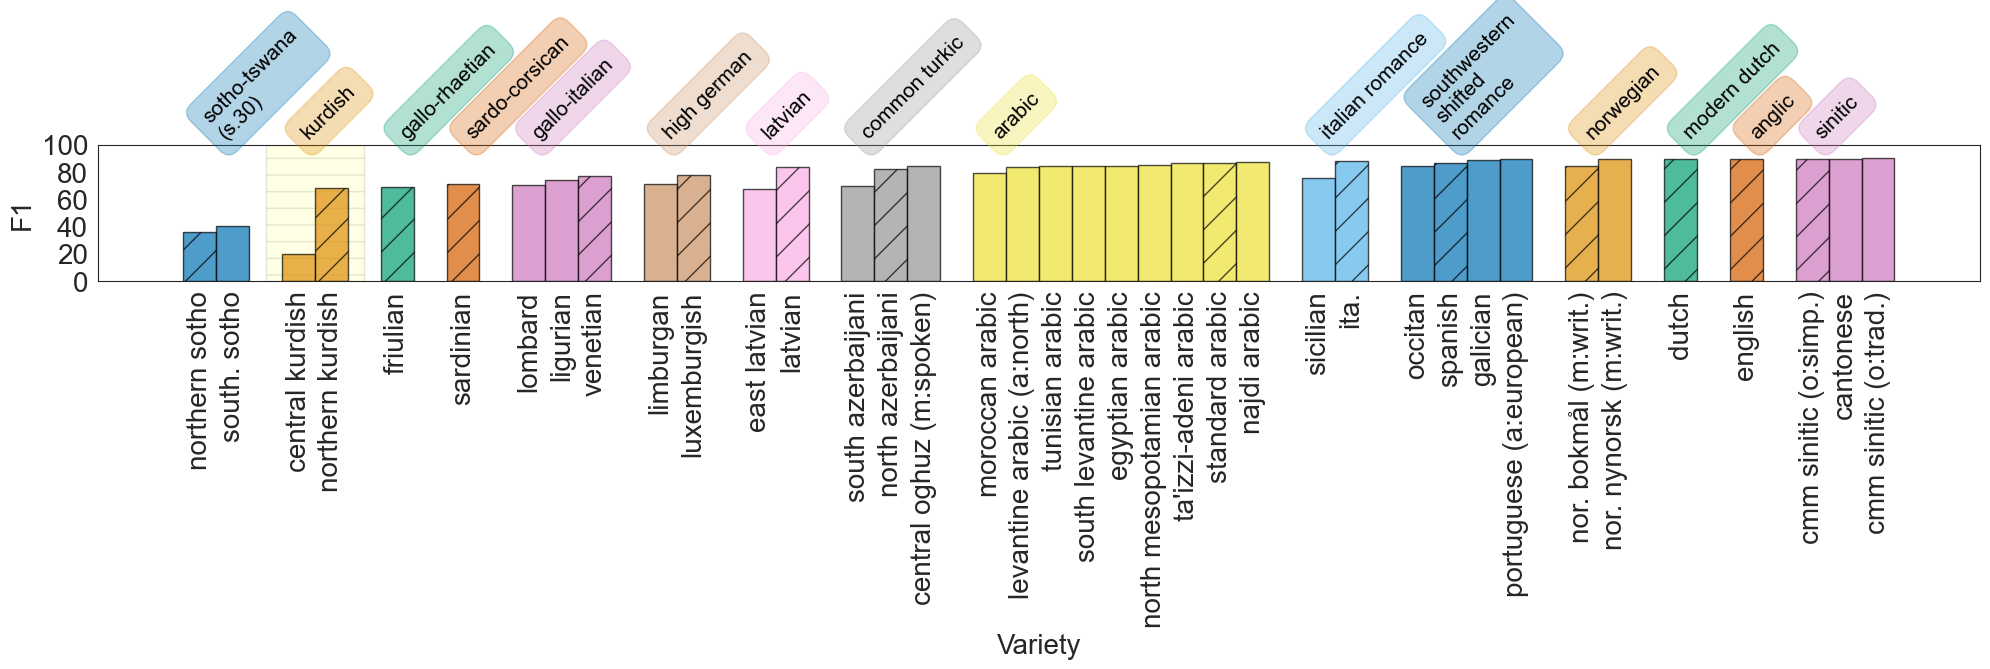

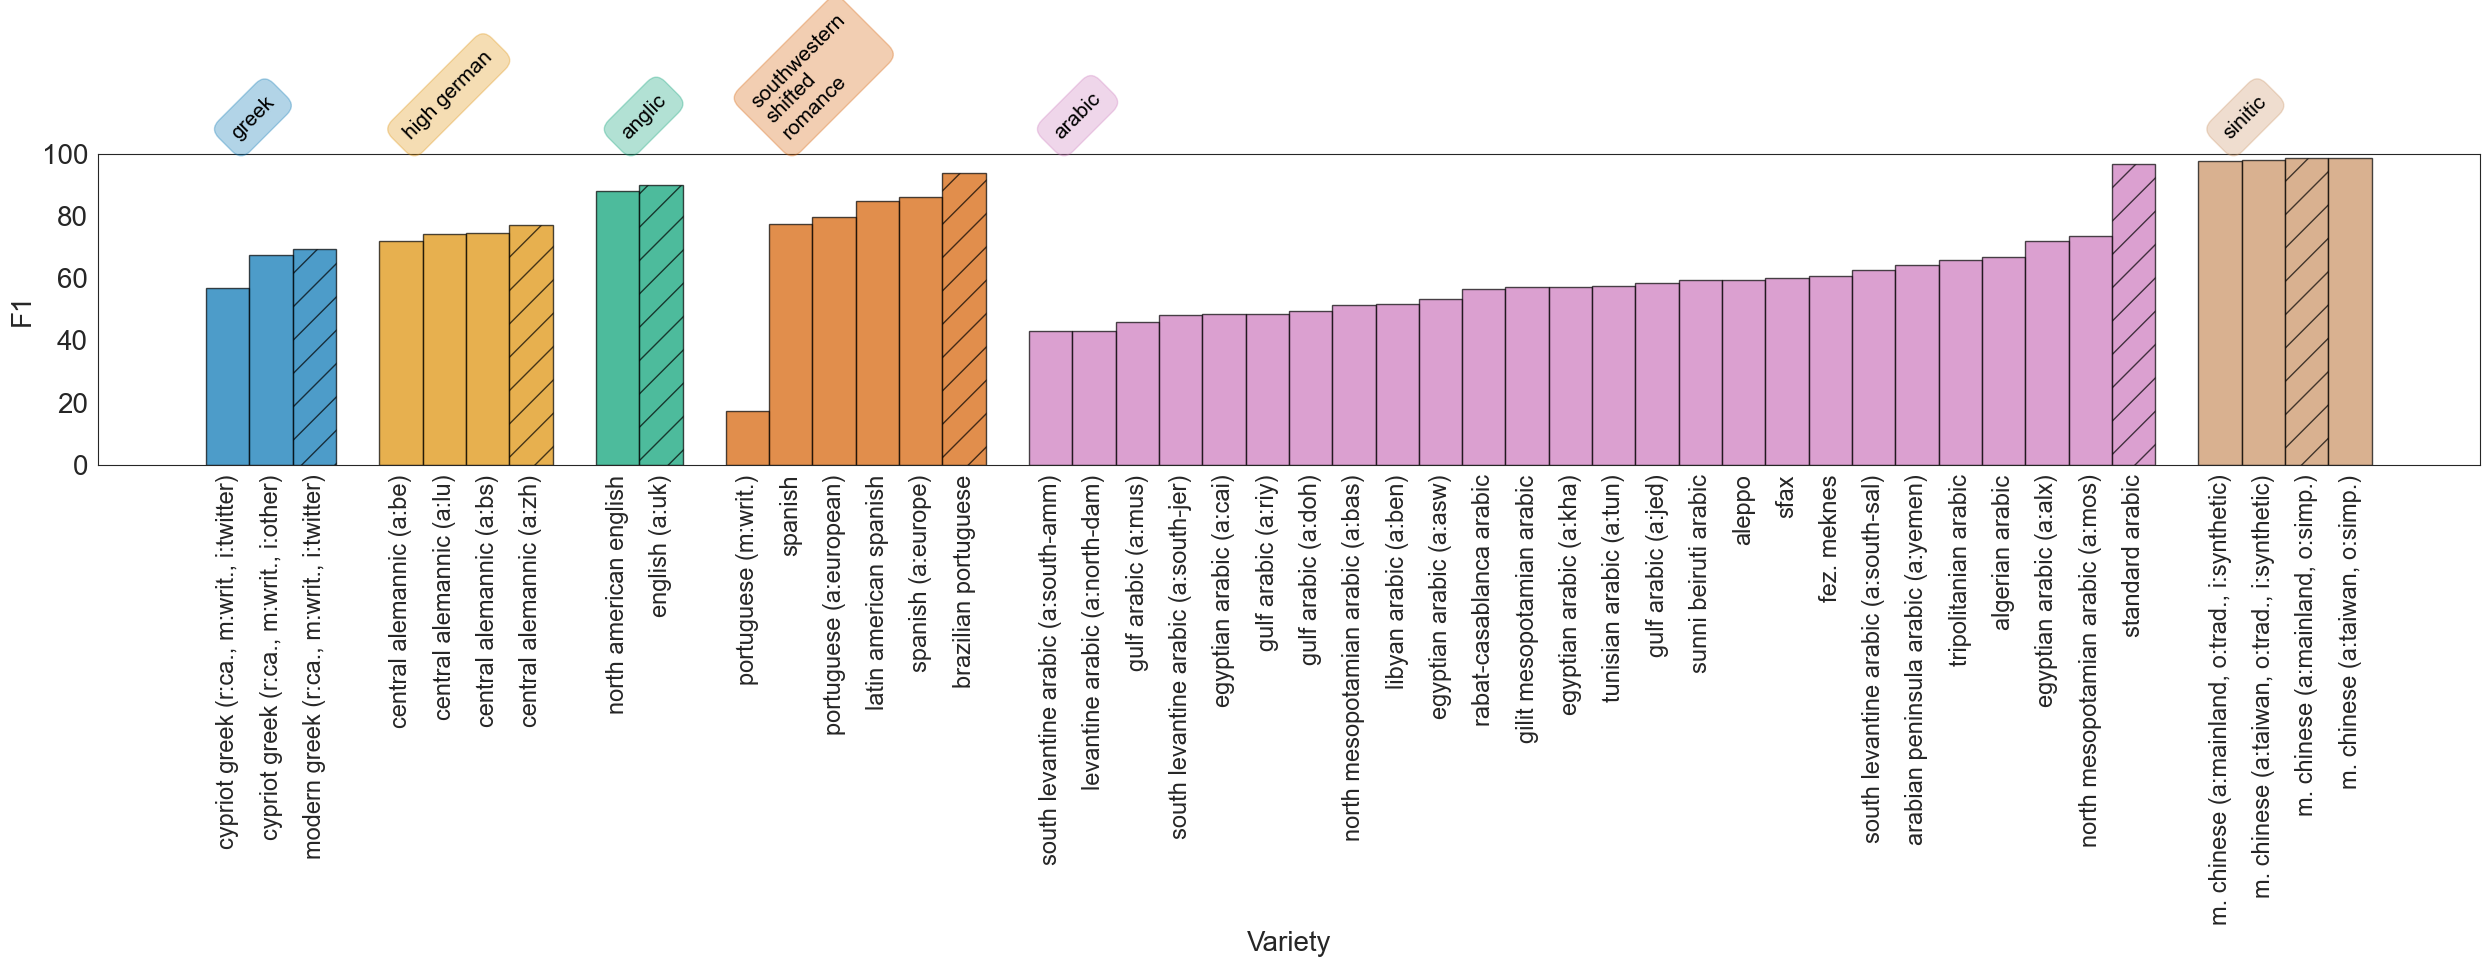

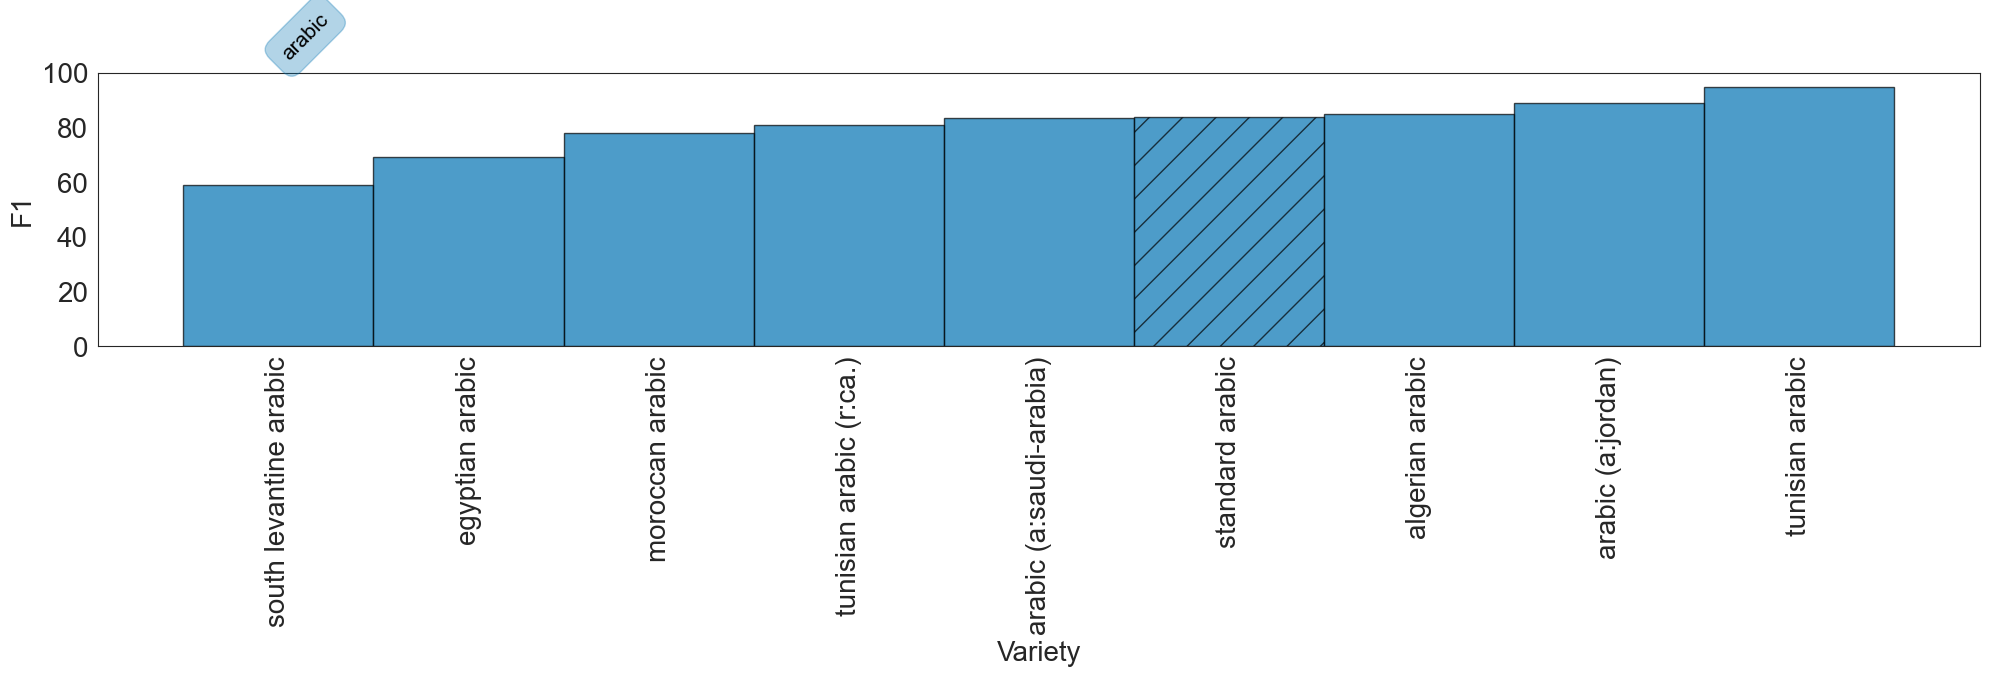

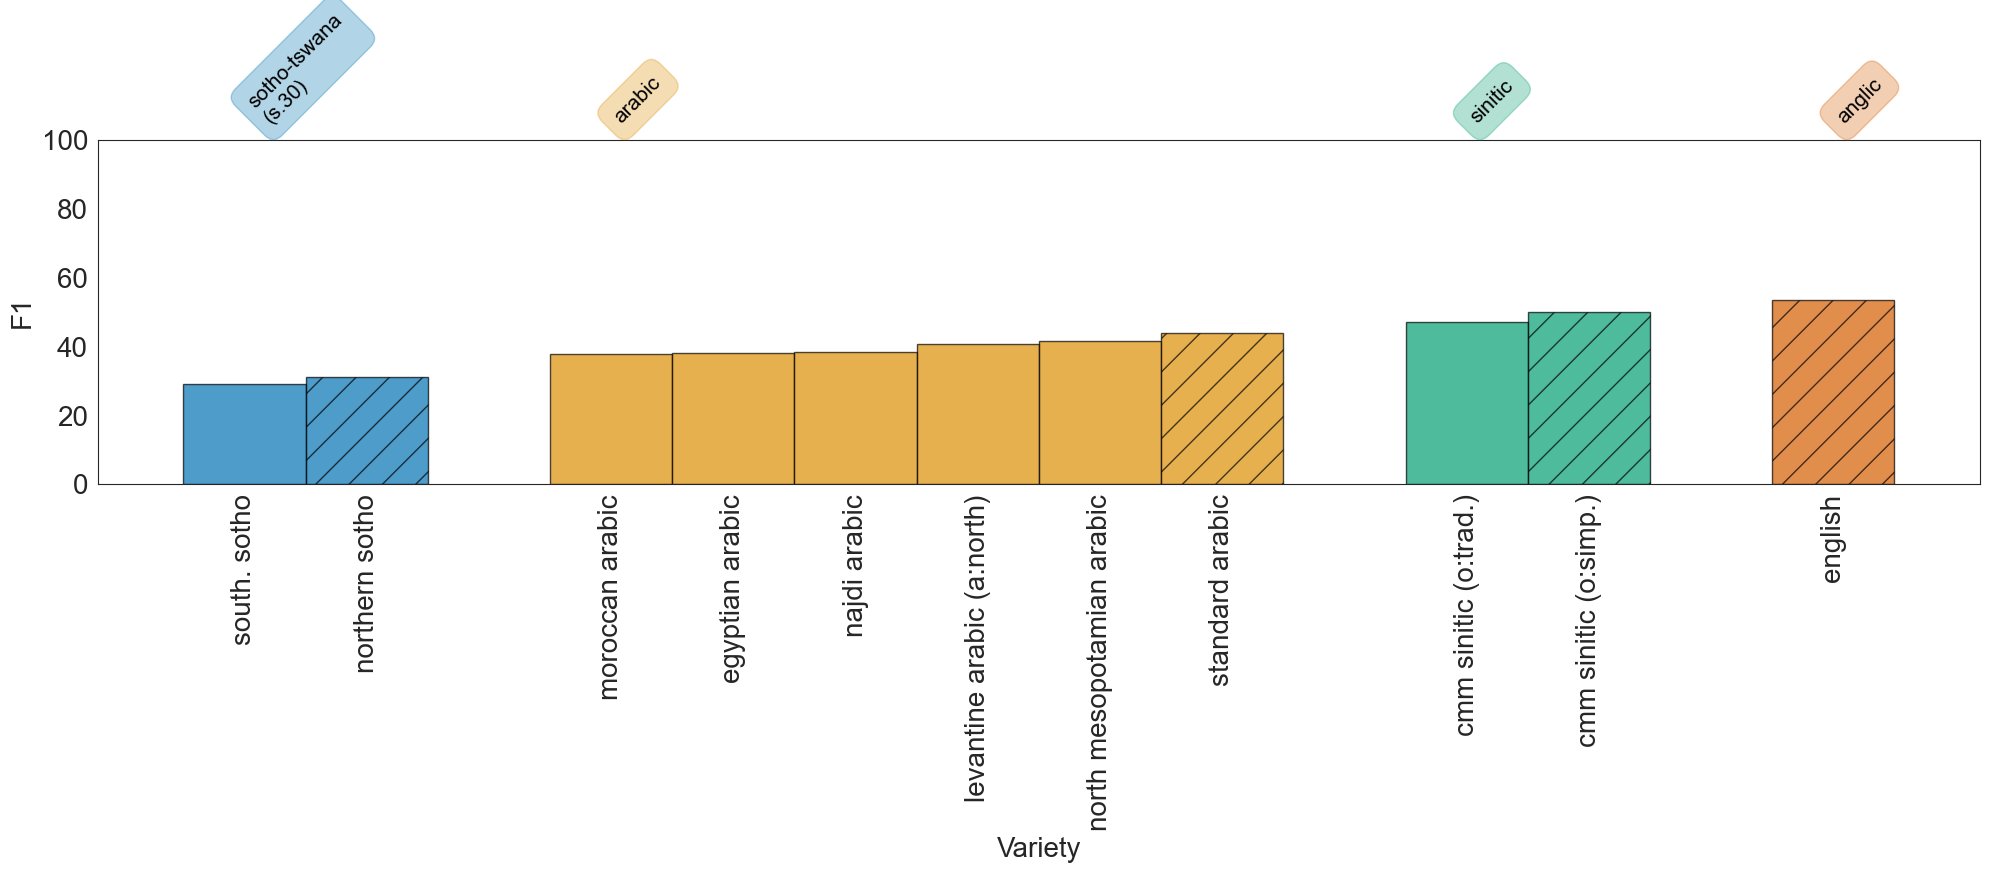

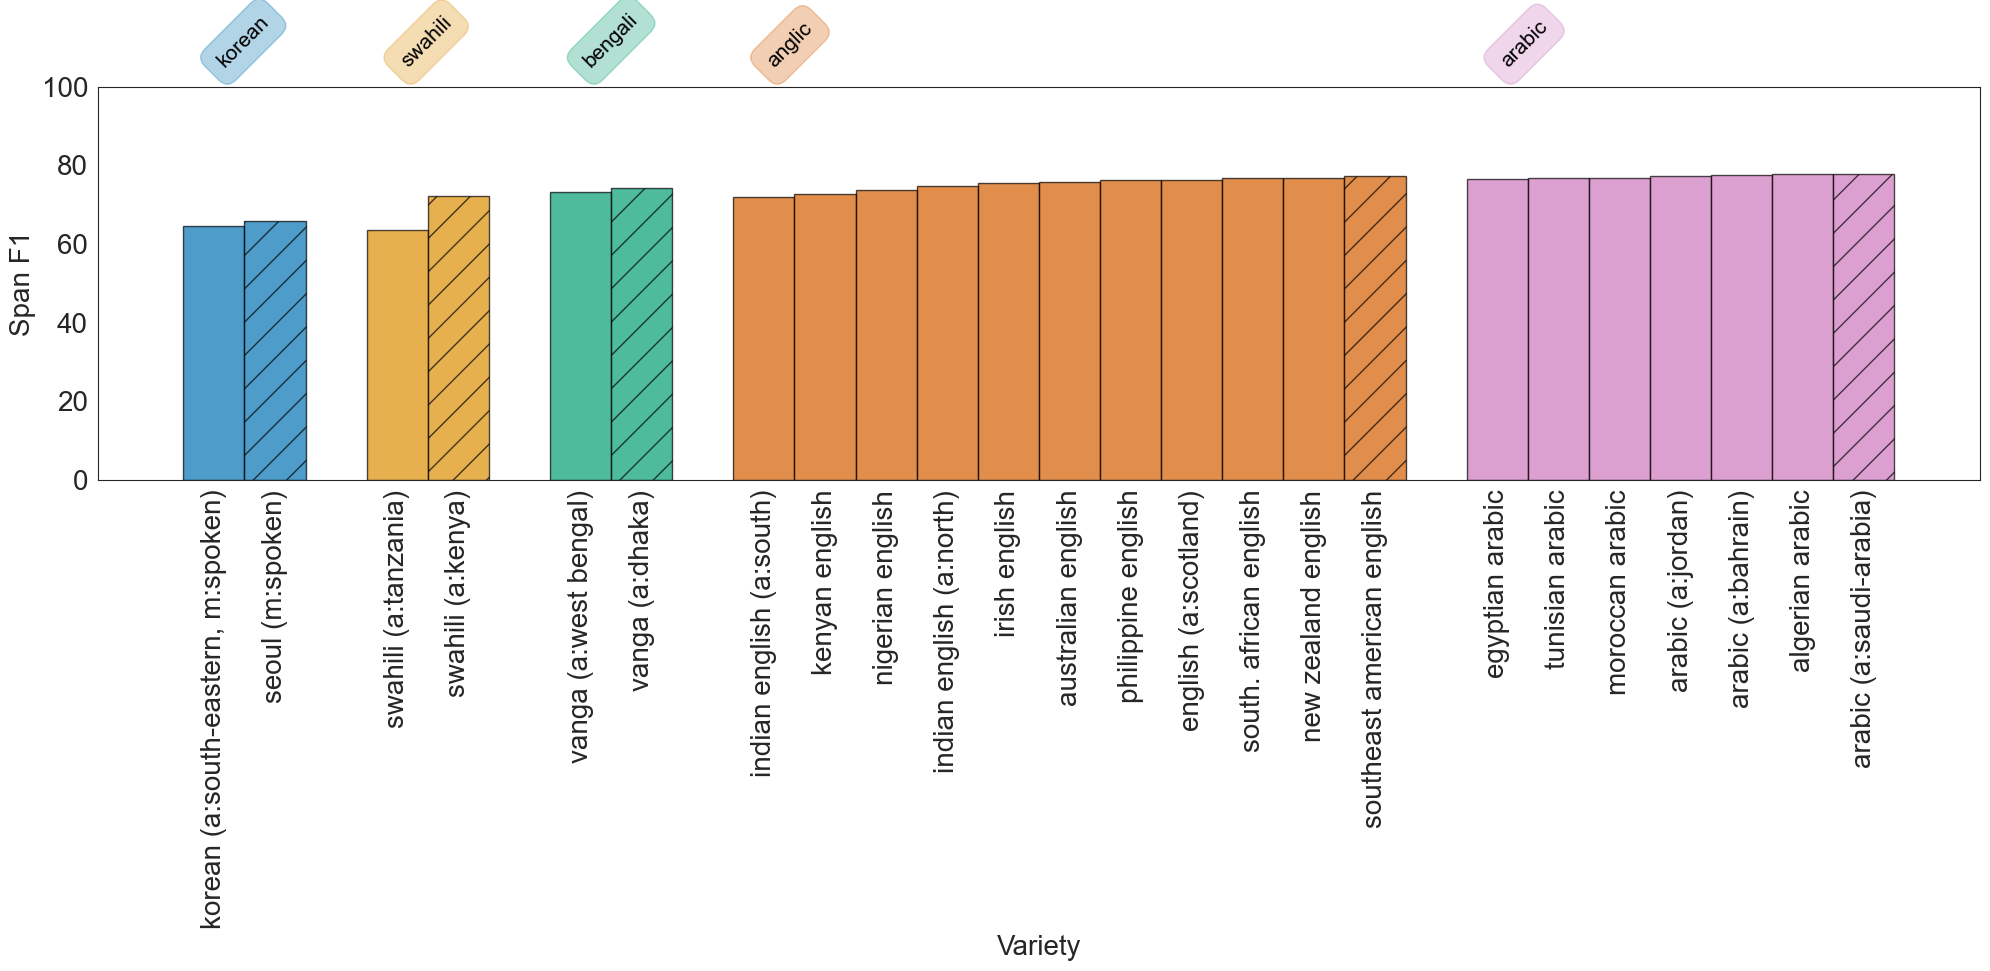

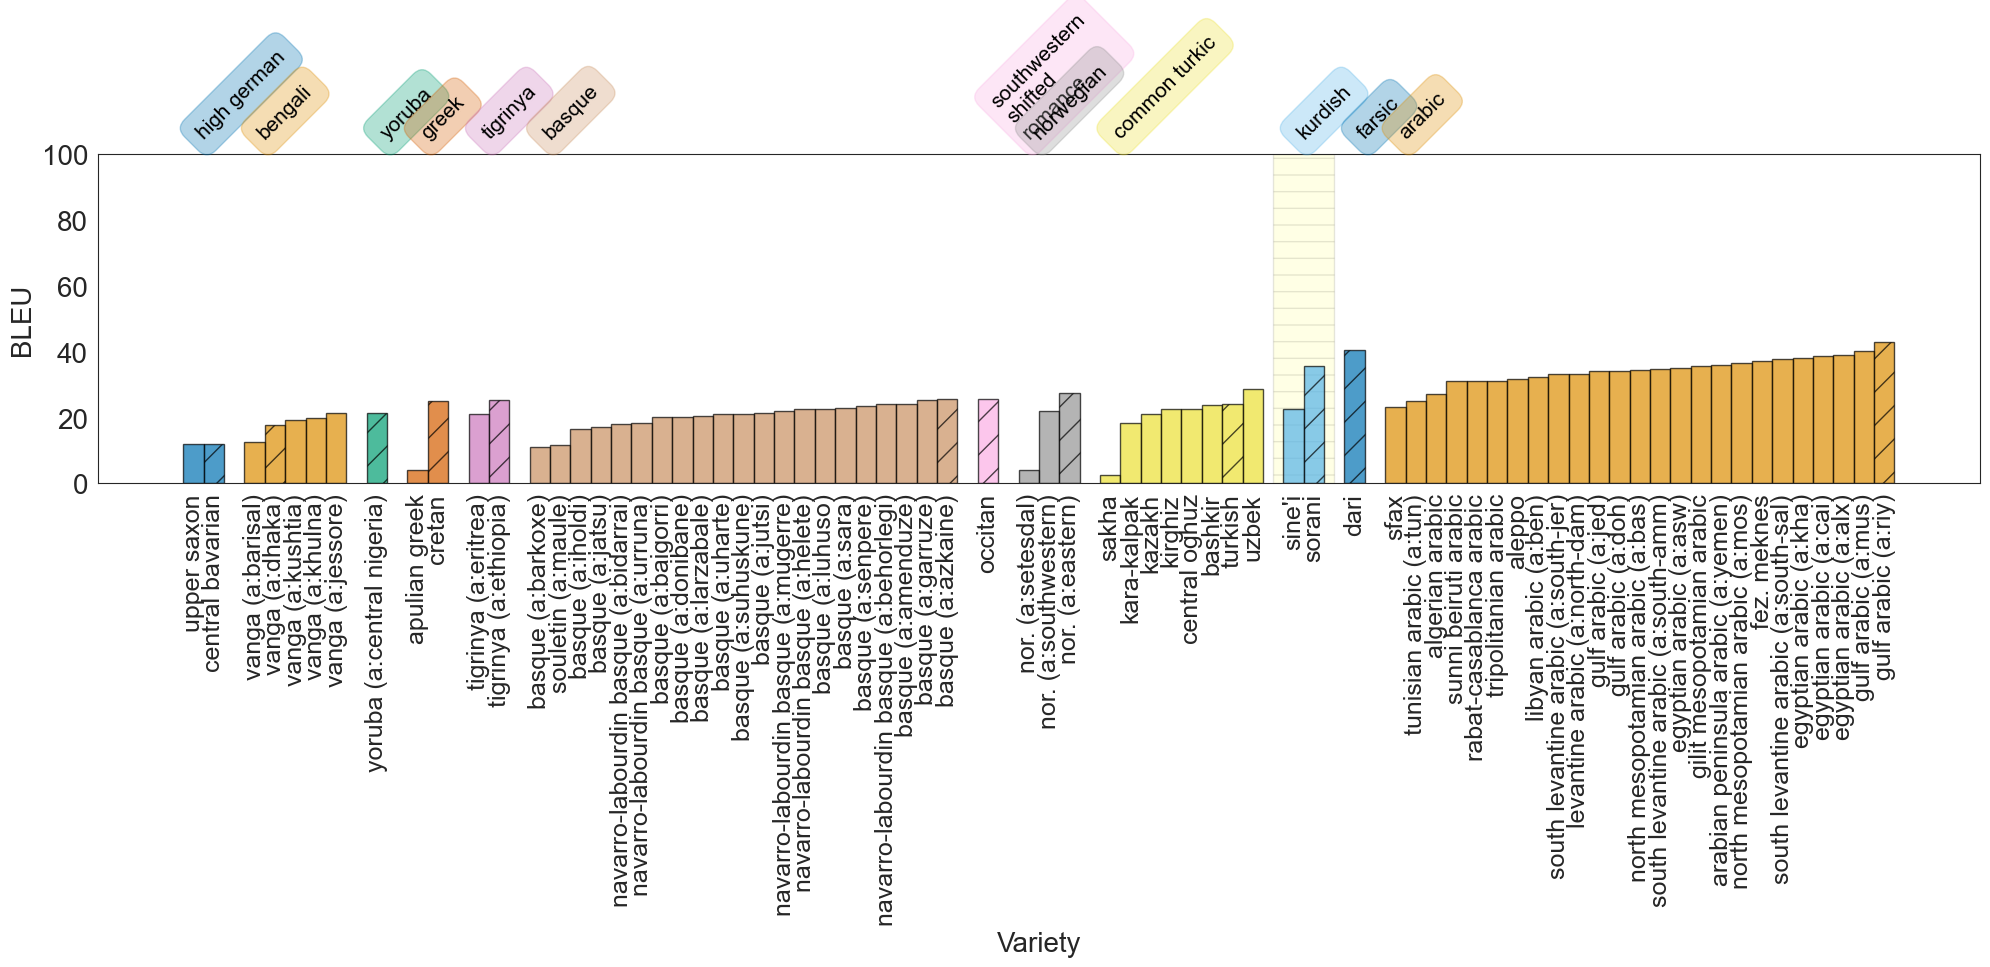

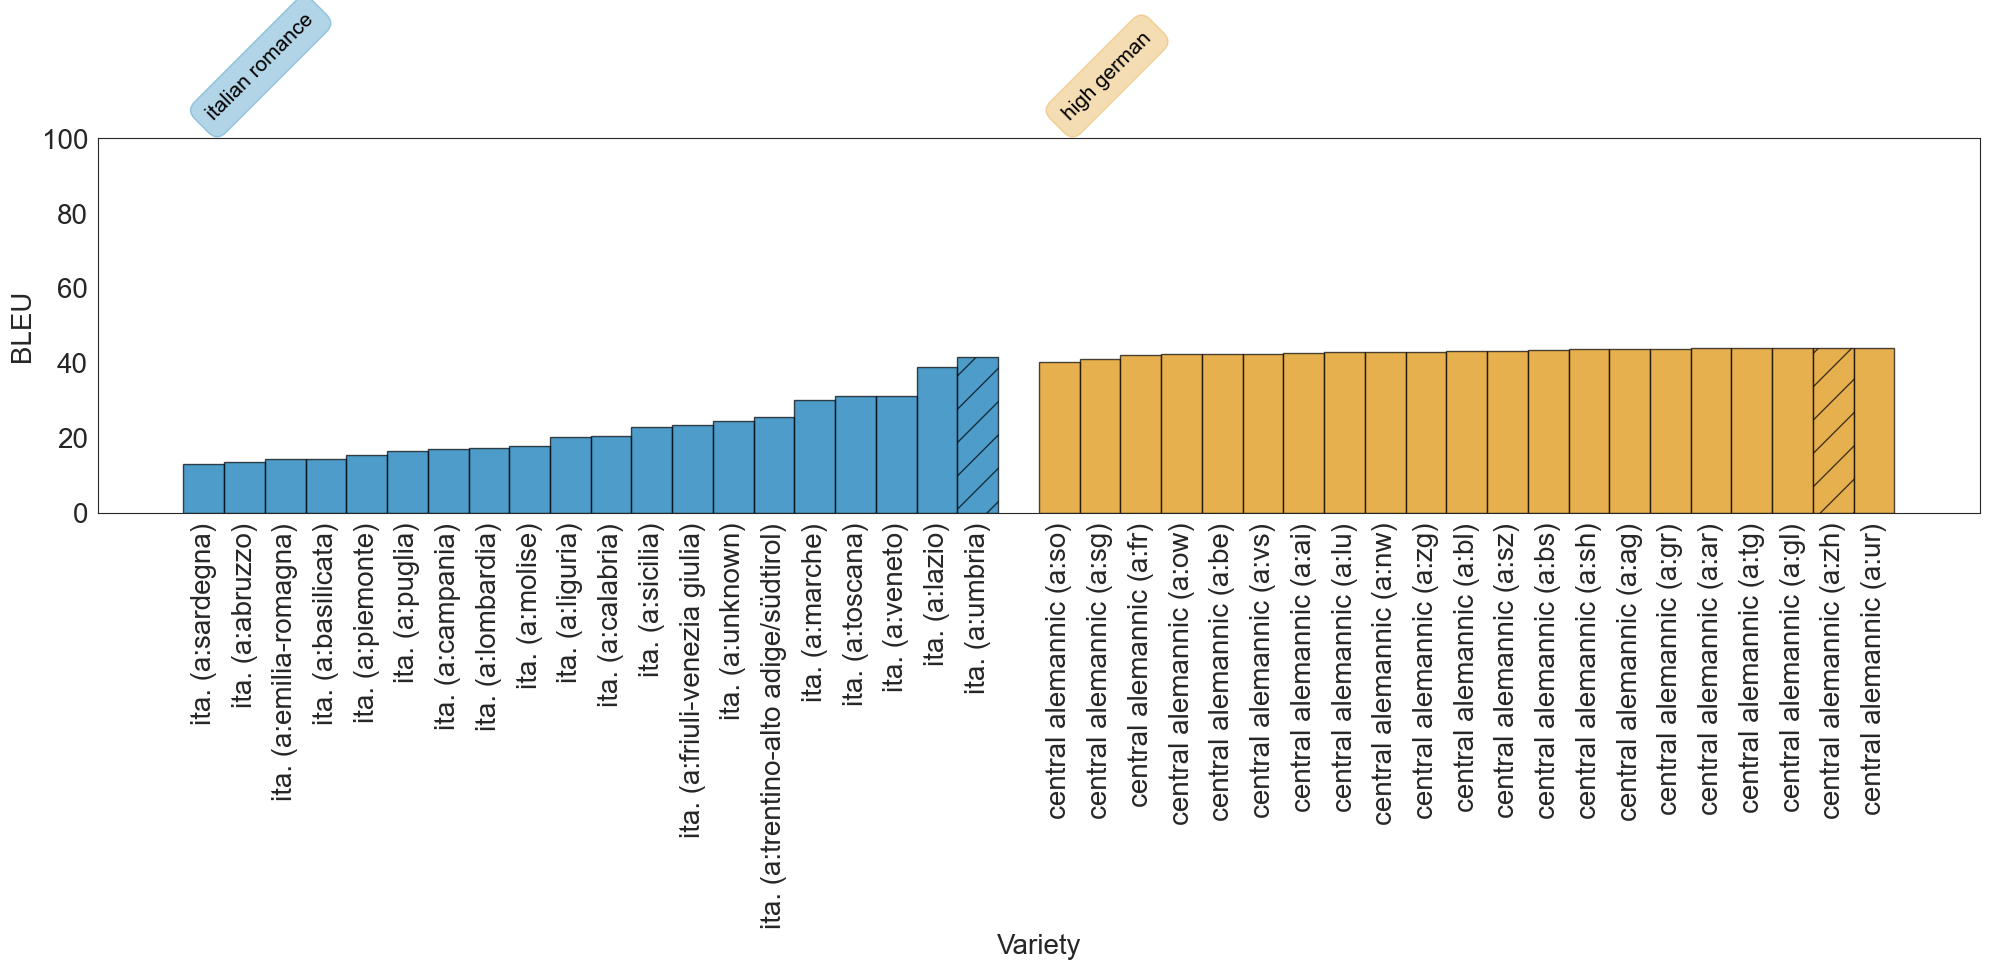

In [1231]:
f = open('../metadata/plot_attributes_max.json')
plot_data = json.load(f)

f = open('../metadata/standard_variety.json')
standard_variety = json.load(f)

for task in tasks:
    print(task)
    df=all_results[task].copy()
    df.reset_index(inplace=True)
#     df=drop_single_cluster(df)
    df=df.replace('-','0')
    score_cols=result_cols[task]
    df[score_cols]=df[score_cols].astype(float)
    df['max_score']=df[score_cols].max(axis=1)
    df=df.sort_values(by=['max_score'],ascending=True)
    
#     config['filename']=config['filename'].replace('[taskname]',task)
    config=plot_data[task]
    config['stdv']=standard_variety[task]
    plot_max(df,config)

In [146]:
# score_column='max_score'
# gap_bar=2
# ylim_val=100

# colors=list(sns.color_palette("colorblind", 30).as_hex())
# fig, axes = plt.subplots(1,1, figsize = (20,7))
# ax=axes
# ax.set_ylim(0,ylim_val)
# count=0
# index_count=0
# all_index=[]
# labels=[]
# groups=list(df.groupby('lang-group').max().sort_values(by=['max_score'],ascending=True).index)
# for g in groups:
#     grp=df[df['lang-group']==g]
#     grp=grp.sort_values(by=['max_score'],ascending=True)
#     grp.reset_index(inplace=True)
#     index=list(range(index_count,len(grp.index)+index_count,1))
#     hatch=['']*len(index)
#     hatch[-1]='/'
#     ax.bar(index, grp[score_column].values,width=1,
#                    edgecolor='black',color=colors[count],label=g, alpha=.7, hatch=hatch)
#     text=g
#     text_pos=index[0]
#     ax.text(text_pos, ylim_val+5 ,text, rotation=45,color='black', fontsize=15,
#                 bbox=dict(facecolor=colors[count],linewidth=1,
#                           alpha=0.3, boxstyle="round,pad=.6",edgecolor=colors[count]))
#     labels.extend(grp['variety'])
#     all_index.extend(index)
#     index_count=index[-1]+gap_bar
#     count+=1
    
# plt.draw()

# ax.set_xticks(all_index)
# ax.set_xticklabels( labels=labels,rotation=90,fontsize=20)

# yticks=[xx.get_text() for xx in ax.get_yticklabels()]
# ax.set_yticks(ax.get_yticks())
# ax.set_yticklabels(labels=yticks,fontsize=20)

# plt.tight_layout()
# plt.savefig('../figures/dep-score.pdf')

In [147]:
# config={
#     "ylabel":"Linguistic\nUtility",
#     "xlabel":"Variety",
#     "ylabel_font":15,
#     "xlabel_font":15,
#     "ylim_val":100,
#     "cluster_font":15,
#     "xtick_fontsize":20,
#     "ytick_fontsize":20,
#     "gap_bar":2,
#     "filename":"../figures/dep-score.pdf",
#     "score_column":"max_score",
#     "not_mbert":not_mbert,
    
#     "fig_x":20,
#     "fig_y":7
# }
# plot_max(df,config)

In [148]:
# with open('../metadata/standard_variety.json', 'w',encoding='utf-8') as fp:
#     json.dump(group_langs, fp,ensure_ascii=False,sort_keys=True,
#     indent=4)

### All DT Results plot

In [443]:
df=all_dt_results['dep'].copy()
df=df.groupby('lang-group').agg({'base_zero_group':'first','group_zero_group':'first'})
df.reset_index(inplace=True)

dep


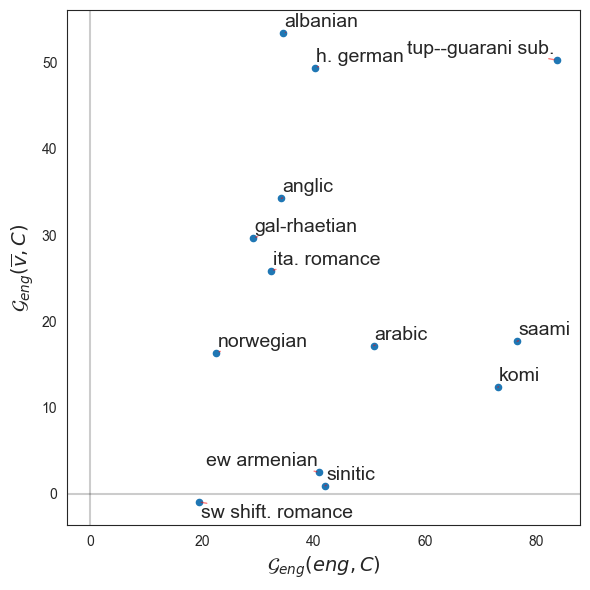

pos


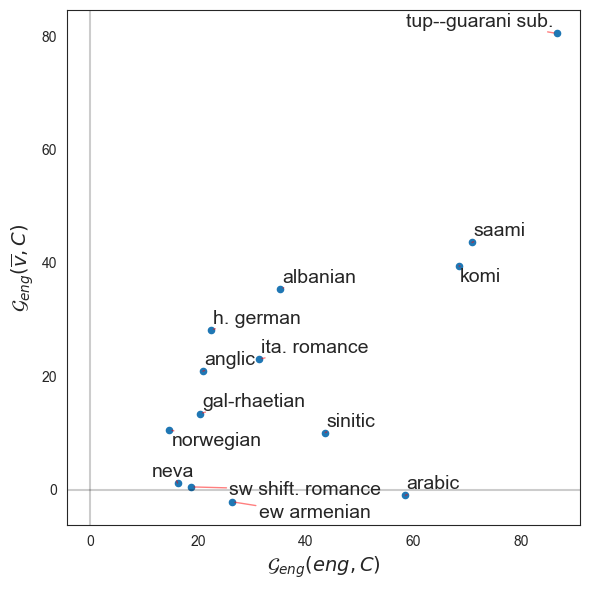

ner


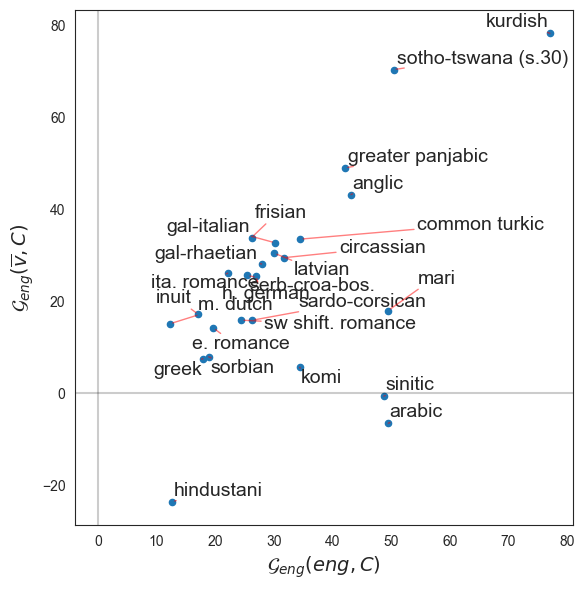

topic


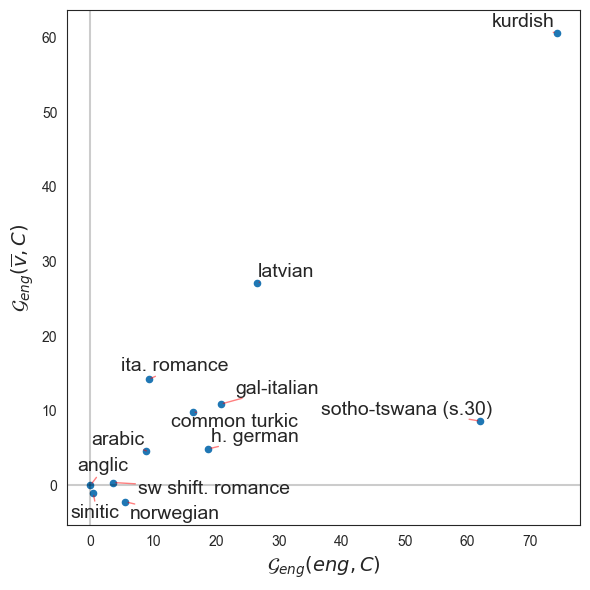

nli


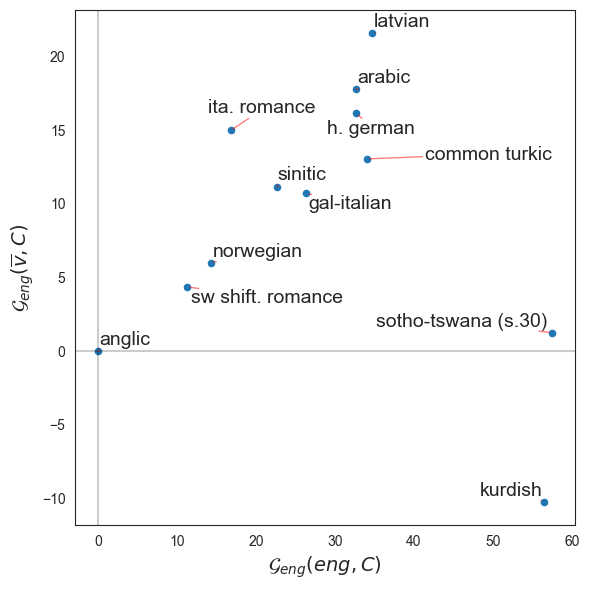

sdqa-test


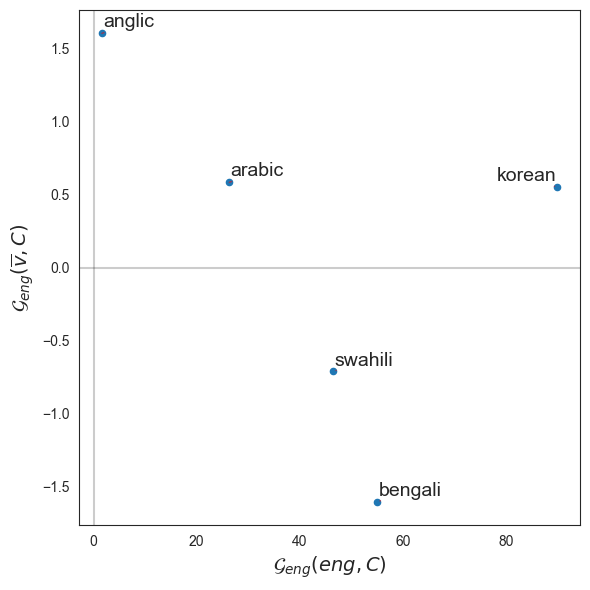

In [462]:
config={
    'fig_x':6,
    'fig_y':6,
    
    'xlabel':'$\mathcal{G}_{eng}(eng,C)$',
    'ylabel':'$\mathcal{G}_{eng}(\overline{v},C)$',
    'ylabel_font':14,
    'xlabel_font':14,
    'ylim_val':100,
    'xlim_val':100,
    'filename':'../figures/dep-gap.pdf'
}

shorten_lg={
    'eastern-western armenian':'ew armenian',
    'gallo-italian':'gal-italian',
    'gallo-rhaetian':'gal-rhaetian',
    'italian romance':'ita. romance',
    'serbian-croatian-bosnian':'serb-croa-bos.',
    'southwestern shifted romance':'sw shift. romance',
    'tupi-guarani subgroup i.a':'tup--guarani sub.',
    'high german':'h. german',
    'modern dutch':'m. dutch',
    'eastern romance':'e. romance'
}

tasks=['dep', 'pos', 'ner', 'topic','nli','sdqa-test']
# tasks=['ner']
all_l_g=[]
for task in tasks:
    print(task)
    df=all_dt_results[task].copy()
    df=df.groupby('lang-group').agg({'base_zero_group':'first','group_zero_group':'first'})
    df.reset_index(inplace=True)
    df=df.replace({"lang-group": shorten_lg})
    config['filename']='../figures/{}-gap.pdf'.format(task)
    all_l_g.extend(df['lang-group'].tolist())
    plot_gap(df,config)

In [450]:
set(all_l_g)

{'albanian',
 'anglic',
 'arabic',
 'bengali',
 'circassian',
 'common turkic',
 'eastern romance',
 'eastern-western armenian',
 'frisian',
 'gallo-italian',
 'gallo-rhaetian',
 'greater panjabic',
 'greek',
 'high german',
 'hindustani',
 'inuit',
 'italian romance',
 'komi',
 'korean',
 'kurdish',
 'latvian',
 'mari',
 'modern dutch',
 'neva',
 'norwegian',
 'saami',
 'sardo-corsican',
 'serbian-croatian-bosnian',
 'sinitic',
 'sorbian',
 'sotho-tswana (s.30)',
 'southwestern shifted romance',
 'swahili',
 'tupi-guarani subgroup i.a'}

In [151]:
all_dt_results.keys()

dict_keys(['dep', 'pos', 'ner', 'sdqa-test', 'topic', 'di', 'nli', 'rcmc', 'mt-dialect', 'mt-region'])

#### All max result tables

In [1126]:
tasks=['dep', 'pos', 'ner', 'nli', 'topic','di', 'sc','rcmc',
        'sdqa-test',  'mt-dialect', 'mt-region']
task_type={
    'dep':'Structured prediction',
    'pos':'Structured prediction',
    'ner':'Structured prediction',
    'sdqa-test':'Qusetion Answering',
    'topic':'Sequence classification',
    'rcmc':'Qusetion Answering',
    'nli':'Sequence classification',
    'topic':'Sequence classification',
    'sc':'Sequence classification',
    'mt-dialect':'Generation',
    'mt-region':'Generation',
    'di':'Sequence classification'
}

In [1131]:
result_cols

{'dep': ['bert_uas_zeroshot',
  'xlmr_uas_zeroshot',
  'bert_uas_finetuned',
  'xlmr_uas_finetuned'],
 'pos': ['bert_f1_zeroshot',
  'xlmr_f1_zeroshot',
  'bert_f1_tune',
  'xlmr_f1_tune'],
 'ner': ['bert_f1_zeroshot',
  'xlmr_f1_zeroshot',
  'bert_f1_tune',
  'xlmr_f1_tune'],
 'nli': ['bert_f1', 'xlmr_f1'],
 'topic': ['bert_zero', 'xlmr_zero', 'bert_f1', 'xlmr_f1'],
 'rcmc': ['bert-f1', 'xlmr-f1'],
 'sdqa-dev': ['bert_tune_f1', 'xlmr_tune_f1', 'bert_zero_f1', 'xlmr_zero_f1'],
 'sdqa-test': ['bert_tune_f1',
  'xlmr_tune_f1',
  'bert_zero_f1',
  'xlmr_zero_f1',
  'mistral7b'],
 'sc': ['MBERT_Acc', 'XLMR_Acc', 'mistral7b'],
 'mt-dialect': ['NLLB_600m-bleu', 'NLLB_1_3bn-bleu'],
 'mt-region': ['NLLB_600m-bleu', 'NLLB_1_3bn-bleu'],
 'di': ['F1 (mBERT)', 'F1 (XLM-R)'],
 'di-all': ['F1 (mBERT)', 'F1 (XLM-R)']}

In [1129]:
all_results['sdqa-test']

target  count  \
lang-group variety                                                        
anglic     english (a:scotland)                     english--gbr    440   
           southern african english                 english--zaf    440   
           new zealand english                      english--nzl    440   
           australian english                       english--aus    440   
           southeast american english               english--usa    440   
           irish english                            english--irl    440   
           philippine english                       english--phl    440   
           nigerian english                         english--nga    440   
           indian english (a:north)               english--ind_n    440   
           kenyan english                         english--kenya    440   
           indian english (a:south)               english--ind_s    440   
arabic     arabic (a:bahrain)                        arabic--bhr    921   
           arabic (a:jordan)                         arabic--jor    921   
           arabic (a:saudi-arabia)                   arabic--sau    921   
           algerian arabic                           arabic--dza    921   
           tunisian arabic                           arabic--tun    921   
           moroccan arabic                           arabic--mar    921   
           egyptian arabic                           arabic--egy    921   
bengali    vanga (a:west bengal)                    bengali--ind    113   
           vanga (a:dhaka)                        bengali--dhaka    113   
korean     seoul (m:spoken)                         korean--korn    276   
           korean (a:south-eastern, m:spoken)       korean--kors    276   
swahili    swahili (a:tanzania)                swahili--tanzania    472   
           swahili (a:kenya)                      swahili--kenya    472   

                                               bert_tune_f1  xlmr_tune_f1  \
lang-group variety                                                          
anglic     english (a:scotland)                       76.38         70.34   
           southern african english                   76.66         71.18   
           new zealand english                        76.71         71.39   
           australian english                         75.66         70.89   
           southeast american english                 77.26         71.50   
           irish english                              75.52         70.73   
           philippine english                         76.37         70.64   
           nigerian english                           73.61         68.33   
           indian english (a:north)                   74.62         68.03   
           kenyan english                             72.59         66.68   
           indian english (a:south)                   71.93         66.88   
arabic     arabic (a:bahrain)                         77.52         72.11   
           arabic (a:jordan)                          77.35         71.29   
           arabic (a:saudi-arabia)                    77.88         72.11   
           algerian arabic                            77.85         72.34   
           tunisian arabic                            76.72         71.64   
           moroccan arabic                            76.73         71.57   
           egyptian arabic                            76.53         70.75   
bengali    vanga (a:west bengal)                      68.62         73.27   
           vanga (a:dhaka)                            67.37         74.24   
korean     seoul (m:spoken)                           10.15         31.91   
           korean (a:south-eastern, m:spoken)          9.92         31.01   
swahili    swahili (a:tanzania)                       63.54         62.30   
           swahili (a:kenya)                          72.25         70.53   

                                               bert_zero_f1  xlmr_zero_f1  \
lang-group variety         

In [1127]:
f = open('../metadata/plot_attributes_max.json')
plot_data = json.load(f)

f = open('../metadata/standard_variety.json')
standard_variety = json.load(f)

comp_stat=[]
sc_col='max_score'
variety_col='variety'
if task=='mt':
    variety_col='dialect'
for task in tasks:
    df_all=all_results[task].copy()
    df_all.reset_index(inplace=True)
    df_all=df_all.replace('-','0')
    score_cols=result_cols[task]
    df_all[score_cols]=df_all[score_cols].astype(float)
    df_all[sc_col]=df_all[score_cols].max(axis=1)
    df_all=df_all.sort_values(by=[sc_col],ascending=True)
    
    clusters=len(df_all.groupby('lang-group'))
    varieties=len(df_all)
    avg=df_all[sc_col].mean().round(1)
    
    lang_v=df_all[df_all[sc_col]==
                          df_all[sc_col].max()].iloc[0]
    best_perf=lang_v['lang-group']+'/'+lang_v[variety_col]
    best_perf_score=round(df_all[sc_col].max(),1)

    lang_v=df_all[df_all[sc_col]==
                          df_all[sc_col].min()].iloc[0]
    lowest_perf=lang_v['lang-group']+'/'+lang_v[variety_col]
    lowest_perf_score=round(df_all[sc_col].min(),1)
    
    comp_stat.append([task_type[task],task,clusters,varieties,avg,best_perf,best_perf_score,
                      lowest_perf,lowest_perf_score])
    
#     config['filename']=config['filename'].replace('[taskname]',task)
#     config=plot_data[task]
#     config['stdv']=standard_variety[task]

comp_stat_df=pd.DataFrame.from_records(comp_stat,columns=['Category','Task','C', 'V','Score(Avg.)',
                                                          'Max (V)','Max V score',
                                                         'Min (V)','Min V score'])
comp_stat_df=comp_stat_df.set_index(['Category','Task'])    

print('\n\n\n')
caption_text="""Task specific result summary for Maximum Attainable Linguistic Utility."""
print(comp_stat_df.to_latex(multicolumn=True,
                         multirow=True,
                         escape=True,
                        label='tab:comp_stat_main',
                        caption=caption_text))





\begin{table}
\centering
\caption{Task specific result summary for Maximum Attainable Linguistic Utility.}
\label{tab:comp_stat_main}
\begin{tabular}{llrrrlrlr}
\toprule
           &           &   C &   V &  Score(Avg.) &                                                  Max (V) &  Max V score &                                              Min (V) &  Min V score \\
Category & Task &     &     &              &                                                          &              &                                                      &              \\
\midrule
\multirow{3}{*}{Structured prediction} & dep &  16 &  40 &         64.3 &        southwestern shifted romance/brazilian portuguese &         94.4 &    tupi-guarani subgroup i.a/mbyá guaraní (a:brazil) &          9.0 \\
           & pos &  17 &  51 &         72.1 &                   norwegian/norwegian bokmål (m:written) &         98.7 &    tupi-guarani subgroup i.a/mbyá guaraní (a:brazil) &          1.9 \\
           & ner &  

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2955749122.py:49: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(comp_stat_df.to_latex(multicolumn=True,


#### in-context vs mbert

In [154]:
df=all_results['sc'].copy()
df=df[df['mistral7b']!=0]

In [155]:
df.mean()

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


MBERT_Acc    81.32000
MBERT_F1     70.69875
XLMR_Acc     82.74750
XLMR_F1      72.00250
mistral7b    68.46250
dtype: float64

In [156]:
all_results['sdqa-test'].mean()

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/788970517.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_results['sdqa-test'].mean()


count           542.041667
bert_tune_f1     69.155833
xlmr_tune_f1     67.152500
bert_zero_f1     53.892083
xlmr_zero_f1     51.917917
mistral7b        62.186250
dtype: float64

#### average results

In [157]:
tasks=['dep', 'pos', 'ner', 'nli', 'topic', 'rcmc',
        'sdqa-test', 'sc', 'di']

result_col_zero={
    'dep':['bert_uas_zeroshot', 'xlmr_uas_zeroshot'],
    'pos':['bert_f1_zeroshot', 'xlmr_f1_zeroshot'],
    'ner':['bert_f1_zeroshot',
       'xlmr_f1_zeroshot'],
    'nli':['bert_f1', 'xlmr_f1'],
    'topic':['bert_zero', 'xlmr_zero'],
    'rcmc':[],
    'sdqa-test':['bert_zero_f1',
       'xlmr_zero_f1'],
    'sc':[],
    'di':[],
    'di-all':[]
}

result_col_tune={
    'dep':['bert_uas_finetuned', 'xlmr_uas_finetuned'],
    'pos':['bert_f1_tune', 'xlmr_f1_tune'],
    'ner':[ 'bert_f1_tune', 'xlmr_f1_tune'],
    'nli':[],
    'topic':[ 'bert_f1', 'xlmr_f1'],
    'rcmc':['bert-f1', 'xlmr-f1'],
    'sdqa-test':['bert_tune_f1', 'xlmr_tune_f1'],
    'sc':['MBERT_Acc',  'XLMR_Acc'],
    'di':['F1 (mBERT)', 'F1 (XLM-R)'],
    'di-all':['F1 (mBERT)', 'F1 (XLM-R)']
}



In [158]:
# tasks=['dep']
all_avg={}
for task in tasks:
    all_avg[task]={}
    df=all_results[task].copy()
    df.reset_index(inplace=True)
    if len(result_col_tune[task])!=0:
        df=df.loc[df[result_col_tune[task][0]]!='-']
        tune_result=df[result_col_tune[task]].mean().to_dict()
        for i in tune_result:
            if 'bert' in i.lower():
                all_avg[task]['bert-tune']=tune_result[i]
            elif 'xlm' in i.lower():
                all_avg[task]['xlmr-tune']=tune_result[i]
    if len(result_col_zero[task])!=0:
        zero_result=df[result_col_zero[task]].mean().to_dict()
        for i in zero_result:
            if 'bert' in i.lower():
                all_avg[task]['bert-zero']=zero_result[i]
            elif 'xlm' in i.lower():
                all_avg[task]['xlmr-zero']=zero_result[i]
    print(task, all_avg[task])

dep {'bert-tune': 76.23619047619047, 'xlmr-tune': 64.32142857142857, 'bert-zero': 61.5642857142857, 'xlmr-zero': 61.25714285714286}
pos {'bert-tune': 89.82230868279623, 'xlmr-tune': 89.10090105730548, 'bert-zero': 69.4588356806549, 'xlmr-zero': 69.68477612254145}
ner {'bert-tune': 65.86150124398016, 'xlmr-tune': 61.52347916937297, 'bert-zero': 59.80536210895185, 'xlmr-zero': 58.166145861522075}
nli {'bert-zero': 57.74667936237515, 'xlmr-zero': 62.487086209976276}
topic {'bert-tune': 73.75945526507154, 'xlmr-tune': 69.10196700524979, 'bert-zero': 73.03817791871764, 'xlmr-zero': 71.5876143144198}
rcmc {'bert-tune': 39.38017665328163, 'xlmr-tune': 40.32791514897556}
sdqa-test {'bert-tune': 69.15583333333333, 'xlmr-tune': 67.1525, 'bert-zero': 53.89208333333334, 'xlmr-zero': 51.91791666666666}
sc {'bert-tune': 78.77111111111111, 'xlmr-tune': 80.09777777777778}
di {'bert-tune': 65.83574416829835, 'xlmr-tune': 59.25417361774369}


In [159]:
df=pd.DataFrame.from_dict(all_avg).T.round(1)

In [160]:
df=df[['bert-zero', 'xlmr-zero','bert-tune', 'xlmr-tune']]

In [161]:
print(df.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &  bert-zero &  xlmr-zero &  bert-tune &  xlmr-tune \\
\midrule
dep       &       61.6 &       61.3 &       76.2 &       64.3 \\
pos       &       69.5 &       69.7 &       89.8 &       89.1 \\
ner       &       59.8 &       58.2 &       65.9 &       61.5 \\
nli       &       57.7 &       62.5 &        NaN &        NaN \\
topic     &       73.0 &       71.6 &       73.8 &       69.1 \\
rcmc      &        NaN &        NaN &       39.4 &       40.3 \\
sdqa-test &       53.9 &       51.9 &       69.2 &       67.2 \\
sc        &        NaN &        NaN &       78.8 &       80.1 \\
di        &        NaN &        NaN &       65.8 &       59.3 \\
\bottomrule
\end{tabular}



/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/2350534188.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df.to_latex())


### standard variety table

In [1232]:
f = open('../metadata/standard_variety.json')
standard_variety = json.load(f)

In [1233]:
task_form={
    'dep':'DEP. Parsing',
    'pos':'POS Tagging',
    'ner':'NER',
    'sdqa-test':'EQA',
    'rcmc':'MRC',
    'topic':'TC',
    'sc':'SC',
    'mt-dialect':'MT-Dialect',
    'mt-region':'MT-Region',
    'di':'DId',
    'nli':'NLI'
}

at_stv=[]

for k in task_form:
    for cl,v in standard_variety[k].items():
#         print(task_form[k],cl,v)
        at_stv.append([task_form[k],cl,v])

at_stv_df=pd.DataFrame.from_records(at_stv,columns=['Task','\Cluster{} Name','Standard \dialect/\Cluster{} Head'])
at_stv_df=at_stv_df.set_index(['Task','\Cluster{} Name'])

In [1234]:
at_stv_df

Standard \dialect/\Cluster{} Head
Task         \Cluster{} Name                                                             
DEP. Parsing albanian                                                            albanian
             arabic                                                       standard arabic
             eastern-western armenian                                    western armenian
             sinitic                       classical-middle-modern sinitic (o:simplified)
             anglic                                                               english
...                                                                                   ...
NLI          latvian                                                              latvian
             norwegian                                       norwegian bokmål (m:written)
             sinitic                       classical-middle-modern sinitic (o:simplified)
             sotho-tswana (s.30)                                           northern sotho
             southwestern shifted romance                                         spanish

[104 rows x 1 columns]

In [1235]:
print(at_stv_df.to_latex(longtable=True,caption='Language \clusters{} and their \cluster{} representatives',
                  label='stdv',escape=True, multirow=True, multicolumn=True))

\begin{longtable}{lll}
\caption{Language \clusters{} and their \cluster{} representatives}
\label{stdv}\\
\toprule
    &                              &               Standard \textbackslash dialect/\textbackslash Cluster\{\} Head \\
Task & \textbackslash Cluster\{\} Name &                                                 \\
\midrule
\endfirsthead
\caption[]{Language \clusters{} and their \cluster{} representatives} \\
\toprule
    &                              &               Standard \textbackslash dialect/\textbackslash Cluster\{\} Head \\
Task & \textbackslash Cluster\{\} Name &                                                 \\
\midrule
\endhead
\midrule
\multicolumn{3}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
\multirow{13}{*}{DEP. Parsing} & albanian &                                        albanian \\
    & arabic &                                 standard arabic \\
    & eastern-western armenian &                                western armenian

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/2845003610.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(at_stv_df.to_latex(longtable=True,caption='Language \clusters{} and their \cluster{} representatives',


#### population weighted average

In [166]:
score_col

'bert-f1'

In [1236]:
tasks=['dep', 'pos', 'ner', 'nli', 'topic','di', 'sc','rcmc',
        'sdqa-test']

population_dict=dict(zip(lang_data['language group']+'/'+lang_data['variety name'],lang_data['# of speakers']))

sc_col='max_score'
for task in tasks:
#     print(task)
    caption_text='''Language \clusters{} with their \lingu{}, demographic utility 
    , \dialect{} with minimum \lingu{} and standard deviation.'''
    df_all=all_results[task].copy()
    df_all.reset_index(inplace=True)
    df_all=df_all.replace('-','0')
    score_cols=result_cols[task]
    df_all[score_cols]=df_all[score_cols].astype(float)
    df_all[sc_col]=df_all[score_cols].max(axis=1)
    df_all=df_all.sort_values(by=[sc_col],ascending=True)
    
    df=df_all.copy()
    df['db-code']=df['lang-group']+'/'+df['variety']
    df['pop']=df.apply(lambda x:population_dict[x['db-code']] if x['db-code'] in 
                                population_dict else '-',axis=1)
    df['pop']=df.apply(lambda x: int(x['pop']) if x['pop'].isdigit() else 0,axis=1)
    pop_avg=df.groupby('lang-group').apply(population_weighted,score_col=sc_col)
    score_avg=df.groupby('lang-group').apply(get_score_avg,score_col=sc_col)
    score_min=df.groupby('lang-group').apply(get_score_min)
    std_val=df.groupby('lang-group').apply(get_stdv)
    
    concat_df = pd.concat([score_avg, pop_avg,score_min,std_val],axis=1).reset_index()
    concat_df.columns=['\clusters{}','\lingu{}','demographic utility','\dialect{} (minimum ling. u.)','standard deviation']
    
    all_summary[task]=concat_df.fillna('-')
        
    print(all_summary[task].to_latex(index=False,multicolumn=True,
                     multirow=True,
                     escape=False,
                    label='tab:summery-{}'.format(task_form[task]),
                    caption=caption_text+' task: {}'.format(task_form[task])))

\begin{table}
\centering
\caption{Language \clusters{} with their \lingu{}, demographic utility 
    , \dialect{} with minimum \lingu{} and standard deviation. task: DEP. Parsing}
\label{tab:summery-DEP. Parsing}
\begin{tabular}{lrlll}
\toprule
                 \clusters{} &  \lingu{} & demographic utility &                \dialect{} (minimum ling. u.) & standard deviation \\
\midrule
                    albanian &      63.3 &                69.1 &                        (gheg albanian, 43.5) &               28.0 \\
                      anglic &      75.5 &                90.7 &  (african american vernacular english, 52.5) &               20.4 \\
                      arabic &      64.4 &                83.3 &               (south levantine arabic, 49.9) &               21.0 \\
    eastern-western armenian &      88.2 &                87.5 &                     (eastern armenian, 87.0) &                1.6 \\
               gallo-italian &      50.2 &                50.2 &            

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/1536089080.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_summary[task].to_latex(index=False,multicolumn=True,
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/1536089080.py:34: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_summary[task].to_latex(index=False,multicolumn=True,
/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_99965/1536089080.py:34: FutureWarni

In [168]:
len(all_results['ner'].copy())
df.reset_index(inplace=True)
df.groupby('lang-group')['variety'].count()

lang-group
arabic      7
bengali     2
english    11
korean      2
swahili     2
Name: variety, dtype: int64

In [169]:
df[df['lang-group']=='french']

Empty DataFrame
Columns: [index, lang-group, variety, target, count, bert_tune_f1, xlmr_tune_f1, bert_zero_f1, xlmr_zero_f1, mistral7b, max_score, db-code, pop]
Index: []

### print results

In [170]:
combined=all_results['pos'].copy().replace('-',0).round(2).replace(0,'---')
text="""Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning."""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:dep_full'))

\begin{table}
\centering
\caption{Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning.}
\label{tab:dep_full}
\begin{tabular}{llllrrll}
\toprule
     &       &                           tgt-code & dataset &  bert\_f1\_zeroshot &  xlmr\_f1\_zeroshot & bert\_f1\_tune & xlmr\_f1\_tune \\
lang-group & variety &                                    &         &                   &                   &              &              \\
\midrule
\multirow{2}{*}{albanian} & albanian &                    UD\_Albanian-TSA &      ud &             75.80 &             84.41 &          --- &          --- \\
     & gheg &                        UD\_Gheg-GPS &      ud &             48.96 &             55.84 &          --- &          --- \\
\cline{1-8}
\multiro

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/1781208628.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


In [171]:
combined=all_results['pos'].copy().replace('-',0).round(2).replace(0,'---')
text="""Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning."""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:dep_full'))

\begin{table}
\centering
\caption{Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning.}
\label{tab:dep_full}
\begin{tabular}{llllrrll}
\toprule
     &       &                           tgt-code & dataset &  bert\_f1\_zeroshot &  xlmr\_f1\_zeroshot & bert\_f1\_tune & xlmr\_f1\_tune \\
lang-group & variety &                                    &         &                   &                   &              &              \\
\midrule
\multirow{2}{*}{albanian} & albanian &                    UD\_Albanian-TSA &      ud &             75.80 &             84.41 &          --- &          --- \\
     & gheg &                        UD\_Gheg-GPS &      ud &             48.96 &             55.84 &          --- &          --- \\
\cline{1-8}
\multiro

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/1781208628.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


In [172]:
combined=all_results['ner'].copy().replace('-',0).round(2).replace(0,'---')
text="""Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning."""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,longtable=True,
                  label='tab:dep_full'))

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/3874981494.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,longtable=True,


\begin{longtable}{llllllllll}
\caption{Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for in-language finetuning.}
\label{tab:dep_full}\\
\toprule
        &               &      tgt-code &       src &        dataset & support & bert\_f1\_zeroshot & xlmr\_f1\_zeroshot & bert\_f1\_tune & xlmr\_f1\_tune \\
lang-group & variety &               &           &                &         &                  &                  &              &              \\
\midrule
\endfirsthead
\caption[]{Dependency parsing evaluation report comprising zeroshot score and in-language finetuning. We report UAS as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English. If training data is not available, we skip those 
languages (mentioned as '-') for

In [173]:
combined=all_results['topic'].copy()
text="""Topic classification evaluation using SIB-200 language data with dialectal presence. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use in-group training for supervised finetuning"""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                   float_format="{:.2f}".format,label='tab:topic'))

\begin{table}
\centering
\caption{Topic classification evaluation using SIB-200 language data with dialectal presence. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use in-group training for supervised finetuning}
\label{tab:topic}
\begin{tabular}{llllrrrr}
\toprule
        &         &    target &       src &  bert\_zero &  xlmr\_zero &  bert\_f1 &  xlmr\_f1 \\
lang-group & variety &           &           &            &            &          &          \\
\midrule
\multirow{10}{*}{arabic} & modern standard &  arb\_Arab &  arb\_Arab &      85.25 &      83.96 &    86.71 &    82.27 \\
        & ta’izzi-adeni &  acq\_Arab &  arb\_Arab &      84.96 &      82.05 &    86.44 &    81.98 \\
        & najdi &  ars\_Arab &  arb\_Arab &      84.80 &      84.39 &    87.41 &    83.33 \\
        & mesopotamian &  acm\_Arab &  arb\_Arab &      82.97 &      80.95 &    84.77 &    80.36 \\
        & levantine/south &  ajp\_Arab 

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/3799400871.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


In [174]:
combined=all_results['nli'].copy()[['tgt', 'src',  'bert_acc', 'xlmr_acc', 'bert_f1', 'xlmr_f1']].round(2)
text="""Natural language inference (NLI) evaluation report using zeroshot cross-lingual transfer from Standard English. We report F1 as evaluation score. 
NLI uses F1 as evaluation matric. We prepare a translate-train dataset to perform this evaluation."""
print(combined.to_latex(multirow=True, multicolumn=True,caption=text,label='tab:nli'))

\begin{table}
\centering
\caption{Natural language inference (NLI) evaluation report using zeroshot cross-lingual transfer from Standard English. We report F1 as evaluation score. 
NLI uses F1 as evaluation matric. We prepare a translate-train dataset to perform this evaluation.}
\label{tab:nli}
\begin{tabular}{llllrrrr}
\toprule
        &          &       tgt &       src &  bert\_acc &  xlmr\_acc &  bert\_f1 &  xlmr\_f1 \\
lang-group & variety &           &           &           &           &          &          \\
\midrule
\multirow{10}{*}{arabic} & modern standard &  arb\_Arab &  eng\_Latn &     65.57 &     73.83 &    65.57 &    73.85 \\
        & najdi &  ars\_Arab &  eng\_Latn &     59.42 &     69.02 &    59.14 &    68.94 \\
        & ta’izzi-adeni &  acq\_Arab &  eng\_Latn &     58.84 &     68.72 &    58.64 &    68.62 \\
        & moroccan &  ary\_Arab &  eng\_Latn &     54.65 &     58.30 &    54.61 &    58.14 \\
        & egyptian &  arz\_Arab &  eng\_Latn &     54.53 &     65.8

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/742459349.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multirow=True, multicolumn=True,caption=text,label='tab:nli'))


In [175]:
combined.columns

Index(['tgt', 'src', 'bert_acc', 'xlmr_acc', 'bert_f1', 'xlmr_f1'], dtype='object')

In [176]:
combined=all_results['sdqa-dev'].copy()
text="""Extractive dialectal question answering evaluation on SD-QA development set. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use combined training set for supervised finetuning"""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:sdqa_dev'))

\begin{table}
\centering
\caption{Extractive dialectal question answering evaluation on SD-QA development set. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use combined training set for supervised finetuning}
\label{tab:sdqa_dev}
\begin{tabular}{lllrrrrr}
\toprule
        &           &             target &  count &  bert\_tune\_f1 &  xlmr\_tune\_f1 &  bert\_zero\_f1 &  xlmr\_zero\_f1 \\
lang-group & variety &                    &        &               &               &               &               \\
\midrule
\multirow{7}{*}{arabic} & moroccan &        arabic--mar &    324 &         70.94 &         65.14 &         50.94 &         49.56 \\
        & tunisian &        arabic--tun &    324 &         71.36 &         65.31 &         50.86 &         50.01 \\
        & jordanian &        arabic--jor &    324 &         70.60 &         65.77 &         50.81 &         49.56 \\
        & bahraini &        arabic--bhr

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/2007857968.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


In [177]:
combined=all_results['sdqa-test'].copy()
text="""Extractive dialectal question answering evaluation on SD-QA test set. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use combined training set for supervised finetuning"""
print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:sdqa_test'))

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/2422905840.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(combined.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


\begin{table}
\centering
\caption{Extractive dialectal question answering evaluation on SD-QA test set. We report span F1 as evaluation score. 
Zeroshot scores are evaluated using model finetuned on Standerd English whereas, we use combined training set for supervised finetuning}
\label{tab:sdqa_test}
\begin{tabular}{lllrrrrrr}
\toprule
        &        &             target &  count &  bert\_tune\_f1 &  xlmr\_tune\_f1 &  bert\_zero\_f1 &  xlmr\_zero\_f1 &  mistral7b \\
lang-group & variety &                    &        &               &               &               &               &            \\
\midrule
\multirow{7}{*}{arabic} & bahraini &        arabic--bhr &    921 &         77.52 &         72.11 &         53.25 &         53.28 &      55.33 \\
        & jordanian &        arabic--jor &    921 &         77.35 &         71.29 &         52.72 &         53.72 &      54.93 \\
        & saudi arabian &        arabic--sau &    921 &         77.88 &         72.11 &         52.72 &        

In [178]:
all_di=all_results['di'].copy()
all_di['support']=all_di['support'].astype(int)
text="""Dialect Identification evaluation using language cluster specific datasets. We finetune a classificaiton model using either mBERT or XLM-R and then evaluate on the test data."""
print(all_di.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:id_all', float_format="{:.2f}".format))

\begin{table}
\centering
\caption{Dialect Identification evaluation using language cluster specific datasets. We finetune a classificaiton model using either mBERT or XLM-R and then evaluate on the test data.}
\label{tab:id_all}
\begin{tabular}{lllrrrrrrr}
\toprule
        &         &                 dialect &  support &  precision (mBERT) &  precision (XLM-R) &  recall (mBERT) &  recall (XLM-R) &  F1 (mBERT) &  F1 (XLM-R) \\
lang-group & variety &                         &          &                    &                    &                 &                 &             &             \\
\midrule
\multirow{26}{*}{arabic} & algerian &              arabic:alg &      272 &              79.00 &              65.50 &           58.09 &           62.68 &       66.95 &       64.06 \\
        & egyptian/alx &              arabic:alx &      192 &              70.50 &              74.50 &           73.44 &           66.82 &       71.94 &       70.45 \\
        & egyptian/asw &              arabi

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/3918288025.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_di.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


In [179]:
all_di=all_results['di-all'].copy()
all_di['support']=all_di['support'].astype(int)
all_di=all_di.replace(0,'---')
text="""Dialect Identification evaluation results (aggregated)"""
print(all_di.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,
                  label='tab:id_all', float_format="{:.2f}".format))

\begin{table}
\centering
\caption{Dialect Identification evaluation results (aggregated)}
\label{tab:id_all}
\begin{tabular}{lllrrllll}
\toprule
               &              & support &  precision (mBERT) &  precision (XLM-R) & recall (mBERT) & recall (XLM-R) & F1 (mBERT) & F1 (XLM-R) \\
lang-group & dialect &         &                    &                    &                &                &            &            \\
\midrule
\multirow{3}{*}{arabic} & accuracy &     --- &              56.33 &              53.15 &            --- &            --- &        --- &        --- \\
               & macro avg &    5200 &              56.33 &              53.15 &          56.81 &          54.15 &      56.12 &      52.88 \\
               & weighted avg &    5200 &              57.69 &              54.93 &          56.33 &          53.15 &      56.53 &      53.43 \\
\cline{1-9}
\multirow{3}{*}{english} & accuracy &     --- &              83.31 &              77.46 &            --- &          

/var/folders/b8/d_v_nn756s79c0952kwnp_hm0000gn/T/ipykernel_64564/3483462108.py:5: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(all_di.to_latex(multicolumn=True,multirow=True, caption=text,escape=True,


In [180]:
df=all_results['ner'].copy()

In [181]:
df.reset_index(inplace=True)

In [182]:
df[df['lang-group']=='french']

lang-group  variety tgt-code src  dataset  support  bert_f1_zeroshot  \
27     french   french       fr  fr  wikiann    10000         79.160595   
28     french   norman      nrm  fr  wikiann     1281         66.780588   
29     french  walloon       wa  fr  wikiann      100         46.332046   

    xlmr_f1_zeroshot bert_f1_tune xlmr_f1_tune  
27         76.517325    90.956993    89.002786  
28         88.558692    71.982116     71.91679  
29         41.269841    45.188285         42.5

In [183]:
all_results['mt-dialect']

language_group     dialect  NLLB_600m-bleu  \
lang-group variety                                                 
arabic     riyadh             arabic      Riyadh       43.067809   
           muscat             arabic      Muscat       40.321634   
           alexandria         arabic  Alexandria       38.901572   
           cairo              arabic       Cairo       38.713488   
           khartoum           arabic    Khartoum       38.099926   
...                              ...         ...             ...   
turkish    az                turkish          az       18.824885   
           ky                turkish          ky       18.678996   
           kk                turkish          kk       19.560827   
           kaa               turkish         kaa       14.314347   
           sah               turkish         sah        2.527811   

                       NLLB_1_3bn-bleu  
lang-group variety                      
arabic     riyadh            43.067809  
           muscat            40.321634  
           alexandria        38.901572  
           cairo             38.713488  
           khartoum          38.099926  
...                                ...  
turkish    az                22.652729  
           ky                22.526123  
           kk                20.960697  
           kaa               18.232667  
           sah                2.434921  

[68 rows x 4 columns]

In [184]:
len(all_results['mt-region'])

41

In [185]:
68+41+193

302